# Business Context:
    
Customer value analysis is critical for a good marketing and a customer relationship
management strategy. An important component of this strategy is the customer retention
rate. Customer retention rate has a strong impact on the customer lifetime value, and
understanding the true value of a possible customer churn will help the company in its
customer relationship management. Conventional statistical methods are very successful in
predicting a customer churn. 

In [1]:
# Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
os.chdir(r"C:\machine learning\segmentation")

In [2]:
churn=pd.read_excel("Case_study_data.xlsx",sheet_name="Churn Customers")

In [3]:
active=pd.read_excel("Case_study_data.xlsx")

# “Churn” is a common phenomenon that occurs in telecom Industry. By “Churn” we mean
those customers, who will be leaving us in near future. 

1. working on churning data then conclude why customer leave it 
2. analyze the report of churning customers
3. working on active customers and prepare the data 

4. combine both data then predictive analysis of model model prediction

# analysis on churning customers data prepartion

1. we have to considered why customers can leave it

2. what are they problems faced

3. how much percentage of churning customers

In [4]:
churn.head()

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,CHURN_DATE,UPGRADE_DATE,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,AMR-53205840,Closed,2002-01-18,2006-04-02,2004-01-03,Professional,DW6000,NaN,Indirect,Perfect 10,...,Broadband Remote,NaN,Dealer-Generated Sale,2.0,27-10-1964,48.0,0,.,NaN,N
1,AMR-53383136,Closed,2002-01-02,2006-07-09,2004-07-28,SO,DW6000,Retail/Others,Indirect,ValueElectronics,...,Broadband Remote,NaN,National Sales,NaN,22-10-1965,47.0,5,0,0.0,Y
2,AMR-53608585,Closed,2002-01-06,2008-12-30,2005-04-27,NaN,DW6000,Retail/Others,Indirect,TAG,...,Broadband Remote,NaN,Direct,2.0,20-3-1951,61.0,8,1,0.0,Y
3,AMR-53610590,Closed,2002-01-05,2004-08-19,NaT,SO,DW4000,NaN,Indirect,TAG,...,Broadband Remote,NaN,Direct,1.0,27-3-1948,64.0,0,.,NaN,Y
4,AMR-53612154,Closed,2002-01-05,2006-08-17,2005-11-12,Professional,DW7000,Retail/Others,Indirect,Perfect 10,...,Broadband Remote,NaN,Dealer-Generated Sale,1.0,25-8-1956,56.0,6,0,0.0,N


In [5]:
print("total churning customers : ",len(churn))

total churning customers :  10000


In [6]:
churn.dtypes

SITE_ACCOUNT_NUMBER                  object
ACCOUNT_STATUS                       object
FIRST_COMMUNICATION_DATE     datetime64[ns]
CHURN_DATE                   datetime64[ns]
UPGRADE_DATE                 datetime64[ns]
SERVICE_PLAN                         object
MODEL                                object
SALES_CHANNEL                        object
DIRECT_INDIRECT_CHANNEL              object
SALES_SOURCE                         object
COMPANY_SOURCE_NAME                  object
FIRST_NAME                           object
LAST_NAME                            object
ADDRESS                              object
CITY                                 object
STATE                                object
ZIPCODE                              object
EMAIL_ADDRESS                        object
FEEDBACK                             object
SATELLITE                            object
SITE_TYPE_DESC                       object
WARRANTY_NAME                        object
MOST_RECENT_SALES_CHANNEL       

# data prepartion

In [7]:
churn.head(10)

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,CHURN_DATE,UPGRADE_DATE,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,AMR-53205840,Closed,2002-01-18,2006-04-02,2004-01-03,Professional,DW6000,NaN,Indirect,Perfect 10,...,Broadband Remote,NaN,Dealer-Generated Sale,2.0,27-10-1964,48.0,0,.,NaN,N
1,AMR-53383136,Closed,2002-01-02,2006-07-09,2004-07-28,SO,DW6000,Retail/Others,Indirect,ValueElectronics,...,Broadband Remote,NaN,National Sales,NaN,22-10-1965,47.0,5,0,0.0,Y
2,AMR-53608585,Closed,2002-01-06,2008-12-30,2005-04-27,NaN,DW6000,Retail/Others,Indirect,TAG,...,Broadband Remote,NaN,Direct,2.0,20-3-1951,61.0,8,1,0.0,Y
3,AMR-53610590,Closed,2002-01-05,2004-08-19,NaT,SO,DW4000,NaN,Indirect,TAG,...,Broadband Remote,NaN,Direct,1.0,27-3-1948,64.0,0,.,NaN,Y
4,AMR-53612154,Closed,2002-01-05,2006-08-17,2005-11-12,Professional,DW7000,Retail/Others,Indirect,Perfect 10,...,Broadband Remote,NaN,Dealer-Generated Sale,1.0,25-8-1956,56.0,6,0,0.0,N
5,AMR-53662403,Closed,2002-01-07,2005-02-07,NaT,SO,DW4000,Web Orders,Indirect,RS&I,...,Broadband Remote,NaN,Dealer-Generated Sale,1.0,19-8-1940,72.0,4,0,0.0,N
6,AMR-53685852,Closed,2002-01-07,2006-03-08,2005-05-04,Power15,DW6000,NaN,Indirect,TAG,...,Broadband Remote,NaN,Direct,1.0,2-8-1957,55.0,0,.,NaN,N
7,AMR-54326409,Closed,2002-01-08,2007-09-16,2005-08-09,NaN,DW6000,Retail/Others,Indirect,TAG,...,Broadband Remote,NaN,Direct,1.0,15-2-1922,90.0,B,1,0.0,N
8,AMR-54369992,Closed,2002-01-08,2005-03-07,2004-01-12,SO,DW6000,NaN,Indirect,TAG,...,Broadband Remote,NaN,DW6000 Upgrade,1.0,10-12-1970,42.0,0,.,NaN,Y
9,AMR-54598078,Closed,2002-01-09,2007-03-28,NaT,Professional,DW4000,NaN,Indirect,TAG,...,Broadband Remote,NaN,Direct,NaN,13-5-1941,71.0,0,.,NaN,N


In [8]:
churn.dtypes#check data types of data

SITE_ACCOUNT_NUMBER                  object
ACCOUNT_STATUS                       object
FIRST_COMMUNICATION_DATE     datetime64[ns]
CHURN_DATE                   datetime64[ns]
UPGRADE_DATE                 datetime64[ns]
SERVICE_PLAN                         object
MODEL                                object
SALES_CHANNEL                        object
DIRECT_INDIRECT_CHANNEL              object
SALES_SOURCE                         object
COMPANY_SOURCE_NAME                  object
FIRST_NAME                           object
LAST_NAME                            object
ADDRESS                              object
CITY                                 object
STATE                                object
ZIPCODE                              object
EMAIL_ADDRESS                        object
FEEDBACK                             object
SATELLITE                            object
SITE_TYPE_DESC                       object
WARRANTY_NAME                        object
MOST_RECENT_SALES_CHANNEL       

In [9]:
#only object data types
#churn.select_dtypes("object")

In [10]:
churn.select_dtypes("object").columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL',
       'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE',
       'COMPANY_SOURCE_NAME', 'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY',
       'STATE', 'ZIPCODE', 'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE',
       'SITE_TYPE_DESC', 'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL',
       'DATE_OF_BIRTH', 'INCOME', 'MARITAL_STATUS', 'COMPUTER_OWNER'],
      dtype='object')

In [11]:
churn.ZIPCODE.unique()
churn.ZIPCODE.isna().sum()

45

In [12]:
churn.select_dtypes("object").head()

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,COMPANY_SOURCE_NAME,FIRST_NAME,LAST_NAME,...,EMAIL_ADDRESS,FEEDBACK,SATELLITE,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,DATE_OF_BIRTH,INCOME,MARITAL_STATUS,COMPUTER_OWNER
0,AMR-53205840,Closed,Professional,DW6000,NaN,Indirect,Perfect 10,HNS Customers,Rennisa,Branson,...,rbranson@southerninspection.co,BAD,SPACEWAY3,Broadband Remote,NaN,Dealer-Generated Sale,27-10-1964,0,.,N
1,AMR-53383136,Closed,SO,DW6000,Retail/Others,Indirect,ValueElectronics,HNS Customers,Howard,Dachs,...,howvood@hughes.net,BAD,SPACEWAY3,Broadband Remote,NaN,National Sales,22-10-1965,5,0,Y
2,AMR-53608585,Closed,NaN,DW6000,Retail/Others,Indirect,TAG,HNS Customers,Pavel,Groisman,...,pavel.groisman@hughes.net,BAD,SPACEWAY3,Broadband Remote,NaN,Direct,20-3-1951,8,1,Y
3,AMR-53610590,Closed,SO,DW4000,NaN,Indirect,TAG,HNS Customers,Stoneysmita,Stoneysmith,...,jfary@hughes.net,GOOD,SPACEWAY3,Broadband Remote,NaN,Direct,27-3-1948,0,.,Y
4,AMR-53612154,Closed,Professional,DW7000,Retail/Others,Indirect,Perfect 10,HNS Customers,Bryana,Emilio,...,dp_photo@hughes.net,NaN,SPACEWAY3,Broadband Remote,NaN,Dealer-Generated Sale,25-8-1956,6,0,N


# missing values treatment on object col that is required

In [13]:
churn.select_dtypes("object").isna().sum()

SITE_ACCOUNT_NUMBER             0
ACCOUNT_STATUS                 15
SERVICE_PLAN                 1482
MODEL                         710
SALES_CHANNEL                2602
DIRECT_INDIRECT_CHANNEL       784
SALES_SOURCE                  290
COMPANY_SOURCE_NAME             8
FIRST_NAME                     26
LAST_NAME                       7
ADDRESS                         9
CITY                            0
STATE                          45
ZIPCODE                        45
EMAIL_ADDRESS                  20
FEEDBACK                     2028
SATELLITE                    1013
SITE_TYPE_DESC                 63
WARRANTY_NAME                 681
MOST_RECENT_SALES_CHANNEL      21
DATE_OF_BIRTH                   8
INCOME                          0
MARITAL_STATUS                281
COMPUTER_OWNER               3243
dtype: int64

# warranty col treatment 
total null values 681 
under waaranty col 0 values indicates notservice 
we have to replace the 0 values to be the string that is no service of customer
681 total null values to be also filled the no service

In [14]:
churn["WARRANTY_NAME"].isna().sum()

681

In [15]:
churn["WARRANTY_NAME"].value_counts(dropna=False)

0                                               6116
EXPRESS REPAIR BASIC                            2472
NaN                                              681
EXPRESS REPAIR HOME WITH TERM                    303
SRVC ASSUR STD NEW CUST                          298
Broadband Remote                                  39
SRVC ASSUR PLUS NEW CUST                          28
EXPRESS REPAIR BUSINESS WITH TERM                 23
Spaceway                                          16
EXPRESS REPAIR HOME                               14
EXPRESS REPAIR HOME W/O COMMITMENT WITH TERM      10
Name: WARRANTY_NAME, dtype: int64

In [16]:
churn["WARRANTY_NAME"]=churn[["WARRANTY_NAME"]].replace(0,"noservice")#where the values has 0 replace the no service


In [17]:
churn["WARRANTY_NAME"].value_counts(dropna=False)#check the values

noservice                                       6116
EXPRESS REPAIR BASIC                            2472
NaN                                              681
EXPRESS REPAIR HOME WITH TERM                    303
SRVC ASSUR STD NEW CUST                          298
Broadband Remote                                  39
SRVC ASSUR PLUS NEW CUST                          28
EXPRESS REPAIR BUSINESS WITH TERM                 23
Spaceway                                          16
EXPRESS REPAIR HOME                               14
EXPRESS REPAIR HOME W/O COMMITMENT WITH TERM      10
Name: WARRANTY_NAME, dtype: int64

In [18]:
churn["WARRANTY_NAME"].isna().sum()#missing values are 681

681

In [19]:
churn["WARRANTY_NAME"].fillna("noservice",inplace=True)

In [20]:
churn["WARRANTY_NAME"].value_counts()#check the values

noservice                                       6797
EXPRESS REPAIR BASIC                            2472
EXPRESS REPAIR HOME WITH TERM                    303
SRVC ASSUR STD NEW CUST                          298
Broadband Remote                                  39
SRVC ASSUR PLUS NEW CUST                          28
EXPRESS REPAIR BUSINESS WITH TERM                 23
Spaceway                                          16
EXPRESS REPAIR HOME                               14
EXPRESS REPAIR HOME W/O COMMITMENT WITH TERM      10
Name: WARRANTY_NAME, dtype: int64

# account status col treatment
there are closed values 9985 and 15 missing values then could be filled closed

In [21]:
churn["ACCOUNT_STATUS"].value_counts(dropna=False)

Closed    9985
NaN         15
Name: ACCOUNT_STATUS, dtype: int64

In [22]:
churn["ACCOUNT_STATUS"].fillna("Closed",inplace=True)

In [23]:
churn["ACCOUNT_STATUS"].value_counts(dropna=False)

Closed    10000
Name: ACCOUNT_STATUS, dtype: int64

# SERVICE_PLAN

In [24]:
churn["SERVICE_PLAN"].value_counts(dropna=False)

Elite                1795
NaN                  1482
SO                   1184
Home                 1122
Professional          780
Basic_Ltd             666
Proplus               664
Power15               624
Basic                 623
Pro                   555
Professional Plus     505
Name: SERVICE_PLAN, dtype: int64

In [25]:
churn["SERVICE_PLAN"].fillna("no-plan",inplace=True)

In [26]:
churn["SERVICE_PLAN"].value_counts(dropna=False)

Elite                1795
no-plan              1482
SO                   1184
Home                 1122
Professional          780
Basic_Ltd             666
Proplus               664
Power15               624
Basic                 623
Pro                   555
Professional Plus     505
Name: SERVICE_PLAN, dtype: int64

# MODEL

In [27]:
churn["MODEL"].value_counts(dropna=False)

HN9000     2850
HN7000S    1899
DW4000     1618
DW7000     1500
DW6000     1380
NaN         710
UNK          43
Name: MODEL, dtype: int64

In [28]:
churn["MODEL"].fillna("None",inplace=True)

In [29]:
churn["MODEL"].value_counts(dropna=False)

HN9000     2850
HN7000S    1899
DW4000     1618
DW7000     1500
DW6000     1380
None        710
UNK          43
Name: MODEL, dtype: int64

# SALES_CHANNEL

In [30]:
churn["SALES_CHANNEL"].value_counts(dropna=False)

NaN              2602
Call Centers     1675
Retail/Others    1576
Web Orders       1419
Sales Agents     1371
Vars             1357
Name: SALES_CHANNEL, dtype: int64

In [31]:
churn["SALES_CHANNEL"].fillna("None",inplace=True)

In [32]:
churn["SALES_CHANNEL"].value_counts(dropna=False)

None             2602
Call Centers     1675
Retail/Others    1576
Web Orders       1419
Sales Agents     1371
Vars             1357
Name: SALES_CHANNEL, dtype: int64

# DIRECT_INDIRECT_CHANNEL

In [33]:
churn["DIRECT_INDIRECT_CHANNEL"].value_counts(dropna=False)

Indirect    6411
Direct      2805
NaN          784
Name: DIRECT_INDIRECT_CHANNEL, dtype: int64

In [34]:
churn["DIRECT_INDIRECT_CHANNEL"].fillna("None",inplace=True)

In [35]:
churn["DIRECT_INDIRECT_CHANNEL"].value_counts(dropna=False)

Indirect    6411
Direct      2805
None         784
Name: DIRECT_INDIRECT_CHANNEL, dtype: int64

# SALES_SOURCE 

In [36]:
churn["SALES_SOURCE"].value_counts(dropna=False)

TAG                                  1191
Red Ventures LLC (SA)                1092
DialAmerica Marketing Inc (CC)        647
Communication Solutions LLC (CC)      623
OKS Ameridial Inc (CC)                586
                                     ... 
American Satellite & Ent Inc (SA)       5
ECC Retention Orders                    5
B & B Satellite (P10)                   5
Compu Mobile Tech Store Inc             4
Rapid Satellite (SA)                    3
Name: SALES_SOURCE, Length: 134, dtype: int64

In [37]:
churn["SALES_SOURCE"].fillna("not identified",inplace=True)

In [38]:
churn["SALES_SOURCE"].value_counts(dropna=False)

TAG                                  1191
Red Ventures LLC (SA)                1092
DialAmerica Marketing Inc (CC)        647
Communication Solutions LLC (CC)      623
OKS Ameridial Inc (CC)                586
                                     ... 
American Satellite & Ent Inc (SA)       5
ECC Retention Orders                    5
B & B Satellite (P10)                   5
Compu Mobile Tech Store Inc             4
Rapid Satellite (SA)                    3
Name: SALES_SOURCE, Length: 134, dtype: int64

In [39]:
churn["COMPANY_SOURCE_NAME"].value_counts(dropna=False)

HNS Customers    9992
NaN                 8
Name: COMPANY_SOURCE_NAME, dtype: int64

In [40]:
churn["COMPANY_SOURCE_NAME"].fillna("no name",inplace=True)

In [41]:
churn["COMPANY_SOURCE_NAME"].value_counts(dropna=False)

HNS Customers    9992
no name             8
Name: COMPANY_SOURCE_NAME, dtype: int64

FIRST_NAME                     26
LAST_NAME                       7
ADDRESS                         9

STATE                          45
ZIPCODE

In [42]:
churn["FIRST_NAME"].fillna("no-name",inplace=True)

In [43]:
churn["LAST_NAME"].fillna("no-name",inplace=True)

In [44]:
churn["ADDRESS"].fillna("None",inplace=True)

In [45]:
churn["STATE"].fillna("None",inplace=True)

In [46]:
churn["ZIPCODE"].fillna(0,inplace=True)

In [47]:
churn.fillna({"EMAIL_ADDRESS":"No-mail","FEEDBACK":"BAD","SATELLITE":"UNKNOWN","SITE_TYPE_DESC":"None"
             ,"MOST_RECENT_SALES_CHANNEL":"UNKNOWN ","DATE_OF_BIRTH":"None","MARITAL_STATUS":"not identified"
             ,"COMPUTER_OWNER":"Not identified"},inplace=True)

In [48]:
churn["EMAIL_ADDRESS"].value_counts(dropna=False)

noone@hns.com                              53
No-mail                                    20
nobody@hns.com                              7
noemail@hns.com                             6
noemail@noemail.com                         5
                                           ..
BrendaTurnbull259@jestrucking.com           1
LILLYvanhevel615@bellsouth.net              1
BrittanyBUTLER301@southerninspection.co     1
gingerAlimpic549@southerninspection.co      1
Halarnold17@mindspring.com                  1
Name: EMAIL_ADDRESS, Length: 9904, dtype: int64

In [49]:
churn.select_dtypes("object").isna().sum()

SITE_ACCOUNT_NUMBER          0
ACCOUNT_STATUS               0
SERVICE_PLAN                 0
MODEL                        0
SALES_CHANNEL                0
DIRECT_INDIRECT_CHANNEL      0
SALES_SOURCE                 0
COMPANY_SOURCE_NAME          0
FIRST_NAME                   0
LAST_NAME                    0
ADDRESS                      0
CITY                         0
STATE                        0
ZIPCODE                      0
EMAIL_ADDRESS                0
FEEDBACK                     0
SATELLITE                    0
SITE_TYPE_DESC               0
WARRANTY_NAME                0
MOST_RECENT_SALES_CHANNEL    0
DATE_OF_BIRTH                0
INCOME                       0
MARITAL_STATUS               0
COMPUTER_OWNER               0
dtype: int64

#object columns missing values treatment perfectly
Descriptor	Description
0	Annual Income < $10K

1	Annual Income > $10K < 20K

2	Annual Income > $20K < 30K

3	Annual Income > $30K < 40K

4	Annual Income > $40K < 50K

5	Annual Income > $50K < 60K

6	Annual Income > $60K < 70K

7	Annual Income > $70K < 80K

8	Annual Income > $80K < 90K

9	Annual Income > $90K < 100K

10	Annual Income > $100K < 110K

A	Annual Income > $110K < 120K

B	Annual Income > $120K < 130K

C	Annual Income > $130K < 140K

D	Annual Income > $140K


In [50]:
churn["INCOME"].value_counts(dropna=False)

0    2326
3    1440
5    1175
4    1171
6    1103
A     551
7     421
2     383
8     379
D     272
9     234
1     228
C     179
B     138
Name: INCOME, dtype: int64

In [51]:
#numeric col missing values treatment

In [52]:
churn.select_dtypes(include=["float"]).isna().sum()

GENDER                  1238
AGE                        8
PRESENCE_OF_CHILDREN    1252
dtype: int64

In [53]:
churn.fillna({"GENDER":3,"AGE":np.mean(churn["AGE"]),"PRESENCE_OF_CHILDREN":2},inplace=True)#it means not disclosed

In [54]:
churn["PRESENCE_OF_CHILDREN"].value_counts(dropna=False)

0.0    5420
1.0    3328
2.0    1252
Name: PRESENCE_OF_CHILDREN, dtype: int64

In [55]:
churn.select_dtypes(include=["float"]).isna().sum()

GENDER                  0
AGE                     0
PRESENCE_OF_CHILDREN    0
dtype: int64

In [56]:
churn.isna().sum()

SITE_ACCOUNT_NUMBER            0
ACCOUNT_STATUS                 0
FIRST_COMMUNICATION_DATE       0
CHURN_DATE                     0
UPGRADE_DATE                 879
SERVICE_PLAN                   0
MODEL                          0
SALES_CHANNEL                  0
DIRECT_INDIRECT_CHANNEL        0
SALES_SOURCE                   0
COMPANY_SOURCE_NAME            0
FIRST_NAME                     0
LAST_NAME                      0
ADDRESS                        0
CITY                           0
STATE                          0
ZIPCODE                        0
EMAIL_ADDRESS                  0
FEEDBACK                       0
SATELLITE                      0
SITE_TYPE_DESC                 0
WARRANTY_NAME                  0
MOST_RECENT_SALES_CHANNEL      0
GENDER                         0
DATE_OF_BIRTH                  0
AGE                            0
INCOME                         0
MARITAL_STATUS                 0
PRESENCE_OF_CHILDREN           0
COMPUTER_OWNER                 0
dtype: int

In [57]:
churn.head()

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,CHURN_DATE,UPGRADE_DATE,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,AMR-53205840,Closed,2002-01-18,2006-04-02,2004-01-03,Professional,DW6000,None,Indirect,Perfect 10,...,Broadband Remote,noservice,Dealer-Generated Sale,2.0,27-10-1964,48.0,0,.,2.0,N
1,AMR-53383136,Closed,2002-01-02,2006-07-09,2004-07-28,SO,DW6000,Retail/Others,Indirect,ValueElectronics,...,Broadband Remote,noservice,National Sales,3.0,22-10-1965,47.0,5,0,0.0,Y
2,AMR-53608585,Closed,2002-01-06,2008-12-30,2005-04-27,no-plan,DW6000,Retail/Others,Indirect,TAG,...,Broadband Remote,noservice,Direct,2.0,20-3-1951,61.0,8,1,0.0,Y
3,AMR-53610590,Closed,2002-01-05,2004-08-19,NaT,SO,DW4000,None,Indirect,TAG,...,Broadband Remote,noservice,Direct,1.0,27-3-1948,64.0,0,.,2.0,Y
4,AMR-53612154,Closed,2002-01-05,2006-08-17,2005-11-12,Professional,DW7000,Retail/Others,Indirect,Perfect 10,...,Broadband Remote,noservice,Dealer-Generated Sale,1.0,25-8-1956,56.0,6,0,0.0,N


In [58]:
stats_float=churn.describe().T

In [59]:
stats_ob=churn.describe(include=["object"]).T
stats_ob

,count,unique,top,freq
SITE_ACCOUNT_NUMBER,10000,10000,AMR-94264001,1
ACCOUNT_STATUS,10000,1,Closed,10000
SERVICE_PLAN,10000,11,Elite,1795
MODEL,10000,7,HN9000,2850
SALES_CHANNEL,10000,6,None,2602
DIRECT_INDIRECT_CHANNEL,10000,3,Indirect,6411
SALES_SOURCE,10000,134,TAG,1191
COMPANY_SOURCE_NAME,10000,2,HNS Customers,9992
FIRST_NAME,10000,1417,Johna,95
LAST_NAME,10000,894,Smith,121


In [60]:
#convert into csv file
#stats_float.to_csv("C:\machine learning\segmentation\summ_num.csv")

In [61]:
#stats_ob.to_csv("C:\machine learning\segmentation\summ_cat.csv")

In [62]:
churn["MARITAL_STATUS"].value_counts()


.                 3341
0                 3053
1                 2841
2                  484
not identified     281
Name: MARITAL_STATUS, dtype: int64

In [63]:
churn["MARITAL_STATUS"]=churn["MARITAL_STATUS"].replace("not identified",3)#not identified status

In [64]:
churn["MARITAL_STATUS"].value_counts()

.    3341
0    3053
1    2841
2     484
3     281
Name: MARITAL_STATUS, dtype: int64

In [65]:
miss=churn.isna().sum()
per=miss/len(churn)*100
churn_missing=pd.concat([miss,per],keys=["missing values","percentage"],axis=1)
churn_missing.to_csv(r"C:\machine learning\segmentation\churn_missing.csv")
churn_missing

,missing values,percentage
SITE_ACCOUNT_NUMBER,0,0.00
ACCOUNT_STATUS,0,0.00
FIRST_COMMUNICATION_DATE,0,0.00
CHURN_DATE,0,0.00
UPGRADE_DATE,879,8.79
SERVICE_PLAN,0,0.00
MODEL,0,0.00
SALES_CHANNEL,0,0.00
DIRECT_INDIRECT_CHANNEL,0,0.00
SALES_SOURCE,0,0.00


# age wise analysis report how many customer leave it customer 

1. age is more than 40 7054 customers and less than 40 2946 customers churned

In [66]:
age40_c=len(churn[(churn["AGE"]>40)])
print("age is greater than 40 and churned it ",age40_c)

age is greater than 40 and churned it  7054


In [67]:
agel40_c=len(churn[(churn["AGE"]<=40)])
print("age is less than 40 and churned it ",agel40_c)

age is less than 40 and churned it  2946


In [68]:
age_g40_ser=churn[(churn["AGE"]>40)]

In [69]:
len(age_g40_ser)
len(age_g40_ser["SERVICE_PLAN"])

7054

# age is greater than 40 which plan has most sell by company to the customer

elite plan customer predict more than other highest percentage is 17% and 14% people used no plan 

In [70]:
s_plan_per=age_g40_ser["SERVICE_PLAN"].value_counts()/len(age_g40_ser["SERVICE_PLAN"])*100

In [71]:
s_plan_per

Elite                17.649561
no-plan              14.814290
SO                   12.021548
Home                 11.341083
Professional          7.740289
Proplus               6.506946
Basic_Ltd             6.478594
Basic                 6.365183
Power15               6.124185
Pro                   5.613836
Professional Plus     5.344485
Name: SERVICE_PLAN, dtype: float64

In [72]:
#max sell plan
print("maximum selling plan where age is greater than 40: ",s_plan_per.nlargest(1))#maximum selling plan
#min plan sell
print("minimum selling plan where age is greater than 40:",s_plan_per.nsmallest(1))

maximum selling plan where age is greater than 40:  Elite    17.649561
Name: SERVICE_PLAN, dtype: float64
minimum selling plan where age is greater than 40: Professional Plus    5.344485
Name: SERVICE_PLAN, dtype: float64


In [73]:
age_g40_ser.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'CHURN_DATE', 'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [74]:
max_elite_co=age_g40_ser[age_g40_ser["SERVICE_PLAN"]=="Elite"][["COMPANY_SOURCE_NAME","SALES_SOURCE","INCOME"]]
print(len(max_elite_co))
max_elite_co

1245


,COMPANY_SOURCE_NAME,SALES_SOURCE,INCOME
174,HNS Customers,I-Dish.com LLC (SA),A
182,HNS Customers,DialAmerica Marketing Inc (CC),3
187,HNS Customers,Hughes Web Order,0
188,HNS Customers,NationWide Satellite (SA),0
215,HNS Customers,Hughes Web Order,0
...,...,...,...
9966,HNS Customers,ALORAD Inc (SA),3
9976,HNS Customers,LiveBridge Communications LLC,0
9980,HNS Customers,TAG,8
9990,HNS Customers,Direct SAT Broadband LLC (SA),4


In [75]:
max_elite_co["COMPANY_SOURCE_NAME"].value_counts()

HNS Customers    1245
Name: COMPANY_SOURCE_NAME, dtype: int64

In [76]:
max_elite_co["SALES_SOURCE"].value_counts()/len(max_elite_co[["SALES_SOURCE"]])*100

TAG                                 12.048193
Red Ventures LLC (SA)                9.959839
DialAmerica Marketing Inc (CC)       6.827309
Hughes Web Order                     6.104418
Communication Solutions LLC (CC)     6.024096
                                      ...    
Florida Custom Satellite             0.080321
Sure Site Satellite (P10)            0.080321
Lucky Star (RSI568042)               0.080321
DS Technologies (DOW)                0.080321
NAL Corp (P10)                       0.080321
Name: SALES_SOURCE, Length: 110, dtype: float64

In [77]:
age_g40_ser.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'CHURN_DATE', 'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [78]:
elite_40=age_g40_ser[age_g40_ser["SERVICE_PLAN"]=="Elite"]
elite_40.shape

(1245, 30)

In [79]:
elite_40["MARITAL_STATUS"].value_counts()/len(elite_40["MARITAL_STATUS"])*100

.    33.092369
0    32.369478
1    27.630522
2     4.257028
3     2.650602
Name: MARITAL_STATUS, dtype: float64

In [80]:
#churn["MARITAL_STATUS"]=churn["MARITAL_STATUS"].replace(".","not identified")

In [81]:
elite_40.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'CHURN_DATE', 'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [82]:
m_single=elite_40[elite_40["MARITAL_STATUS"]==0][["INCOME"]]
m_married=elite_40[elite_40["MARITAL_STATUS"]==1][["INCOME"]]
m_divorced=elite_40[elite_40["MARITAL_STATUS"]==2][["INCOME"]]
#m_single.head()

In [83]:
print("total customers of elite plan used: ",len(elite_40))
print("married status single lite plan used: ",len(m_single))
print("married status divorced lite plan used: ",len(m_divorced))
print("married status married lite plan used: ",len(m_married))

total customers of elite plan used:  1245
married status single lite plan used:  403
married status divorced lite plan used:  53
married status married lite plan used:  344


# income status 

# married income single status

In [84]:
in_single=m_single["INCOME"].value_counts()
in_single

0    102
3     59
4     52
6     47
5     35
8     23
A     19
D     18
9     12
7     12
2      8
1      6
C      5
B      5
Name: INCOME, dtype: int64

In [85]:
per_in_single=in_single/len(m_single["INCOME"])*100
per_in_single

0    25.310174
3    14.640199
4    12.903226
6    11.662531
5     8.684864
8     5.707196
A     4.714640
D     4.466501
9     2.977667
7     2.977667
2     1.985112
1     1.488834
C     1.240695
B     1.240695
Name: INCOME, dtype: float64

In [86]:
marr_single_income=pd.concat([in_single,per_in_single],keys=["income_count","percentage_income"],axis=1)

In [87]:
marr_single_income

,income_count,percentage_income
0,102,25.310174
3,59,14.640199
4,52,12.903226
6,47,11.662531
5,35,8.684864
8,23,5.707196
A,19,4.714640
D,18,4.466501
9,12,2.977667
7,12,2.977667


# married income married status

In [88]:
in_marr=m_married["INCOME"].value_counts()
in_marr


0    64
4    46
5    44
3    44
6    40
A    24
7    20
2    15
D    14
8     9
1     8
C     6
9     5
B     5
Name: INCOME, dtype: int64

In [89]:
per_in_married=in_marr/len(m_married["INCOME"])*100

In [90]:
marr_married_income=pd.concat([in_marr,per_in_married],keys=["income_count","percentage_income"],axis=1)

In [91]:
marr_married_income

,income_count,percentage_income
0,64,18.604651
4,46,13.372093
5,44,12.790698
3,44,12.790698
6,40,11.627907
A,24,6.976744
7,20,5.813953
2,15,4.360465
D,14,4.069767
8,9,2.616279


# married income divorced status

In [92]:
in_div=m_divorced["INCOME"].value_counts()
in_div

0    13
6     8
5     8
3     5
4     5
D     4
A     3
C     2
2     2
7     1
8     1
1     1
Name: INCOME, dtype: int64

In [93]:
per_in_divorced=in_div/len(m_divorced["INCOME"])*100
per_in_divorced

0    24.528302
6    15.094340
5    15.094340
3     9.433962
4     9.433962
D     7.547170
A     5.660377
C     3.773585
2     3.773585
7     1.886792
8     1.886792
1     1.886792
Name: INCOME, dtype: float64

In [94]:
marr_divorced_income=pd.concat([in_div,per_in_divorced],keys=["income_count","percentage_income"],axis=1)

In [95]:
marr_divorced_income

,income_count,percentage_income
0,13,24.528302
6,8,15.094340
5,8,15.094340
3,5,9.433962
4,5,9.433962
D,4,7.547170
A,3,5.660377
C,2,3.773585
2,2,3.773585
7,1,1.886792


In [96]:
#combine.head(50)

In [97]:
age_g40_ser.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'CHURN_DATE', 'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [98]:
elite_40.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'CHURN_DATE', 'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

# churned customer age is more than 40 plan elite married single count gender

1=male,2= female,3=not disclosed

# single status

In [99]:
elite_gen=elite_40[elite_40["MARITAL_STATUS"]==0][["GENDER","INCOME"]]

In [100]:
g_count=elite_gen.GENDER.value_counts()

In [101]:
per_gen_sin=g_count/len(elite_gen.GENDER)*100

In [102]:
gen_single=pd.concat([g_count,per_gen_sin],axis=1,keys=["single_count_gender","percentage"])
gen_single

,single_count_gender,percentage
1.0,207,51.364764
2.0,157,38.957816
3.0,39,9.677419


In [103]:
#gen_single.to_csv(r"C:\machine learning\segmentation\a_40_pelite_ms_g.csv")

# maaried status

In [104]:
elite_gen=elite_40[elite_40["MARITAL_STATUS"]==1][["GENDER","INCOME"]]

In [105]:
g_count=elite_gen.GENDER.value_counts()

In [106]:
per_gen_marr=g_count/len(elite_gen.GENDER)*100

In [107]:
gen_marr=pd.concat([g_count,per_gen_marr],axis=1,keys=["married_count_gender","percentage"])
gen_marr

,married_count_gender,percentage
1.0,158,45.930233
2.0,142,41.279070
3.0,44,12.790698


In [108]:
gen_single.to_csv(r"C:\machine learning\segmentation\a_40_pelite_mm_g.csv")

In [109]:
elite_gen=elite_40[elite_40["MARITAL_STATUS"]==2][["GENDER","INCOME"]]

In [110]:
g_count=elite_gen.GENDER.value_counts()

In [111]:
per_gen_div=g_count/len(elite_gen.GENDER)*100

In [112]:
gen_div=pd.concat([g_count,per_gen_div],axis=1,keys=["divorced_count_gender","percentage"])
gen_div



,divorced_count_gender,percentage
1.0,30,56.603774
2.0,18,33.962264
3.0,5,9.433962


In [113]:
gen_single.to_csv(r"C:\machine learning\segmentation\a_40_pelite_md_g.csv")

In [114]:
elite_40.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'CHURN_DATE', 'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [115]:
elite_feed=elite_40[elite_40["MARITAL_STATUS"]==0][["GENDER","INCOME","FEEDBACK"]]

In [116]:
cou_el_s=elite_feed.FEEDBACK.value_counts()
per_s_feed=cou_el_s/len(elite_feed.FEEDBACK)*100
per_s_feed
sin_feed=pd.concat([cou_el_s,per_s_feed],axis=1,keys=["feed_count_single","percentage"])

In [117]:
sin_feed

,feed_count_single,percentage
BAD,287,71.215881
GOOD,116,28.784119


In [118]:
per=elite_feed.groupby(["FEEDBACK","GENDER"]).GENDER.count().reset_index(["FEEDBACK"])
per

,FEEDBACK,GENDER
GENDER,,
1.0,BAD,157
2.0,BAD,107
3.0,BAD,23
1.0,GOOD,50
2.0,GOOD,50
3.0,GOOD,16


In [119]:
per.to_csv(r"C:\machine learning\segmentation\a_40_pelite_ms1_feed.csv")

In [120]:
elite_feed

,GENDER,INCOME,FEEDBACK
187,1.0,0,BAD
240,2.0,5,BAD
253,2.0,4,BAD
271,2.0,0,GOOD
292,2.0,5,BAD
...,...,...,...
9917,3.0,0,GOOD
9934,1.0,0,BAD
9950,2.0,5,GOOD
9953,1.0,0,BAD


In [121]:
feed_bad=elite_feed[elite_feed["FEEDBACK"]=="BAD"]
feed_bad

,GENDER,INCOME,FEEDBACK
187,1.0,0,BAD
240,2.0,5,BAD
253,2.0,4,BAD
292,2.0,5,BAD
298,2.0,4,BAD
...,...,...,...
9878,1.0,C,BAD
9879,1.0,0,BAD
9934,1.0,0,BAD
9953,1.0,0,BAD


In [122]:
print("total customers which are bad feed back and married status single ",len(feed_bad))

total customers which are bad feed back and married status single  287


In [123]:
bad_income=feed_bad.INCOME.value_counts()/len(feed_bad.INCOME)*100

In [124]:
bad_income

0    26.132404
3    17.073171
4    12.891986
6    11.498258
5     8.362369
8     7.317073
2     2.787456
A     2.439024
7     2.439024
D     2.090592
9     2.090592
C     1.742160
B     1.742160
1     1.393728
Name: INCOME, dtype: float64

In [125]:
elite_feed=elite_40[elite_40["MARITAL_STATUS"]==1][["GENDER","INCOME","FEEDBACK"]]

In [126]:
elite_feed

,GENDER,INCOME,FEEDBACK
182,2.0,3,BAD
216,2.0,0,GOOD
246,3.0,D,GOOD
273,2.0,7,BAD
287,3.0,0,BAD
...,...,...,...
9935,1.0,A,GOOD
9965,1.0,0,BAD
9976,1.0,0,BAD
9990,2.0,4,GOOD


In [127]:
cou_el_s=elite_feed.FEEDBACK.value_counts()
per_s_feed=cou_el_s/len(elite_feed.FEEDBACK)*100
per_s_feed
marr_feed=pd.concat([cou_el_s,per_s_feed],axis=1,keys=["feed_count_single","percentage"])

In [128]:
marr_feed

,feed_count_single,percentage
BAD,232,67.44186
GOOD,112,32.55814


In [129]:
per=elite_feed.groupby(["FEEDBACK","GENDER"]).GENDER.count().reset_index(["FEEDBACK"])
per

,FEEDBACK,GENDER
GENDER,,
1.0,BAD,115
2.0,BAD,92
3.0,BAD,25
1.0,GOOD,43
2.0,GOOD,50
3.0,GOOD,19


In [130]:
feed_bad=elite_feed[elite_feed["FEEDBACK"]=="BAD"]
feed_bad

,GENDER,INCOME,FEEDBACK
182,2.0,3,BAD
273,2.0,7,BAD
287,3.0,0,BAD
396,2.0,3,BAD
461,2.0,3,BAD
...,...,...,...
9914,2.0,1,BAD
9930,1.0,9,BAD
9965,1.0,0,BAD
9976,1.0,0,BAD


In [131]:
bad_income=feed_bad.INCOME.value_counts()/len(feed_bad.INCOME)*100

In [132]:
bad_income

0    20.258621
5    12.500000
3    12.500000
4    12.068966
6    11.206897
7     7.327586
2     4.741379
A     3.879310
D     3.448276
C     2.586207
8     2.586207
1     2.586207
9     2.155172
B     2.155172
Name: INCOME, dtype: float64

In [133]:
elite_40.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'CHURN_DATE', 'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [134]:
g_pe_cou=elite_40.GENDER.value_counts()

In [135]:
g_count=g_pe_cou/len(elite_40.GENDER)*100

In [136]:
pd.concat([g_pe_cou,g_count],axis=1,keys=["gender","percentage"])

,gender,percentage
1.0,618,49.638554
2.0,494,39.678715
3.0,133,10.682731


In [137]:
a_40=age_g40_ser.GENDER.value_counts()

In [138]:
per=a_40/len(age_g40_ser.GENDER)*100

In [139]:
pd.concat([a_40,per],axis=1,keys=["gender","percentage"])

,gender,percentage
1.0,3490,49.475475
2.0,2703,38.318684
3.0,861,12.205841


# report of plan elite age more than 40 

# age is less than 40 which plan sell most

In [140]:
agel40_c=len(churn[(churn["AGE"]<=40)])
print("age is less than 40 and churned it ",agel40_c)

age is less than 40 and churned it  2946


In [141]:
age_l40_ser=churn[(churn["AGE"]<=40)]
age_l40_ser

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,CHURN_DATE,UPGRADE_DATE,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
13,AMR-54607222,Closed,2002-01-10,2005-01-30,NaT,no-plan,DW4000,None,Indirect,RS&I,...,Broadband Remote,noservice,Dealer-Generated Sale,2.0,5-7-1980,32.0,0,.,2.0,N
16,AMR-54615988,Closed,2002-01-03,2007-02-20,2005-05-11,Basic_Ltd,DW6000,None,None,TAG,...,Broadband Remote,noservice,DW6000 Upgrade,1.0,14-4-1975,37.0,4,0,0.0,N
28,AMR-54894209,Closed,2002-01-16,2010-10-01,2006-12-11,Professional,HN7000S,None,None,AmericanSat,...,Broadband Remote,noservice,National Sales,2.0,22-4-1988,24.0,0,.,2.0,Y
29,AMR-54894860,Closed,2002-01-16,2004-07-26,NaT,Pro,DW4000,None,Indirect,AmericanSat,...,Broadband Remote,noservice,National Sales,2.0,12-10-1974,38.0,0,.,2.0,N
33,AMR-56596428,Closed,2002-02-17,2008-12-13,2006-11-20,no-plan,HN7000S,Call Centers,Direct,Hughes Web Order,...,Broadband Remote,noservice,HN7000 Upgrade,2.0,19-2-1984,28.0,4,0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,Q-94858664,Closed,2011-03-13,2012-07-24,2011-11-17,Basic_Ltd,HN9000,None,Indirect,DialAmerica Marketing Inc (CC),...,Broadband Remote,EXPRESS REPAIR BASIC,Hughes Sales Agents,2.0,6-12-1977,35.0,1,0,2.0,Not identified
9982,Q-94864011,Closed,2010-06-11,2011-04-23,2010-11-16,Basic,HN9000,Call Centers,Indirect,DialAmerica Marketing Inc (CC),...,Spaceway,noservice,Direct,1.0,1-10-1972,40.0,0,1,1.0,Not identified
9991,Q-94912671,Closed,2011-02-09,2012-01-19,2011-07-31,Proplus,DW6000,None,None,Elite Satellite and Home Theater Inc (S,...,Spaceway,noservice,Hughes Sales Agents,2.0,11-4-1972,40.0,3,.,0.0,N
9994,Q-94943846,Closed,2011-02-10,2012-01-13,2011-07-28,Elite,HN9000,Call Centers,Direct,TAG,...,Broadband Remote,noservice,Hughes Sales Agents,1.0,21-9-1984,28.0,9,0,0.0,Y


In [142]:
s_plan_per=age_l40_ser["SERVICE_PLAN"].value_counts()/len(age_l40_ser["SERVICE_PLAN"])*100

In [143]:
s_plan_per

Elite                18.669382
no-plan              14.833673
SO                   11.405295
Home                 10.930075
Professional          7.942974
Basic_Ltd             7.094365
Proplus               6.958588
Power15               6.517312
Basic                 5.906314
Pro                   5.397149
Professional Plus     4.344874
Name: SERVICE_PLAN, dtype: float64

In [144]:
#max sell plan
print("maximum selling plan where age is greater than 40: ",s_plan_per.nlargest(1))#maximum selling plan
#min plan sell
print("minimum selling plan where age is greater than 40:",s_plan_per.nsmallest(1))
max_elite_co=age_l40_ser[age_l40_ser["SERVICE_PLAN"]=="Elite"][["COMPANY_SOURCE_NAME","SALES_SOURCE","INCOME"]]
print(len(max_elite_co))



maximum selling plan where age is greater than 40:  Elite    18.669382
Name: SERVICE_PLAN, dtype: float64
minimum selling plan where age is greater than 40: Professional Plus    4.344874
Name: SERVICE_PLAN, dtype: float64
550


In [145]:
max_elite_co["SALES_SOURCE"].value_counts()/len(max_elite_co[["SALES_SOURCE"]])*100

TAG                                        12.909091
Red Ventures LLC (SA)                      11.818182
DialAmerica Marketing Inc (CC)              7.272727
Communication Solutions LLC (CC)            5.818182
LiveBridge Communications LLC               5.818182
                                             ...    
Combined Cable Inc DBA/Z-Star Satellite     0.181818
Guardian Enterprises                        0.181818
Godwin Companies Inc (RSI578425)            0.181818
Aerowave Group Inc (SA)                     0.181818
B & B Satellite (P10)                       0.181818
Name: SALES_SOURCE, Length: 82, dtype: float64

In [146]:
elite_40=age_l40_ser[age_l40_ser["SERVICE_PLAN"]=="Elite"]
elite_40.shape

(550, 30)

In [147]:
elite_40["MARITAL_STATUS"].value_counts()/len(elite_40["MARITAL_STATUS"])*100

.    34.363636
0    30.909091
1    26.545455
2     5.090909
3     3.090909
Name: MARITAL_STATUS, dtype: float64

In [148]:
m_single=elite_40[elite_40["MARITAL_STATUS"]==0][["INCOME"]]
m_married=elite_40[elite_40["MARITAL_STATUS"]==1][["INCOME"]]
m_divorced=elite_40[elite_40["MARITAL_STATUS"]==2][["INCOME"]]

In [149]:
print("total customers of elite plan used: ",len(elite_40))
print("married status single lite plan used: ",len(m_single))
print("married status divorced lite plan used: ",len(m_divorced))
print("married status married lite plan used: ",len(m_married))

total customers of elite plan used:  550
married status single lite plan used:  170
married status divorced lite plan used:  28
married status married lite plan used:  146


In [150]:
in_single=m_single["INCOME"].value_counts()
in_single

per_in_single=in_single/len(m_single["INCOME"])*100
per_in_single

0    24.705882
3    14.117647
5    12.352941
6    11.176471
4    10.588235
2     6.470588
C     5.294118
7     4.117647
A     3.529412
8     2.941176
9     1.764706
D     1.176471
B     1.176471
1     0.588235
Name: INCOME, dtype: float64

In [151]:
marr_single_income=pd.concat([in_single,per_in_single],keys=["income_count","percentage_income"],axis=1)
marr_single_income

,income_count,percentage_income
0,42,24.705882
3,24,14.117647
5,21,12.352941
6,19,11.176471
4,18,10.588235
2,11,6.470588
C,9,5.294118
7,7,4.117647
A,6,3.529412
8,5,2.941176


In [152]:
in_marr=m_married["INCOME"].value_counts()
in_marr

per_in_married=in_marr/len(m_married["INCOME"])*100
per_in_married

0    24.657534
5    15.753425
4    13.698630
3    10.273973
6     8.904110
7     6.164384
2     4.109589
8     3.424658
A     2.739726
1     2.739726
C     2.054795
D     2.054795
9     2.054795
B     1.369863
Name: INCOME, dtype: float64

In [153]:
marr_married_income=pd.concat([in_marr,per_in_married],keys=["income_count","percentage_income"],axis=1)
marr_married_income

,income_count,percentage_income
0,36,24.657534
5,23,15.753425
4,20,13.698630
3,15,10.273973
6,13,8.904110
7,9,6.164384
2,6,4.109589
8,5,3.424658
A,4,2.739726
1,4,2.739726


In [154]:
in_div=m_divorced["INCOME"].value_counts()
in_div

per_in_divorced=in_div/len(m_divorced["INCOME"])*100
per_in_divorced

marr_divorced_income=pd.concat([in_div,per_in_divorced],keys=["income_count","percentage_income"],axis=1)
marr_divorced_income

,income_count,percentage_income
3,5,17.857143
6,5,17.857143
4,5,17.857143
8,3,10.714286
0,3,10.714286
C,2,7.142857
5,2,7.142857
A,1,3.571429
2,1,3.571429
1,1,3.571429


In [155]:
elite_gen=elite_40[elite_40["MARITAL_STATUS"]==0][["GENDER","INCOME"]]
g_count=elite_gen.GENDER.value_counts()
per_gen_sin=g_count/len(elite_gen.GENDER)*100

gen_single=pd.concat([g_count,per_gen_sin],axis=1,keys=["single_count_gender","percentage"])
gen_single

,single_count_gender,percentage
1.0,97,57.058824
2.0,51,30.000000
3.0,22,12.941176


In [156]:


elite_gen=elite_40[elite_40["MARITAL_STATUS"]==1][["GENDER","INCOME"]]

g_count=elite_gen.GENDER.value_counts()

per_gen_marr=g_count/len(elite_gen.GENDER)*100

gen_marr=pd.concat([g_count,per_gen_marr],axis=1,keys=["married_count_gender","percentage"])
gen_marr

,married_count_gender,percentage
1.0,76,52.054795
2.0,49,33.561644
3.0,21,14.383562


In [157]:
elite_gen=elite_40[elite_40["MARITAL_STATUS"]==2][["GENDER","INCOME"]]
g_count=elite_gen.GENDER.value_counts()
per_gen_div=g_count/len(elite_gen.GENDER)*100
gen_div=pd.concat([g_count,per_gen_div],axis=1,keys=["divorced_count_gender","percentage"])
gen_div

,divorced_count_gender,percentage
1.0,19,67.857143
2.0,7,25.000000
3.0,2,7.142857


In [158]:
elite_feed=elite_40[elite_40["MARITAL_STATUS"]==0][["GENDER","INCOME","FEEDBACK"]]

cou_el_s=elite_feed.FEEDBACK.value_counts()
per_s_feed=cou_el_s/len(elite_feed.FEEDBACK)*100
per_s_feed
sin_feed=pd.concat([cou_el_s,per_s_feed],axis=1,keys=["feed_count_single","percentage"])
sin_feed

,feed_count_single,percentage
BAD,129,75.882353
GOOD,41,24.117647


In [159]:
per=elite_feed.groupby(["FEEDBACK","GENDER"]).GENDER.count().reset_index(["FEEDBACK"])
per


,FEEDBACK,GENDER
GENDER,,
1.0,BAD,76
2.0,BAD,36
3.0,BAD,17
1.0,GOOD,21
2.0,GOOD,15
3.0,GOOD,5


In [160]:

feed_bad=elite_feed[elite_feed["FEEDBACK"]=="BAD"]
feed_bad

print("total customers which are bad feed back and married status single ",len(feed_bad))

total customers which are bad feed back and married status single  129


In [161]:
bad_income=feed_bad.INCOME.value_counts()/len(feed_bad.INCOME)*100
bad_income

0    27.906977
3    15.503876
5    12.403101
6    10.852713
4    10.852713
C     6.976744
2     3.875969
7     3.100775
A     2.325581
8     2.325581
B     1.550388
9     1.550388
D     0.775194
Name: INCOME, dtype: float64

In [162]:

elite_feed=elite_40[elite_40["MARITAL_STATUS"]==1][["GENDER","INCOME","FEEDBACK"]]

cou_el_s=elite_feed.FEEDBACK.value_counts()
per_s_feed=cou_el_s/len(elite_feed.FEEDBACK)*100
per_s_feed
marr_feed=pd.concat([cou_el_s,per_s_feed],axis=1,keys=["feed_count_single","percentage"])
marr_feed

,feed_count_single,percentage
BAD,105,71.917808
GOOD,41,28.082192


In [163]:
per=elite_feed.groupby(["FEEDBACK","GENDER"]).GENDER.count().reset_index(["FEEDBACK"])
per

,FEEDBACK,GENDER
GENDER,,
1.0,BAD,52
2.0,BAD,38
3.0,BAD,15
1.0,GOOD,24
2.0,GOOD,11
3.0,GOOD,6


In [164]:

feed_bad=elite_feed[elite_feed["FEEDBACK"]=="BAD"]
feed_bad

,GENDER,INCOME,FEEDBACK
224,1.0,4,BAD
247,1.0,7,BAD
295,1.0,1,BAD
344,2.0,9,BAD
473,1.0,0,BAD
...,...,...,...
9741,1.0,6,BAD
9746,1.0,D,BAD
9767,2.0,0,BAD
9881,1.0,2,BAD


In [165]:
feed_bad.INCOME.value_counts()/len(feed_bad.INCOME)*100
bad_income

0    27.906977
3    15.503876
5    12.403101
6    10.852713
4    10.852713
C     6.976744
2     3.875969
7     3.100775
A     2.325581
8     2.325581
B     1.550388
9     1.550388
D     0.775194
Name: INCOME, dtype: float64

In [166]:
g_pe_cou=elite_40.GENDER.value_counts()
g_count=g_pe_cou/len(elite_40.GENDER)*100
pd.concat([g_pe_cou,g_count],axis=1,keys=["gender","percentage"])

,gender,percentage
1.0,301,54.727273
2.0,174,31.636364
3.0,75,13.636364


In [167]:
churn.isna().sum()

SITE_ACCOUNT_NUMBER            0
ACCOUNT_STATUS                 0
FIRST_COMMUNICATION_DATE       0
CHURN_DATE                     0
UPGRADE_DATE                 879
SERVICE_PLAN                   0
MODEL                          0
SALES_CHANNEL                  0
DIRECT_INDIRECT_CHANNEL        0
SALES_SOURCE                   0
COMPANY_SOURCE_NAME            0
FIRST_NAME                     0
LAST_NAME                      0
ADDRESS                        0
CITY                           0
STATE                          0
ZIPCODE                        0
EMAIL_ADDRESS                  0
FEEDBACK                       0
SATELLITE                      0
SITE_TYPE_DESC                 0
WARRANTY_NAME                  0
MOST_RECENT_SALES_CHANNEL      0
GENDER                         0
DATE_OF_BIRTH                  0
AGE                            0
INCOME                         0
MARITAL_STATUS                 0
PRESENCE_OF_CHILDREN           0
COMPUTER_OWNER                 0
dtype: int

# plan sell most by churned customers

In [168]:
max_plan=churn["SERVICE_PLAN"].value_counts()

In [169]:
max_plan.nlargest(1)

Elite    1795
Name: SERVICE_PLAN, dtype: int64

In [170]:
state_city_elite=churn[churn["SERVICE_PLAN"]=="Elite"][["STATE","CITY"]]

In [171]:
print("total customers buy elite plan ",len(state_city_elite))

total customers buy elite plan  1795


In [172]:
state1=state_city_elite.STATE.value_counts()

In [173]:
state1.nlargest(1)

 CA    244
Name: STATE, dtype: int64

In [174]:
city1=state_city_elite.CITY.value_counts()

In [175]:
city1.nlargest(1)

AUBURN    17
Name: CITY, dtype: int64

In [176]:
active.shape

(9999, 29)

In [177]:
ser_plan=active["SERVICE_ PLAN"].value_counts()

In [178]:
ser_plan.nlargest(1)

Proplus    1272
Name: SERVICE_ PLAN, dtype: int64

In [179]:
ser_plan

Proplus      1272
Basic_Ltd    1268
Basic        1263
Elite        1256
Power150     1248
Home         1243
Pro          1210
Name: SERVICE_ PLAN, dtype: int64

# working on active data who can not leave 

1. retaining customers

In [180]:

active.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_ PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [181]:
active.shape#10000 rows and 30 columns

(9999, 29)

# missing values treatment

In [182]:
active.dtypes

SITE_ACCOUNT_NUMBER                  object
ACCOUNT_STATUS                       object
FIRST_COMMUNICATION_DATE     datetime64[ns]
UPGRADE_DATE                 datetime64[ns]
SERVICE_ PLAN                        object
MODEL                                object
SALES_CHANNEL                        object
DIRECT_INDIRECT_CHANNEL              object
SALES_SOURCE                         object
COMPANY_SOURCE_NAME                  object
FIRST_NAME                           object
LAST_NAME                            object
ADDRESS                              object
CITY                                 object
STATE                                object
ZIPCODE                              object
EMAIL_ADDRESS                        object
FEEDBACK                             object
SATELLITE                            object
SITE_TYPE_DESC                       object
WARRANTY_NAME                        object
MOST_RECENT_SALES_CHANNEL            object
GENDER                          

In [183]:
miss=active.isna().sum()
per=miss/len(active)
pd.concat([miss,per],axis=1,keys=["missing values","percentage"])*100

,missing values,percentage
SITE_ACCOUNT_NUMBER,100,0.010001
ACCOUNT_STATUS,100,0.010001
FIRST_COMMUNICATION_DATE,1000,0.100010
UPGRADE_DATE,1000,0.100010
SERVICE_ PLAN,123900,12.391239
MODEL,67600,6.760676
SALES_CHANNEL,290600,29.062906
DIRECT_INDIRECT_CHANNEL,4500,0.450045
SALES_SOURCE,69300,6.930693
COMPANY_SOURCE_NAME,1100,0.110011


In [184]:
active.select_dtypes(include=["object"]).columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'SERVICE_ PLAN', 'MODEL',
       'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE',
       'COMPANY_SOURCE_NAME', 'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY',
       'STATE', 'ZIPCODE', 'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE',
       'SITE_TYPE_DESC', 'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL',
       'DATE_OF_BIRTH', 'AGE', 'INCOME', 'COMPUTER_OWNER'],
      dtype='object')

In [185]:
active.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_ PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [186]:
active.fillna({"SITE_ACCOUNT_NUMBER":"NONE","ACCOUNT_STATUS":"Active","SERVICE_ PLAN":"no-plan",
               "MODEL":"NONE","SALES_CHANNEL":"UNKNOWN","DIRECT_INDIRECT_CHANNEL":"UNKNOWN",
                "SALES_SOURCE":"UNKNOWN","COMPANY_SOURCE_NAME":"UNKNOWN","FIRST_NAME":"none"
              ,"LAST_NAME":"none","ADDRESS":"none","CITY":"none","STATE":"none","ZIPCODE":0,
              "EMAIL_ADDRESS":"none","FEEDBACK":"none","SATELLITE":"none","SITE_TYPE_DESC":"none"
              ,"WARRANTY_NAME":"none","MOST_RECENT_SALES_CHANNEL":"none","GENDER":
              3,"DATE_OF_BIRTH":"none","AGE":0,"INCOME":0,"MARITAL_STATUS":3,"PRESENCE_OF_CHILDREN"
             :2,"COMPUTER_OWNER":"none" },inplace=True)

In [187]:
active["AGE"].value_counts(dropna=False)

58    368
.     356
47    344
33    253
27    251
     ... 
88      2
82      1
92      1
86      1
0       1
Name: AGE, Length: 64, dtype: int64

In [188]:
#combine_df.MOST_RECENT_SALES_CHANNEL.value_counts(dropna=False).to_dict()

In [189]:
active["AGE"].unique()

array([69, 43, 58, 22, 36, 51, 56, 57, 42, 34, 54, 52, 39, 24, 45, '.',
       62, 64, 30, 68, 63, 33, 23, 50, 28, 29, 31, 38, 35, 41, 74, 32, 66,
       46, 48, 47, 25, 26, 61, 40, 37, 55, 71, 65, 76, 49, 44, 27, 75, 53,
       72, 59, 70, 73, 60, 67, 78, 84, 80, 86, 82, 92, 88, 0],
      dtype=object)

In [190]:
active["AGE"]=active["AGE"].replace(".",0)

In [191]:
#convert age data type to numerical

In [192]:
miss=active.isna().sum()
per=miss/len(active)
pd.concat([miss,per],axis=1,keys=["missing values","percentage"])*100

,missing values,percentage
SITE_ACCOUNT_NUMBER,0,0.00000
ACCOUNT_STATUS,0,0.00000
FIRST_COMMUNICATION_DATE,1000,0.10001
UPGRADE_DATE,1000,0.10001
SERVICE_ PLAN,0,0.00000
MODEL,0,0.00000
SALES_CHANNEL,0,0.00000
DIRECT_INDIRECT_CHANNEL,0,0.00000
SALES_SOURCE,0,0.00000
COMPANY_SOURCE_NAME,0,0.00000


In [193]:
active.select_dtypes(["object"]).columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'SERVICE_ PLAN', 'MODEL',
       'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE',
       'COMPANY_SOURCE_NAME', 'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY',
       'STATE', 'ZIPCODE', 'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE',
       'SITE_TYPE_DESC', 'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL',
       'DATE_OF_BIRTH', 'INCOME', 'COMPUTER_OWNER'],
      dtype='object')

# convert age variable float to int

In [194]:
active.AGE=active.AGE.astype("int64")#cchange age col dtata type

In [195]:
active.AGE.dtype

dtype('int64')

In [196]:
active.isna().sum()

SITE_ACCOUNT_NUMBER           0
ACCOUNT_STATUS                0
FIRST_COMMUNICATION_DATE     10
UPGRADE_DATE                 10
SERVICE_ PLAN                 0
MODEL                         0
SALES_CHANNEL                 0
DIRECT_INDIRECT_CHANNEL       0
SALES_SOURCE                  0
COMPANY_SOURCE_NAME           0
FIRST_NAME                    0
LAST_NAME                     0
ADDRESS                       0
CITY                          0
STATE                         0
ZIPCODE                       0
EMAIL_ADDRESS                 0
FEEDBACK                      0
SATELLITE                     0
SITE_TYPE_DESC                0
WARRANTY_NAME                 0
MOST_RECENT_SALES_CHANNEL     0
GENDER                        0
DATE_OF_BIRTH                 0
AGE                           0
INCOME                        0
MARITAL_STATUS                0
PRESENCE_OF_CHILDREN          0
COMPUTER_OWNER                0
dtype: int64

In [197]:
stats1=active.describe(percentiles=[.01,.1,.25,.50,.75,.90,.95,.99]).T
stats1

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
GENDER,9999.0,1.650565,0.693977,1.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,3.0
AGE,9999.0,42.359036,15.761675,0.0,0.0,24.0,31.0,43.0,55.0,63.0,66.0,74.0,92.0
MARITAL_STATUS,9999.0,0.649965,0.722629,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,3.0
PRESENCE_OF_CHILDREN,9999.0,0.467147,0.715540,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0


In [198]:
stats2=active.describe(include=["object"])
active.rename(columns={"SERVICE_ PLAN":"SERVICE_PLAN"},inplace=True)

In [199]:
#active["SERVICE_ PLAN"].value_counts(dropna=False)#information of the data
active["SERVICE_PLAN"].value_counts(dropna=False)

Proplus      1272
Basic_Ltd    1268
Basic        1263
Elite        1256
Power150     1248
Home         1243
no-plan      1239
Pro          1210
Name: SERVICE_PLAN, dtype: int64

In [200]:
active["ACCOUNT_STATUS"]=active["ACCOUNT_STATUS"].replace("Inactive","Closed")

In [201]:
#create fun value counts in dictionary form
def v_count(data,col):
    g1=data[col].value_counts().to_dict()
    return g1
v_count(active,"ACCOUNT_STATUS")


{'Active': 9986, 'Closed': 13}

# active and churn prepartion after final data prepare that's combine data

# merge the data churn and custive data both and perform analysis

In [202]:
combine_df=pd.concat([active,churn],ignore_index=True)
combine_df.head()
#combine_df.tail()

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,UPGRADE_DATE,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,COMPANY_SOURCE_NAME,...,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,CHURN_DATE
0,AMR-11112345,Active,2001-11-27,2003-12-14,no-plan,HN9000,Vars,Indirect,UNKNOWN,HNS Customers,...,0,HN7000 Upgrade,2.0,1-5-1943,69.0,0,1,0.0,N,NaT
1,AMR-14837287,Active,2003-05-02,2006-08-08,Pro,HN7000S,Sales Agents,Indirect,NCC,HNS Customers,...,0,Retail,2.0,28-12-1969,43.0,4,1,0.0,N,NaT
2,AMR-14837803,Active,2001-01-28,2004-03-17,Power150,HN9000,Call Center,Indirect,NCC,HNS Customers,...,0,National Sales,2.0,20-7-1954,58.0,4,1,0.0,N,NaT
3,AMR-14837821,Active,2001-11-20,2005-03-27,Power150,DW6000,Sales Agents,Direct,UNKNOWN,HNS Customers,...,0,Direct,3.0,10-5-1990,22.0,6,1,1.0,none,NaT
4,AMR-14839297,Active,2002-02-27,2004-06-14,Home,HN7000S,Call Center,Indirect,TAG,HNS Customers,...,0,DW6000 Upgrade,1.0,11-5-1976,36.0,7,0,0.0,none,NaT


In [203]:
combine_df.shape#rows and columns

(19999, 30)

In [204]:
combine_df.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER', 'CHURN_DATE'],
      dtype='object')

In [205]:
#feed=combine_df[combine_df["ACCOUNT_STATUS"]=="Active"][["FEEDBACK","SERVICE_PLAN"]]
#feed["FEEDBACK"].value_counts()/len(feed["FEEDBACK"])*100

In [206]:
#round(bad["SERVICE_PLAN"].value_counts()/len(bad["SERVICE_PLAN"])*100,2)

In [207]:
combine_df.columns#columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER', 'CHURN_DATE'],
      dtype='object')

In [208]:
print("total object columns: ",len(combine_df.select_dtypes("object").columns))
combine_df.select_dtypes("object").columns


total object columns:  24


Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL',
       'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE',
       'COMPANY_SOURCE_NAME', 'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY',
       'STATE', 'ZIPCODE', 'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE',
       'SITE_TYPE_DESC', 'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL',
       'DATE_OF_BIRTH', 'INCOME', 'MARITAL_STATUS', 'COMPUTER_OWNER'],
      dtype='object')

In [209]:
print("total object columns: ",len(combine_df.select_dtypes("float64").columns))
combine_df.select_dtypes("float64").columns

total object columns:  3


Index(['GENDER', 'AGE', 'PRESENCE_OF_CHILDREN'], dtype='object')

In [210]:
#convert float 64 to int 64 data type of columns

In [211]:
combine_df=combine_df.astype({'GENDER':"int64", 'AGE':"int64", 'PRESENCE_OF_CHILDREN':"int64"})

In [212]:
combine_df.GENDER.unique()#1 for male and 2 for female and 3 for not disclosed

array([2, 3, 1], dtype=int64)

In [213]:
combine_df.AGE.unique()

array([69, 43, 58, 22, 36, 51, 56, 57, 42, 34, 54, 52, 39, 24, 45,  0, 62,
       64, 30, 68, 63, 33, 23, 50, 28, 29, 31, 38, 35, 41, 74, 32, 66, 46,
       48, 47, 25, 26, 61, 40, 37, 55, 71, 65, 76, 49, 44, 27, 75, 53, 72,
       59, 70, 73, 60, 67, 78, 84, 80, 86, 82, 92, 88, 90, 81, 83, 79, 89,
       77], dtype=int64)

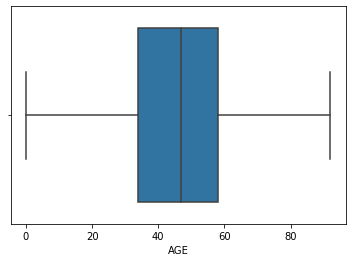

In [214]:
sns.boxplot(combine_df["AGE"])

In [215]:
combine_df["PRESENCE_OF_CHILDREN"].unique()#0 for no children 1 for 1 and atleast 1 children 2 for not identified

array([0, 1, 2], dtype=int64)

In [216]:
print("total numeric columns: ",len(combine_df.select_dtypes("int64").columns))
combine_df.select_dtypes("int64").columns

total numeric columns:  3


Index(['GENDER', 'AGE', 'PRESENCE_OF_CHILDREN'], dtype='object')

# convert object variable to categorical variables

In [217]:
combine_df.isna().sum()

SITE_ACCOUNT_NUMBER             0
ACCOUNT_STATUS                  0
FIRST_COMMUNICATION_DATE       10
UPGRADE_DATE                  889
SERVICE_PLAN                    0
MODEL                           0
SALES_CHANNEL                   0
DIRECT_INDIRECT_CHANNEL         0
SALES_SOURCE                    0
COMPANY_SOURCE_NAME             0
FIRST_NAME                      0
LAST_NAME                       0
ADDRESS                         0
CITY                            0
STATE                           0
ZIPCODE                         0
EMAIL_ADDRESS                   0
FEEDBACK                        0
SATELLITE                       0
SITE_TYPE_DESC                  0
WARRANTY_NAME                   0
MOST_RECENT_SALES_CHANNEL       0
GENDER                          0
DATE_OF_BIRTH                   0
AGE                             0
INCOME                          0
MARITAL_STATUS                  0
PRESENCE_OF_CHILDREN            0
COMPUTER_OWNER                  0
CHURN_DATE    

In [218]:
combine_df.fillna({"MOST_RECENT_SALES_CHANNEL":"UNKNOWN "},inplace=True)

In [219]:
combine_df.info()#size of the data and summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   SITE_ACCOUNT_NUMBER        19999 non-null  object        
 1   ACCOUNT_STATUS             19999 non-null  object        
 2   FIRST_COMMUNICATION_DATE   19989 non-null  datetime64[ns]
 3   UPGRADE_DATE               19110 non-null  datetime64[ns]
 4   SERVICE_PLAN               19999 non-null  object        
 5   MODEL                      19999 non-null  object        
 6   SALES_CHANNEL              19999 non-null  object        
 7   DIRECT_INDIRECT_CHANNEL    19999 non-null  object        
 8   SALES_SOURCE               19999 non-null  object        
 9   COMPANY_SOURCE_NAME        19999 non-null  object        
 10  FIRST_NAME                 19999 non-null  object        
 11  LAST_NAME                  19999 non-null  object        
 12  ADDR

In [220]:
print("total object columns: ",len(combine_df.select_dtypes("object").columns))
combine_df.select_dtypes("object").columns


total object columns:  24


Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL',
       'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE',
       'COMPANY_SOURCE_NAME', 'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY',
       'STATE', 'ZIPCODE', 'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE',
       'SITE_TYPE_DESC', 'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL',
       'DATE_OF_BIRTH', 'INCOME', 'MARITAL_STATUS', 'COMPUTER_OWNER'],
      dtype='object')

In [221]:
combine_df.describe(include=["object"]).T

,count,unique,top,freq
SITE_ACCOUNT_NUMBER,19999,19999,AMR-16307601,1
ACCOUNT_STATUS,19999,2,Closed,10013
SERVICE_PLAN,19999,12,Elite,3051
MODEL,19999,9,HN7000S,6195
SALES_CHANNEL,19999,10,UNKNOWN,2906
DIRECT_INDIRECT_CHANNEL,19999,5,Indirect,14037
SALES_SOURCE,19999,151,TAG,2917
COMPANY_SOURCE_NAME,19999,3,HNS Customers,19980
FIRST_NAME,19999,1760,David,295
LAST_NAME,19999,1698,Smith,212


In [222]:
categorical=combine_df.drop(columns=["SITE_ACCOUNT_NUMBER"]).columns

In [223]:
categorical

Index(['ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE', 'UPGRADE_DATE',
       'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL',
       'SALES_SOURCE', 'COMPANY_SOURCE_NAME', 'FIRST_NAME', 'LAST_NAME',
       'ADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'EMAIL_ADDRESS', 'FEEDBACK',
       'SATELLITE', 'SITE_TYPE_DESC', 'WARRANTY_NAME',
       'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'CHURN_DATE'],
      dtype='object')

In [224]:
combine_df[categorical]=combine_df[categorical].astype("category")

In [225]:
combine_df.describe(include=["object"]).T

,count,unique,top,freq
SITE_ACCOUNT_NUMBER,19999,19999,AMR-16307601,1


In [226]:
combine_df.describe(include=["category"]).T

,count,unique,top,freq
ACCOUNT_STATUS,19999,2,Closed,10013
FIRST_COMMUNICATION_DATE,19989,464,2010-08-03 00:00:00,374
UPGRADE_DATE,19110,2662,2011-08-23 00:00:00,33
SERVICE_PLAN,19999,12,Elite,3051
MODEL,19999,9,HN7000S,6195
SALES_CHANNEL,19999,10,UNKNOWN,2906
DIRECT_INDIRECT_CHANNEL,19999,5,Indirect,14037
SALES_SOURCE,19999,151,TAG,2917
COMPANY_SOURCE_NAME,19999,3,HNS Customers,19980
FIRST_NAME,19999,1760,David,295


In [227]:
combine_df.info()#information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   SITE_ACCOUNT_NUMBER        19999 non-null  object  
 1   ACCOUNT_STATUS             19999 non-null  category
 2   FIRST_COMMUNICATION_DATE   19989 non-null  category
 3   UPGRADE_DATE               19110 non-null  category
 4   SERVICE_PLAN               19999 non-null  category
 5   MODEL                      19999 non-null  category
 6   SALES_CHANNEL              19999 non-null  category
 7   DIRECT_INDIRECT_CHANNEL    19999 non-null  category
 8   SALES_SOURCE               19999 non-null  category
 9   COMPANY_SOURCE_NAME        19999 non-null  category
 10  FIRST_NAME                 19999 non-null  category
 11  LAST_NAME                  19999 non-null  category
 12  ADDRESS                    19999 non-null  category
 13  CITY                       1999

# reduce the size of the data 4.6 mb to 3.0 mb we have to convert object columns to category

# correction values treatment of data or duplicate values

In [228]:
combine_df.select_dtypes("category").columns

Index(['ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE', 'UPGRADE_DATE',
       'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL',
       'SALES_SOURCE', 'COMPANY_SOURCE_NAME', 'FIRST_NAME', 'LAST_NAME',
       'ADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'EMAIL_ADDRESS', 'FEEDBACK',
       'SATELLITE', 'SITE_TYPE_DESC', 'WARRANTY_NAME',
       'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'CHURN_DATE'],
      dtype='object')

# check particular how many times repeat

In [229]:
combine_df.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER', 'CHURN_DATE'],
      dtype='object')

In [230]:
v_count(combine_df,"MODEL")

{'HN7000S': 6195,
 'HN9000': 4835,
 'DW4000': 2263,
 'DW6000': 1894,
 'DW7000': 1751,
 'UNK': 1020,
 'None': 710,
 'NONE': 676,
 'DW4020': 655}

In [231]:
combine_df["MODEL"]=combine_df["MODEL"].replace("None","NONE")

In [232]:
v_count(combine_df,"MODEL")

{'HN7000S': 6195,
 'HN9000': 4835,
 'DW4000': 2263,
 'DW6000': 1894,
 'DW7000': 1751,
 'NONE': 1386,
 'UNK': 1020,
 'DW4020': 655}

In [233]:
combine_df.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER', 'CHURN_DATE'],
      dtype='object')

In [234]:
print(combine_df.SERVICE_PLAN.nunique())
v_count(combine_df,"SERVICE_PLAN")


12


{'Elite': 3051,
 'no-plan': 2721,
 'Home': 2365,
 'Proplus': 1936,
 'Basic_Ltd': 1934,
 'Basic': 1886,
 'Pro': 1765,
 'Power150': 1248,
 'SO': 1184,
 'Professional': 780,
 'Power15': 624,
 'Professional Plus': 505}

In [235]:
combine_df.SERVICE_PLAN.value_counts()

Elite                3051
no-plan              2721
Home                 2365
Proplus              1936
Basic_Ltd            1934
Basic                1886
Pro                  1765
Power150             1248
SO                   1184
Professional          780
Power15               624
Professional Plus     505
Name: SERVICE_PLAN, dtype: int64

In [236]:
combine_df["SERVICE_PLAN"]=combine_df["SERVICE_PLAN"].replace("Basic_Ltd","basic_plan")
combine_df["SERVICE_PLAN"]=combine_df["SERVICE_PLAN"].replace("Basic","basic_plan")

In [237]:
combine_df["SERVICE_PLAN"]=combine_df["SERVICE_PLAN"].replace("Power15","power_plan")
combine_df["SERVICE_PLAN"]=combine_df["SERVICE_PLAN"].replace("Power150","power_plan")
combine_df["SERVICE_PLAN"]=combine_df["SERVICE_PLAN"].replace("Professional","proffessional_plan")

combine_df["SERVICE_PLAN"]=combine_df["SERVICE_PLAN"].replace("Professional Plus","proffessional_plan")
combine_df["SERVICE_PLAN"]=combine_df["SERVICE_PLAN"].replace("Proplus","proffessional_plan")
combine_df["SERVICE_PLAN"]=combine_df["SERVICE_PLAN"].replace("Pro","proffessional_plan")


In [238]:
combine_df.SERVICE_PLAN.value_counts()

proffessional_plan    4986
basic_plan            3820
Elite                 3051
no-plan               2721
Home                  2365
power_plan            1872
SO                    1184
Name: SERVICE_PLAN, dtype: int64

In [239]:
combine_df["SERVICE_PLAN"]=combine_df["SERVICE_PLAN"].replace("Basic","Basic_plan")

In [240]:
combine_df.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER', 'CHURN_DATE'],
      dtype='object')

#in sales column so many values we have convert into category
unknown-unknown,none,vars no mean of that values
callcentewrs-duplicated values
retail/others-same and add sales agents sales agents is also a retailor category
web-orders-same

In [241]:
v_count(combine_df,"SALES_CHANNEL")

{'UNKNOWN': 2906,
 'Sales Agents': 2825,
 'Vars': 2778,
 'None': 2602,
 'Call Centers': 1675,
 'Retail/Others': 1576,
 'Retail/others': 1445,
 'Web Orders': 1419,
 'Web orders': 1391,
 'Call Center': 1382}

In [242]:
combine_df["SALES_CHANNEL"]=combine_df["SALES_CHANNEL"].replace(("UNKNOWN","None"),("UNKNOWN-channel","UNKNOWN-channel"))

In [243]:
combine_df["SALES_CHANNEL"]=combine_df["SALES_CHANNEL"].replace(["Retail/Others","Sales Agents"],["Retail/others",
                                                                                     "Retail/others"])

In [244]:
combine_df["SALES_CHANNEL"]=combine_df["SALES_CHANNEL"].replace("Call Centers","Call Center")
combine_df["SALES_CHANNEL"]=combine_df["SALES_CHANNEL"].replace("Web Orders","Web orders")

# missing values

In [245]:
combine_df.isna().sum()

SITE_ACCOUNT_NUMBER             0
ACCOUNT_STATUS                  0
FIRST_COMMUNICATION_DATE       10
UPGRADE_DATE                  889
SERVICE_PLAN                    0
MODEL                           0
SALES_CHANNEL                   0
DIRECT_INDIRECT_CHANNEL         0
SALES_SOURCE                    0
COMPANY_SOURCE_NAME             0
FIRST_NAME                      0
LAST_NAME                       0
ADDRESS                         0
CITY                            0
STATE                           0
ZIPCODE                         0
EMAIL_ADDRESS                   0
FEEDBACK                        0
SATELLITE                       0
SITE_TYPE_DESC                  0
WARRANTY_NAME                   0
MOST_RECENT_SALES_CHANNEL       0
GENDER                          0
DATE_OF_BIRTH                   0
AGE                             0
INCOME                          0
MARITAL_STATUS                  0
PRESENCE_OF_CHILDREN            0
COMPUTER_OWNER                  0
CHURN_DATE    

In [246]:
from sklearn import preprocessing 
label=preprocessing.LabelEncoder()
combine_df["ACCOUNT_STATUS"]=label.fit_transform(combine_df["ACCOUNT_STATUS"])

In [247]:
combine_df["ACCOUNT_STATUS"].dtype

dtype('int32')

drop churn date columns so many missing values are there not necessity columns 

In [248]:
combine_df.drop(columns=["CHURN_DATE"],inplace=True)

In [249]:
combine_df.select_dtypes("category").columns

Index(['FIRST_COMMUNICATION_DATE', 'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [250]:
v_count(combine_df,"DIRECT_INDIRECT_CHANNEL")

{'Indirect': 14037, 'Direct': 5124, 'None': 784, 'UNKNOWN': 45, 0: 9}

# univariate and bivariate  analysis

# working on category column

In [251]:
combine_df["DIRECT_INDIRECT_CHANNEL"]=combine_df["DIRECT_INDIRECT_CHANNEL"].replace("None","UNKNOWN")
combine_df["DIRECT_INDIRECT_CHANNEL"]=combine_df["DIRECT_INDIRECT_CHANNEL"].replace(0,"UNKNOWN")

Text(0, 0.5, 'no of customers')

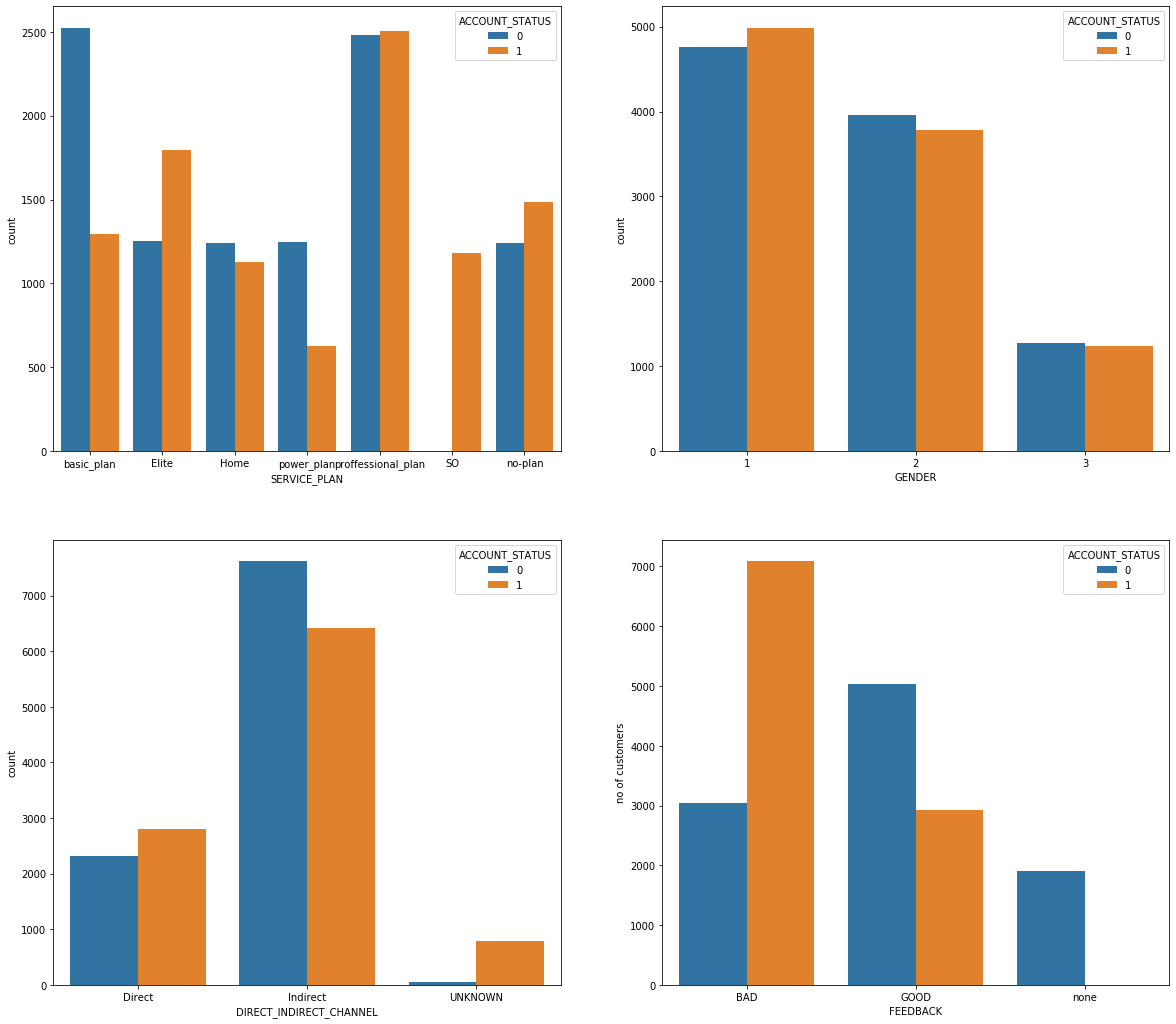

In [252]:

fig, axarr = plt.subplots(2, 2, figsize=(20, 18))
sns.countplot(x='SERVICE_PLAN', hue = 'ACCOUNT_STATUS',data =combine_df,ax=axarr[0][0])
sns.countplot(x='GENDER', hue = 'ACCOUNT_STATUS',data = combine_df, ax=axarr[0][1])
sns.countplot(x='DIRECT_INDIRECT_CHANNEL', hue = 'ACCOUNT_STATUS',data =combine_df, ax=axarr[1][0])
sns.countplot(x='FEEDBACK', hue = 'ACCOUNT_STATUS',data = combine_df, ax=axarr[1][1])
plt.ylabel("no of customers")

direct and indirect channel col so many problems 0,unknown,none are stored in unknown data

# active status 0 means active 1 churned

Text(0, 0.5, 'no of customers')

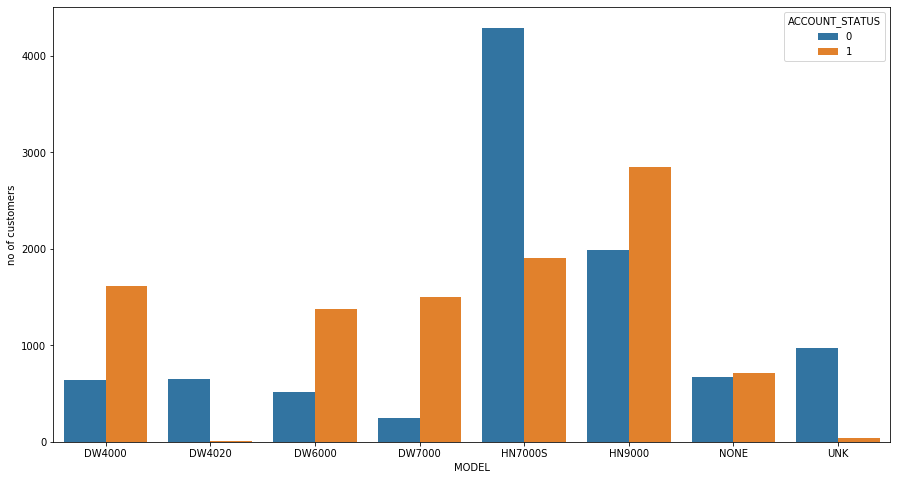

In [253]:
plt.figure(figsize=(15,8))
sns.countplot(x='MODEL', hue = 'ACCOUNT_STATUS',data = combine_df)
plt.ylabel("no of customers")

Text(0, 0.5, 'no of customers')

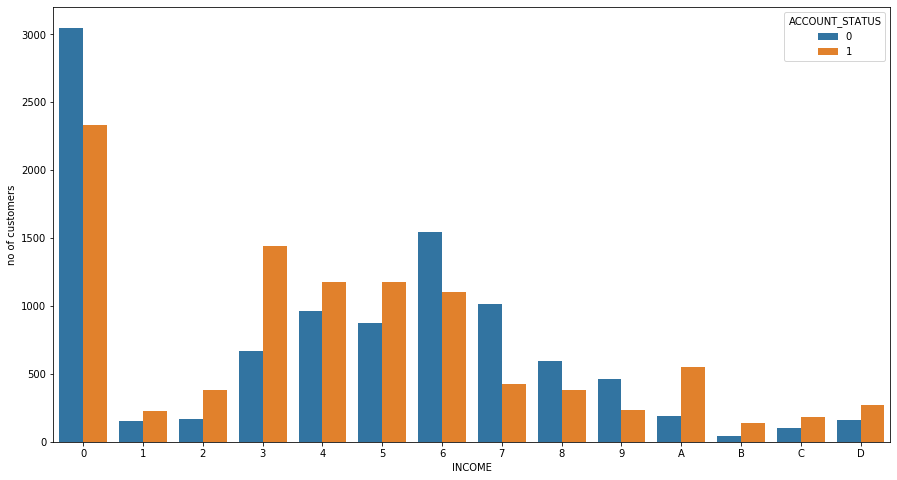

In [254]:
plt.figure(figsize=(15,8))
sns.countplot(x='INCOME', hue = 'ACCOUNT_STATUS',data = combine_df)
plt.ylabel("no of customers")

# Descriptor	Description(INCOME TABLE)
0	Annual Income < $10K

1	Annual Income > $10K < 20K

2	Annual Income > $20K < 30K

3	Annual Income > $30K < 40K

4	Annual Income > $40K < 50K

5	Annual Income > $50K < 60K

6	Annual Income > $60K < 70K

7	Annual Income > $70K < 80K


8	Annual Income > $80K < 90K

9	Annual Income > $90K < 100K

10	Annual Income > $100K < 110K

A	Annual Income > $110K < 120K

B	Annual Income > $120K < 130K

C	Annual Income > $130K < 140K

D	Annual Income > $140K


In [255]:
combine_df["MARITAL_STATUS"].unique()

[1, 0, 2, 3, .]
Categories (5, object): [1, 0, 2, 3, .]

In [256]:
combine_df["MARITAL_STATUS"]=combine_df["MARITAL_STATUS"].replace(".",3)

In [257]:
combine_df["MARITAL_STATUS"].unique()

[1.0, 0.0, 2.0, 3.0]
Categories (4, float64): [1.0, 0.0, 2.0, 3.0]

In [258]:
combine_df["MARITAL_STATUS"]=combine_df["MARITAL_STATUS"].astype("int64")

Text(0, 0.5, 'no of customers')

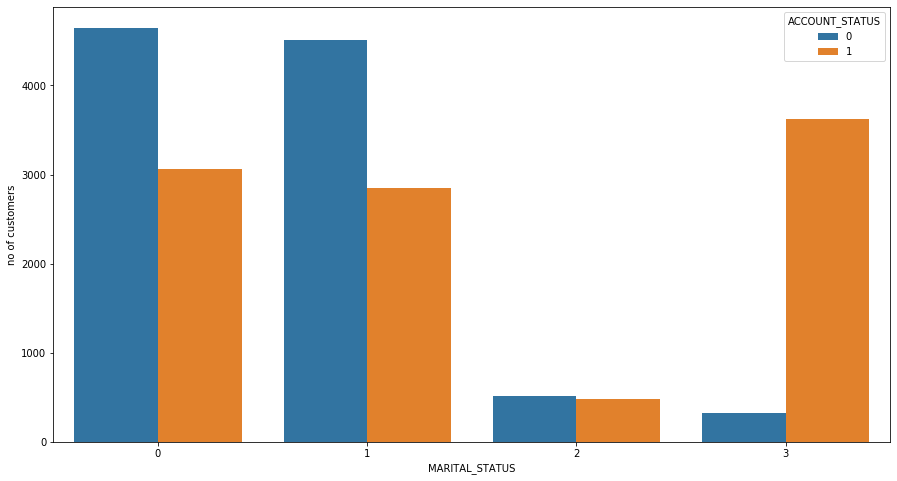

In [259]:
plt.figure(figsize=(15,8))
sns.countplot(x='MARITAL_STATUS', hue = 'ACCOUNT_STATUS',data = combine_df)
plt.ylabel("no of customers")

# category col to numeric age and income

In [260]:
combine_df["AGE"].unique()

[69, 43, 58, 22, 36, ..., 81, 83, 79, 89, 77]
Length: 69
Categories (69, int64): [69, 43, 58, 22, ..., 83, 79, 89, 77]

In [261]:
combine_df["AGE"]=combine_df["AGE"].astype("int64")

# label encoding for income

In [262]:

combine_df["INCOME"].value_counts()

0    5378
6    2648
4    2134
3    2109
5    2051
7    1436
8     976
A     744
9     698
2     552
D     430
1     384
C     278
B     181
Name: INCOME, dtype: int64

In [263]:
combine_df["INCOME"]=combine_df["INCOME"].replace({"A":10,"B":11,"C":12,"D":13})

In [264]:
combine_df["INCOME"].dtype

dtype('int64')

In [265]:
combine_df.dtypes

SITE_ACCOUNT_NUMBER            object
ACCOUNT_STATUS                  int32
FIRST_COMMUNICATION_DATE     category
UPGRADE_DATE                 category
SERVICE_PLAN                 category
MODEL                        category
SALES_CHANNEL                  object
DIRECT_INDIRECT_CHANNEL      category
SALES_SOURCE                 category
COMPANY_SOURCE_NAME          category
FIRST_NAME                   category
LAST_NAME                    category
ADDRESS                      category
CITY                         category
STATE                        category
ZIPCODE                      category
EMAIL_ADDRESS                category
FEEDBACK                     category
SATELLITE                    category
SITE_TYPE_DESC               category
WARRANTY_NAME                category
MOST_RECENT_SALES_CHANNEL    category
GENDER                       category
DATE_OF_BIRTH                category
AGE                             int64
INCOME                          int64
MARITAL_STAT

In [266]:
combine_df.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [267]:
v_count(combine_df,"SALES_SOURCE")#so many categorical values sales source not important for my data.drop the variable

{'TAG': 2917,
 'Hughes Web Order': 1940,
 'RS&I': 1174,
 'Red Ventures LLC (SA)': 1092,
 'UNKNOWN': 1001,
 'LiveBridge Communications LLC': 958,
 'Perfect 10': 953,
 'AmericanSat': 922,
 'ACS': 814,
 'DialAmerica Marketing Inc (CC)': 647,
 'Communication Solutions LLC (CC)': 623,
 'NCC': 591,
 'OKS Ameridial Inc (CC)': 586,
 'ACS Pre-Install': 460,
 'I-Dish.com LLC (SA)': 405,
 'Best Buy': 398,
 'ALORAD Inc (SA)': 382,
 'InfoDish': 367,
 'NationWide Satellite (SA)': 335,
 'not identified': 290,
 'Verisign Web Ordering': 240,
 'MiniDish': 141,
 'Electronic Express (SA)': 131,
 'EBN Financial dba Dish Systems (SA)': 118,
 'ValueElectronics': 107,
 'Elite Satellite and Home Theater Inc (S': 105,
 'Buy Telco': 95,
 'GoDish.com Ltd LLP (SA)': 78,
 'Satex': 75,
 'Satellite Dish Marketing LLC dba Digita': 71,
 'Qcorps Residential Inc dba WhiteFence (': 66,
 'NRTC': 64,
 'PEGASUS BROADBAND COMMUNICATIO': 64,
 'MyNet LLC (SA)': 64,
 'Direct SAT Broadband LLC (SA)': 64,
 'Altitude Marketing LLC 

In [268]:
v_count(combine_df,"COMPANY_SOURCE_NAME")

{'HNS Customers': 19980, 'UNKNOWN': 11, 'no name': 8}

In [269]:
combine_df["COMPANY_SOURCE_NAME"]=combine_df["COMPANY_SOURCE_NAME"].replace("no name","UNKNOWN")

In [270]:
v_count(combine_df,"COMPANY_SOURCE_NAME")

{'HNS Customers': 19980, 'UNKNOWN': 19}

In [271]:
v_count(combine_df,"FEEDBACK")

{'BAD': 10135, 'GOOD': 7950, 'none': 1914}

In [272]:
combine_df["FEEDBACK"]=combine_df["FEEDBACK"].replace("none","no-feedback")

In [273]:
v_count(combine_df,"FEEDBACK")

{'BAD': 10135, 'GOOD': 7950, 'no-feedback': 1914}

In [274]:
v_count(combine_df,"SATELLITE")#satellite is not important variable for my data and so many categorical var drop it

{'SPACEWAY3': 3845,
 'AM6-HOR-21K': 1171,
 'G3C-VER-24K': 1044,
 'UNKNOWN': 1013,
 'SM5-VER-7K': 908,
 'SM5-VER-5K': 887,
 0: 842,
 'SM6-HOR-10K': 819,
 'SM5-VER-15K': 814,
 'G17-HOR-6K': 720,
 'G16-VER-15K': 667,
 'HZN-HOR-8K': 652,
 'G17-HOR-2K': 649,
 'SM5-VER-1K': 564,
 'G28-HOR-16K': 535,
 'G26-HOR-14K': 491,
 'HZN-VER-23K': 477,
 'G28-HOR-10K': 440,
 'SM5-HOR-6K': 429,
 'AMC-VER-5K': 426,
 'none': 396,
 'AM9-HOR-17K': 370,
 'AM9-VER-2K ': 358,
 'SM5-HOR-14K': 346,
 'HZN2-VER-4K': 254,
 'G3C-VER-21K': 99,
 'G16-VER-1K': 78,
 'G16-HOR-8K': 75,
 'HZN2-VER-8K': 67,
 'AM9-HOR-21K': 61,
 'AM32-HOR-19K': 54,
 'HZN-HOR-19K': 49,
 'G16-VER-21K': 44,
 'G3C-VER-9K': 42,
 'HZN2-VER-5K': 32,
 'HZN-VER-6K': 32,
 'G16-HOR-2K': 31,
 'SM6-HOR-13K': 29,
 'SM6-HOR-12K': 27,
 'SM6-VER-2K': 26,
 'AM32-HOR-7K': 26,
 'G16-VER-2K': 23,
 'AM9-HOR-19K': 23,
 'HZN-VER-11K': 23,
 'AM9-VER-22K': 19,
 'AMC-HOR-10K': 13,
 'AM9-VER-2K': 9}

In [275]:
combine_df.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [276]:
v_count(combine_df,"SITE_TYPE_DESC")

{'Broadband Remote': 11579, 'Spaceway': 8346, 'None': 63, 'none': 11}

In [277]:
combine_df["SITE_TYPE_DESC"]=combine_df["SITE_TYPE_DESC"].replace(["none","None"],["unknown-site-desc","unknown-site-desc"])

In [278]:
v_count(combine_df,"SITE_TYPE_DESC")

{'Broadband Remote': 11579, 'Spaceway': 8346, 'unknown-site-desc': 74}

In [279]:
v_count(combine_df,"WARRANTY_NAME")

{0: 8519,
 'noservice': 6797,
 'EXPRESS REPAIR BASIC': 2522,
 'none': 957,
 'EXPRESS REPAIR HOME WITH TERM': 598,
 'SRVC ASSUR STD NEW CUST': 305,
 'EXPRESS REPAIR BUSINESS WITH TERM': 61,
 'EXPRESS REPAIR HOME': 58,
 'EXPRESS REPAIR HOME WITH COMMITMENT WITH TERM': 52,
 'Broadband Remote': 39,
 'EXPRESS REPAIR HOME W/O COMMITMENT WITH TERM': 30,
 'SRVC ASSUR PLUS NEW CUST': 28,
 'SRVC ASSUR STD EXISTING CUST NO COMMIT': 17,
 'Spaceway': 16}

In [280]:
combine_df["WARRANTY_NAME"]=combine_df["WARRANTY_NAME"].replace("none","noservice")
combine_df["WARRANTY_NAME"]=combine_df["WARRANTY_NAME"].replace(0,"noservice")
combine_df["WARRANTY_NAME"]=combine_df["WARRANTY_NAME"].replace(["EXPRESS REPAIR BASIC",
                                                                 "EXPRESS REPAIR HOME WITH TERM",
                                                                "EXPRESS REPAIR BUSINESS WITH TERM",
                                                                "EXPRESS REPAIR HOME","EXPRESS REPAIR HOME WITH COMMITMENT WITH TERM",
                                                                "EXPRESS REPAIR HOME W/O COMMITMENT WITH TERM"],["EXPRESS REPAIR",
                                                                                                                "EXPRESS REPAIR","EXPRESS REPAIR",
                                                                                                                "EXPRESS REPAIR",
                                                                                                                "EXPRESS REPAIR","EXPRESS REPAIR"])

combine_df["WARRANTY_NAME"]=combine_df["WARRANTY_NAME"].replace(["SRVC ASSUR STD NEW CUST","SRVC ASSUR PLUS NEW CUST","SRVC ASSUR STD EXISTING CUST NO COMMIT",
                                                                ],["SRVC ASSUR","SRVC ASSUR","SRVC ASSUR"])

In [281]:
v_count(combine_df,"WARRANTY_NAME")

{'noservice': 16273,
 'EXPRESS REPAIR': 3321,
 'SRVC ASSUR': 350,
 'Broadband Remote': 39,
 'Spaceway': 16}

In [282]:
v_count(combine_df,"MOST_RECENT_SALES_CHANNEL")#this column is not important for my data only for used recently purpose customer

{'Direct': 5674,
 'Hughes Sales Agents': 3825,
 'HN7000 Upgrade': 1875,
 'Dealer-Generated Sale': 1497,
 'DW6000 Upgrade': 1213,
 'DPC Classic upgrade': 1069,
 'Retail       ': 995,
 'HN9000 Upgrade': 707,
 'Dealer - Direct Order': 623,
 'DW7000 Upgrade': 553,
 'National Sales': 480,
 'Retail': 368,
 'Used Equipment': 305,
 'Classic Migration': 259,
 'Dial Return Upgrade': 214,
 'UNKNOWN': 110,
 'Distributor Sales Age': 77,
 0: 59,
 'Retail - Direct Order': 31,
 'Business Edition': 26,
 'UNKNOWN ': 21,
 'EXPRESS REPAIR BASIC': 11,
 'none': 7}

In [283]:
combine_df["MOST_RECENT_SALES_CHANNEL"]=combine_df["MOST_RECENT_SALES_CHANNEL"].replace("none","UNKNOWN")
combine_df["MOST_RECENT_SALES_CHANNEL"]=combine_df["MOST_RECENT_SALES_CHANNEL"].replace(0,"UNKNOWN")

In [284]:
combine_df.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [285]:
v_count(combine_df,"ACCOUNT_STATUS")

{1: 10013, 0: 9986}

# eda(exploratory data analysis)

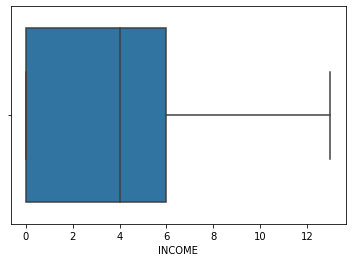

In [286]:
sns.boxplot(combine_df["INCOME"])#level of income

In [287]:
combine_df.describe(percentiles=[.01,.1,.25,.5,.75,.9,.95,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
ACCOUNT_STATUS,19999.0,0.500675,0.500012,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
AGE,19999.0,45.957748,15.456722,0.0,0.0,26.0,34.0,47.0,58.0,65.0,70.0,77.0,92.0
INCOME,19999.0,4.249862,3.460523,0.0,0.0,0.0,0.0,4.0,6.0,9.0,10.0,13.0,13.0
MARITAL_STATUS,19999.0,1.058753,1.104636,0.0,0.0,0.0,0.0,1.0,1.0,3.0,3.0,3.0,3.0


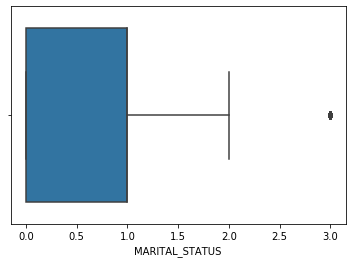

In [288]:
sns.boxplot(combine_df["MARITAL_STATUS"])

# analysis

In [289]:
combine_df.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [290]:
combine_df.corr(method="pearson")

,ACCOUNT_STATUS,AGE,INCOME,MARITAL_STATUS
ACCOUNT_STATUS,1.000000,0.232150,0.022979,0.369445
AGE,0.232150,1.000000,0.075340,0.119016
INCOME,0.022979,0.075340,1.000000,-0.001630
MARITAL_STATUS,0.369445,0.119016,-0.001630,1.000000


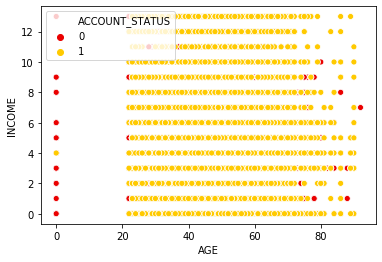

In [291]:
sns.scatterplot(x="AGE",y="INCOME",data=combine_df,hue="ACCOUNT_STATUS",
               palette="hot")
plt.legend()

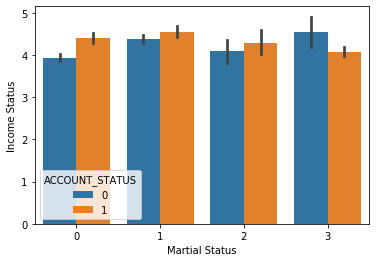

In [292]:
sns.barplot(x="MARITAL_STATUS",y="INCOME",data=combine_df,hue="ACCOUNT_STATUS")
plt.xlabel("martial status".title())
plt.ylabel("income status".title())

plt.show()

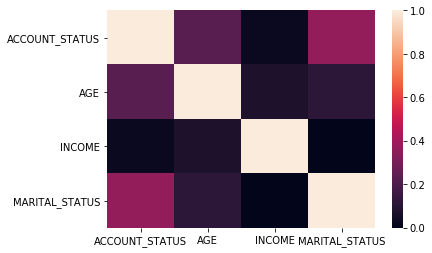

In [293]:
sns.heatmap(combine_df.corr())

In [294]:
cor=combine_df.corr()
combine_df.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

# check account status churning(1) customers and non churned customers(0) and not identified(2)

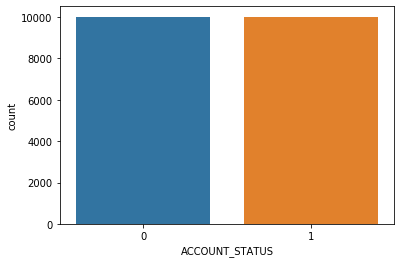

In [295]:
sns.countplot(combine_df["ACCOUNT_STATUS"])#1 means churning customers and 0means non churned

not identified customers are useless in data they remove it

In [296]:
active["ACCOUNT_STATUS"].unique()

array(['Active', 'Closed'], dtype=object)

In [297]:
churn["ACCOUNT_STATUS"].unique()

array(['Closed'], dtype=object)

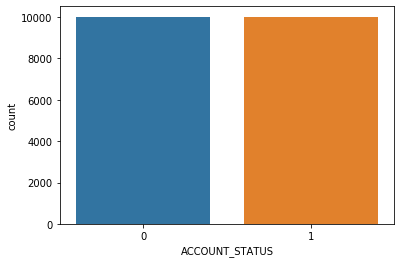

In [298]:
sns.countplot(combine_df["ACCOUNT_STATUS"])

In [299]:
len(active)

9999

In [300]:
n_exit=combine_df[combine_df["ACCOUNT_STATUS"]==0]#exited customer
exit=combine_df[combine_df["ACCOUNT_STATUS"]==1]#non exited customer

In [301]:
print("total customers are ",len(combine_df["ACCOUNT_STATUS"]))
print("churned customers are:  ",len(exit)," and non churned customers are : ",len(n_exit))

total customers are  19999
churned customers are:   10013  and non churned customers are :  9986


In [302]:
exit.head()#exited customers top rows

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,UPGRADE_DATE,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,COMPANY_SOURCE_NAME,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
883,AMR-18017356,1,2001-07-21,2003-05-10,Home,DW4020,Retail/others,Direct,Hughes Web Order,HNS Customers,...,Broadband Remote,noservice,HN7000 Upgrade,3,21-7-1936,76,8,1,0,N
2071,AMR-22237166,1,2002-01-03,2005-09-09,basic_plan,DW4020,UNKNOWN-channel,Indirect,UNKNOWN,HNS Customers,...,Broadband Remote,noservice,Direct,1,25-6-1932,80,5,1,0,N
2603,AMR-24209503,1,2002-04-03,2005-02-27,Elite,HN9000,Web orders,Indirect,NCC,HNS Customers,...,Spaceway,noservice,DW6000 Upgrade,1,12-1-1952,60,4,1,0,Y
3710,AMR-28053838,1,2002-02-21,2004-01-14,Home,DW4020,Retail/others,Indirect,AmericanSat,HNS Customers,...,Broadband Remote,noservice,DPC Classic upgrade,1,.,0,0,0,2,none
4098,AMR-29242845,1,2002-02-19,2005-06-10,proffessional_plan,DW4020,Call Center,Indirect,AmericanSat,HNS Customers,...,Broadband Remote,noservice,DPC Classic upgrade,1,12-2-1966,46,7,1,1,N


In [303]:
n_exit.tail()#non exited customers

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,UPGRADE_DATE,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,COMPANY_SOURCE_NAME,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
9994,AMR-49997196,0,2002-03-24,2005-05-17,Home,DW4000,Web orders,Indirect,TAG,HNS Customers,...,Spaceway,noservice,Classic Migration,1,17-12-1973,39,4,0,0,N
9995,AMR-49998050,0,2002-04-03,2006-04-03,Elite,HN7000S,Retail/others,Direct,LiveBridge Communications LLC,HNS Customers,...,Broadband Remote,noservice,HN7000 Upgrade,1,.,0,0,0,2,none
9996,AMR-49998608,0,2002-03-08,2003-10-31,proffessional_plan,HN9000,Retail/others,Indirect,InfoDish,HNS Customers,...,Broadband Remote,noservice,Dealer-Generated Sale,2,15-10-1979,33,5,1,0,N
9997,AMR-49999972,0,2001-11-21,2003-12-19,Home,DW4020,Vars,Indirect,Best Buy,HNS Customers,...,Broadband Remote,noservice,Dealer-Generated Sale,1,27-1-1947,65,0,1,1,none
9998,NONE,0,NaT,NaT,no-plan,NONE,UNKNOWN-channel,UNKNOWN,UNKNOWN,UNKNOWN,...,unknown-site-desc,noservice,UNKNOWN,1,none,0,0,3,2,none


In [747]:
combine_df.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'COMPANY_SOURCE_NAME', 'FEEDBACK',
       'SITE_TYPE_DESC', 'WARRANTY_NAME', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER', 'cluster 3',
       'predicted_accountstatus', 'pred_prob_1'],
      dtype='object')

In [751]:
account=fun(combine_df,"predicted_accountstatus")


In [752]:
#account.to_csv(r"C:\machine learning\segmentation\pre1.csv")

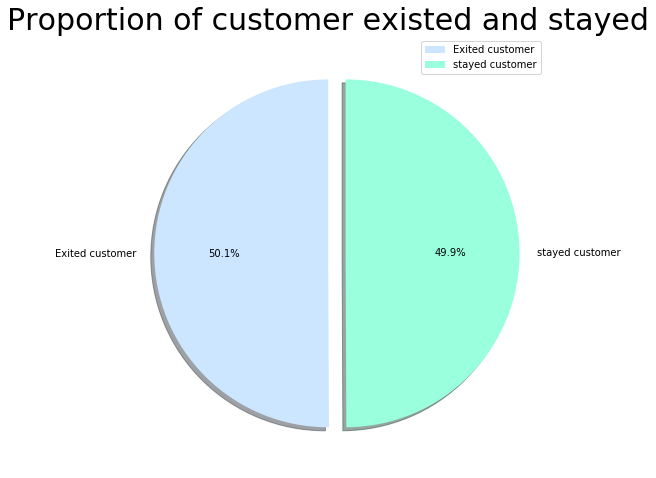

In [304]:
labels = ['Exited customer', 'stayed customer']
c=["#cce6ff","b"]

sizes = [combine_df.ACCOUNT_STATUS[combine_df['ACCOUNT_STATUS']==1].count(), combine_df.ACCOUNT_STATUS[combine_df['ACCOUNT_STATUS']==0].count(),
         ]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=["#cce6ff","#99ffdd"])
plt.legend()
#ax1.axis('equal')
plt.title("Proportion of customer existed and stayed", size = 30)
plt.show()

# calculate ythe percentage of male and female

In [305]:
combine_df.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [306]:
combine_df.GENDER.unique()

[2, 3, 1]
Categories (3, int64): [2, 3, 1]

In [307]:
cou_gen=combine_df.GENDER.value_counts()
perr_gen=cou_gen/len(combine_df.GENDER)*100


In [308]:
gender=pd.concat([cou_gen,perr_gen],axis=1,keys=["count_gender","percentage"])
gender

,count_gender,percentage
1,9747,48.737437
2,7743,38.716936
3,2509,12.545627


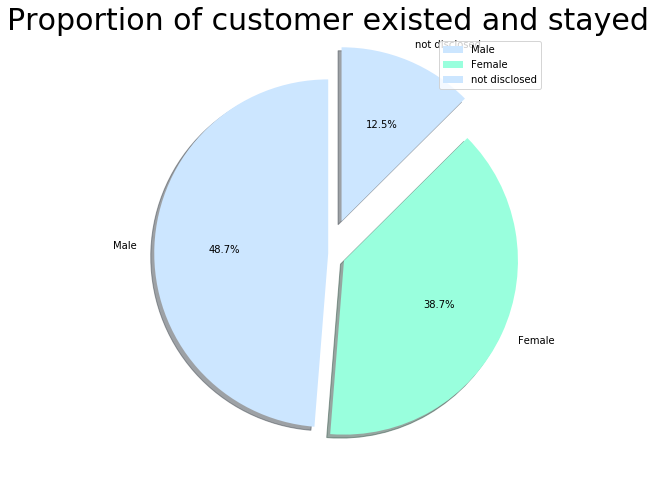

In [309]:
labels = ["Male","Female","not disclosed"]
c=["#00bfb2","#a6a6ff"]

sizes = [combine_df.GENDER[combine_df['GENDER']==1].count(), combine_df.GENDER[combine_df['GENDER']==2].count(),
         combine_df.GENDER[combine_df['GENDER']==3].count()
         ]
explode = (0, 0.1,0.2)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=["#cce6ff","#99ffdd","#cce6ff"])
plt.legend()
#ax1.axis('equal')
plt.title("Proportion of customer existed and stayed", size = 30)
plt.show()

In [310]:
combine_df.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [311]:
cou_gen=combine_df.SERVICE_PLAN.value_counts()
perr_gen=cou_gen/len(combine_df.SERVICE_PLAN)*100
perr_gen
plan=pd.concat([cou_gen,perr_gen],axis=1,keys=["count_plan","percentage"])
plan

,count_plan,percentage
proffessional_plan,4986,24.931247
basic_plan,3820,19.100955
Elite,3051,15.255763
no-plan,2721,13.605680
Home,2365,11.825591
power_plan,1872,9.360468
SO,1184,5.920296


# values counts and calculate percentage by using function

In [312]:
#another method using fun
def fun(data,ge):
    g1=data.groupby([ge])[ge].agg(["count"])

    #g1["ratio"]=g1/g2*100
    h2=g1.sum()
    g1["percentage"]=g1/h2*100
    
    return g1

In [313]:
fun(combine_df,"GENDER")#1 means male 2 feamle 3 not disclosed

,count,percentage
GENDER,,
1,9747,48.737437
2,7743,38.716936
3,2509,12.545627


In [314]:
sales=fun(combine_df,"SERVICE_PLAN")
sales.nlargest(2,columns="count")
sales.nsmallest(2,columns="count")

,count,percentage
SERVICE_PLAN,,
SO,1184,5.920296
power_plan,1872,9.360468


In [315]:
combine_df.head(2)

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,UPGRADE_DATE,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,COMPANY_SOURCE_NAME,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,AMR-11112345,0,2001-11-27,2003-12-14,no-plan,HN9000,Vars,Indirect,UNKNOWN,HNS Customers,...,Broadband Remote,noservice,HN7000 Upgrade,2,1-5-1943,69,0,1,0,N
1,AMR-14837287,0,2003-05-02,2006-08-08,proffessional_plan,HN7000S,Retail/others,Indirect,NCC,HNS Customers,...,Spaceway,noservice,Retail,2,28-12-1969,43,4,1,0,N


# service plan analysis

In [316]:
def fun1(data,ge,ex):
    g1=data.groupby([ge,ex])[ex].agg(["count"])
    g2=data.groupby(ge)[ex].agg(["count"])
    #g1["pct"]=100*g1.div(g2,level=ge)
    g1["ratio"]=g1/g2*100
    return g1

In [317]:
fun1(combine_df,"SERVICE_PLAN","ACCOUNT_STATUS")

count       ratio
SERVICE_PLAN       ACCOUNT_STATUS                   
basic_plan         0                2525   66.099476
                   1                1295   33.900524
Elite              0                1254   41.101278
                   1                1797   58.898722
Home               0                1240   52.431290
                   1                1125   47.568710
power_plan         0                1248   66.666667
                   1                 624   33.333333
proffessional_plan 0                2481   49.759326
                   1                2505   50.240674
SO                 0                   0    0.000000
                   1                1184  100.000000
no-plan            0                1238   45.497979
                   1                1483   54.502021

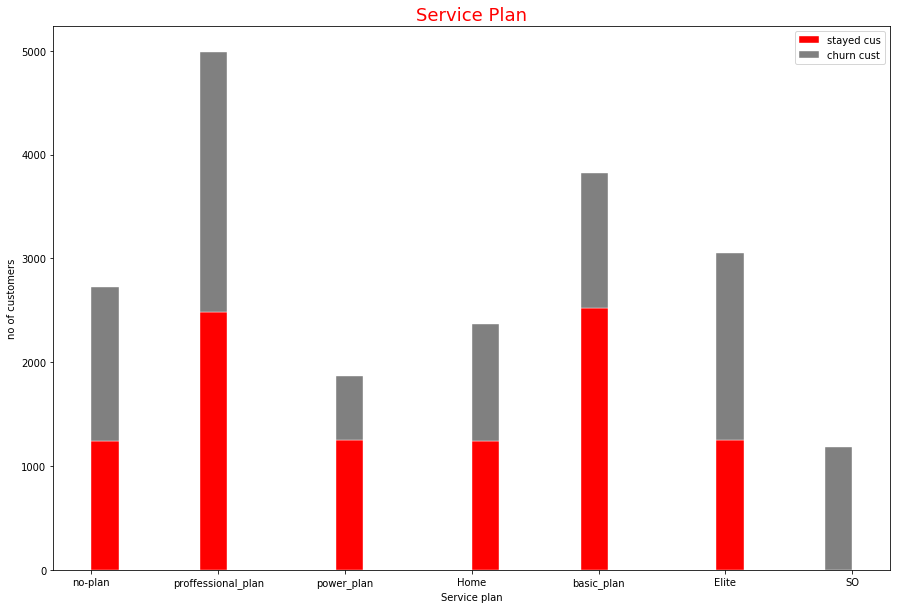

In [318]:

figure = plt.figure(figsize=(15,10))
plt.hist([
        combine_df[(combine_df.ACCOUNT_STATUS==0)]['SERVICE_PLAN'],
        combine_df[(combine_df.ACCOUNT_STATUS==1)]['SERVICE_PLAN']
        ], 
     stacked=True, color = ['r','grey'],
         bins = 'auto',label = ['stayed cus','churn cust'],
         edgecolor='white', linewidth=0.4)
plt.title("service plan".title(),fontsize=18,color="r")
plt.xlabel("service plan".capitalize())
plt.ylabel('no of customers')
plt.legend()

# working on plans

# elite plan

In [319]:
combine_df.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [320]:
elite=combine_df[combine_df["SERVICE_PLAN"]=="Elite"]
elite.head(2)

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,UPGRADE_DATE,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,COMPANY_SOURCE_NAME,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
18,AMR-14882497,0,2001-05-04,2004-08-23,Elite,NONE,Call Center,Indirect,InfoDish,HNS Customers,...,Broadband Remote,noservice,Retail,2,11-10-1948,64,5,1,0,N
30,AMR-14932628,0,2002-04-12,2005-12-31,Elite,HN7000S,Vars,Indirect,TAG,HNS Customers,...,Spaceway,noservice,Direct,1,8-3-1984,28,0,1,0,none


In [321]:
print("total customers who have elite plan : ",len(elite))

total customers who have elite plan :  3051


In [322]:
el_exit=elite[elite["ACCOUNT_STATUS"]==1]
el_nexit=elite[elite["ACCOUNT_STATUS"]==0]

In [323]:
print("churned elite customers are: ",len(el_exit))
print("stayed elite customers are: ",len(el_nexit))

churned elite customers are:  1797
stayed elite customers are:  1254


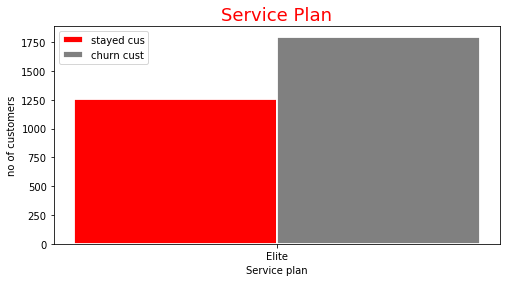

In [324]:


figure = plt.figure(figsize=(8,4))
plt.hist([
        elite[(elite.ACCOUNT_STATUS==0)]['SERVICE_PLAN'],
        elite[(elite.ACCOUNT_STATUS==1)]['SERVICE_PLAN']
        ], 
     stacked=False, color = ['r','grey'],
         bins = 'auto',label = ['stayed cus','churn cust'],
         edgecolor='white',linewidth=1.8)
plt.title("service plan".title(),fontsize=18,color="r")
plt.xlabel("service plan".capitalize())
plt.ylabel('no of customers')
plt.legend()

In [325]:
fun(elite,"GENDER")

,count,percentage
GENDER,,
1,1527,50.049164
2,1138,37.299246
3,386,12.651590


In [326]:
fun1(elite,"GENDER","ACCOUNT_STATUS")

count      ratio
GENDER ACCOUNT_STATUS                  
1      0                 607  39.751146
       1                 920  60.248854
2      0                 469  41.212654
       1                 669  58.787346
3      0                 178  46.113990
       1                 208  53.886010

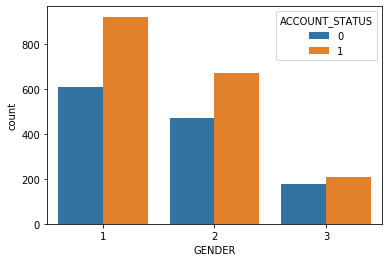

In [327]:
sns.countplot(x='GENDER', hue = 'ACCOUNT_STATUS',data=elite)

In [328]:
fun(elite,"MARITAL_STATUS")

,count,percentage
MARITAL_STATUS,,
0,1158,37.954769
1,1042,34.152737
2,145,4.752540
3,706,23.139954


In [329]:
fun1(elite,"MARITAL_STATUS","ACCOUNT_STATUS")

count      ratio
MARITAL_STATUS ACCOUNT_STATUS                  
0              0                 585  50.518135
               1                 573  49.481865
1              0                 551  52.879079
               1                 491  47.120921
2              0                  63  43.448276
               1                  82  56.551724
3              0                  55   7.790368
               1                 651  92.209632

In [330]:
elite.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [331]:
fun(elite,"FEEDBACK")

,count,percentage
FEEDBACK,,
BAD,1672,54.801704
GOOD,1130,37.037037
no-feedback,249,8.161259


In [332]:
fun1(elite,"FEEDBACK","ACCOUNT_STATUS")

count      ratio
FEEDBACK    ACCOUNT_STATUS                  
BAD         0                 396  23.684211
            1                1276  76.315789
GOOD        0                 611  54.070796
            1                 519  45.929204
no-feedback 0                 247  99.196787
            1                   2   0.803213

In [333]:
bad=elite[elite["FEEDBACK"]=="BAD"]
good=elite[elite["FEEDBACK"]=="GOOD"]

In [334]:
fun(bad,"GENDER")

,count,percentage
GENDER,,
1,877,52.452153
2,615,36.782297
3,180,10.765550


In [335]:
fun1(bad,"GENDER","ACCOUNT_STATUS")

count      ratio
GENDER ACCOUNT_STATUS                  
1      0                 214  24.401368
       1                 663  75.598632
2      0                 141  22.926829
       1                 474  77.073171
3      0                  41  22.777778
       1                 139  77.222222

In [336]:
fun(good,"GENDER")

,count,percentage
GENDER,,
1,534,47.256637
2,428,37.876106
3,168,14.867257


In [337]:
fun1(good,"GENDER","ACCOUNT_STATUS")

count      ratio
GENDER ACCOUNT_STATUS                  
1      0                 278  52.059925
       1                 256  47.940075
2      0                 234  54.672897
       1                 194  45.327103
3      0                  99  58.928571
       1                  69  41.071429



# income level

In [338]:
fun1(elite,"INCOME","ACCOUNT_STATUS")

count      ratio
INCOME ACCOUNT_STATUS                  
0      0                 365  47.588005
       1                 402  52.411995
1      0                  27  41.538462
       1                  38  58.461538
2      0                  26  27.083333
       1                  70  72.916667
3      0                  75  23.659306
       1                 242  76.340694
4      0                 123  35.042735
       1                 228  64.957265
5      0                 117  36.677116
       1                 202  63.322884
6      0                 188  48.453608
       1                 200  51.546392
7      0                 140  63.348416
       1                  81  36.651584
8      0                  77  48.734177
       1                  81  51.265823
9      0                  55  59.782609
       1                  37  40.217391
10     0                  23  19.827586
       1                  93  80.172414
11     0                   7  22.580645
       1                  24  77.419355
12     0                   6  13.636364
       1                  38  86.363636
13     0                  25  29.069767
       1                  61  70.930233

In [339]:
elite.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [340]:
combine_df.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [341]:
combine_df.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [342]:
fun(combine_df,"MODEL")

,count,percentage
MODEL,,
DW4000,2263,11.315566
DW4020,655,3.275164
DW6000,1894,9.470474
DW7000,1751,8.755438
HN7000S,6195,30.976549
HN9000,4835,24.176209
NONE,1386,6.930347
UNK,1020,5.100255


In [343]:
sales=fun(combine_df,"SALES_CHANNEL")
sales.sort_values("count",ascending=False)

,count,percentage
SALES_CHANNEL,,
Retail/others,5846,29.231462
UNKNOWN-channel,5508,27.541377
Call Center,3057,15.285764
Web orders,2810,14.050703
Vars,2778,13.890695


In [344]:
sales=fun(combine_df,"DIRECT_INDIRECT_CHANNEL")
sales.sort_values("count",ascending=False)

,count,percentage
DIRECT_INDIRECT_CHANNEL,,
Indirect,14037,70.188509
Direct,5124,25.621281
UNKNOWN,838,4.190210


In [345]:
combine_df.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [346]:

sales=fun(combine_df,"SALES_SOURCE")
sales.sort_values("count",ascending=False)

,count,percentage
SALES_SOURCE,,
TAG,2917,14.585729
Hughes Web Order,1940,9.700485
RS&I,1174,5.870294
Red Ventures LLC (SA),1092,5.460273
UNKNOWN,1001,5.005250
...,...,...
ECC Retention Orders,5,0.025001
American Satellite & Ent Inc (SA),5,0.025001
B & B Satellite (P10),5,0.025001


In [347]:
sales=fun(combine_df,"COMPANY_SOURCE_NAME")
sales.sort_values("count",ascending=False)

,count,percentage
COMPANY_SOURCE_NAME,,
HNS Customers,19980,99.904995
UNKNOWN,19,0.095005


In [348]:
combine_df.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [349]:
combine_df["STATE"]=combine_df["STATE"].replace("none","None")

In [350]:
sales=fun(combine_df,"STATE")
sales.sort_values("count",ascending=False)

,count,percentage
STATE,,
CA,2547,12.735637
TX,2007,10.035502
MD,1065,5.325266
CO,1038,5.190260
NY,983,4.915246
VA,974,4.870244
IL,702,3.510176
MI,691,3.455173
AR,674,3.370169


In [351]:
sales=fun(combine_df,"CITY")
sales.sort_values("count",ascending=False)

,count,percentage
CITY,,
AUBURN,147,0.735037
TRINITY,106,0.530027
FREDERICK,103,0.515026
ROGERS,101,0.505025
GAITHERSBURG,100,0.500025
...,...,...
HIGHLAND MLS,3,0.015001
GRANT TWP,3,0.015001
HVRE DE GRACE,2,0.010001


In [352]:
combine_df.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [353]:
sales=fun(combine_df,"FEEDBACK")
sales.sort_values("count",ascending=False)

,count,percentage
FEEDBACK,,
BAD,10135,50.677534
GOOD,7950,39.751988
no-feedback,1914,9.570479


In [354]:
sales=fun(combine_df,"WARRANTY_NAME")
sales.sort_values("count",ascending=False)

,count,percentage
WARRANTY_NAME,,
noservice,16273,81.369068
EXPRESS REPAIR,3321,16.605830
SRVC ASSUR,350,1.750088
Broadband Remote,39,0.195010
Spaceway,16,0.080004


In [355]:
frequency=combine_df["MOST_RECENT_SALES_CHANNEL"].value_counts(dropna=False).to_dict()
frequency
combine_df.MOST_RECENT_SALES_CHANNEL.isna().sum()
combine_df["MOST_RECENT_SALES_CHANNEL"].value_counts(dropna=False).to_dict()

{'Direct': 5674,
 'Hughes Sales Agents': 3825,
 'HN7000 Upgrade': 1875,
 'Dealer-Generated Sale': 1497,
 'DW6000 Upgrade': 1213,
 'DPC Classic upgrade': 1069,
 'Retail       ': 995,
 'HN9000 Upgrade': 707,
 'Dealer - Direct Order': 623,
 'DW7000 Upgrade': 553,
 'National Sales': 480,
 'Retail': 368,
 'Used Equipment': 305,
 'Classic Migration': 259,
 'Dial Return Upgrade': 214,
 'UNKNOWN': 176,
 'Distributor Sales Age': 77,
 'Retail - Direct Order': 31,
 'Business Edition': 26,
 'UNKNOWN ': 21,
 'EXPRESS REPAIR BASIC': 11}

In [356]:
combine_df.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [357]:
sales=fun(combine_df,"MOST_RECENT_SALES_CHANNEL")
sales.sort_values("count",ascending=False)

,count,percentage
MOST_RECENT_SALES_CHANNEL,,
Direct,5674,28.371419
Hughes Sales Agents,3825,19.125956
HN7000 Upgrade,1875,9.375469
Dealer-Generated Sale,1497,7.485374
DW6000 Upgrade,1213,6.065303
DPC Classic upgrade,1069,5.345267
Retail,995,4.975249
HN9000 Upgrade,707,3.535177
Dealer - Direct Order,623,3.115156


In [358]:
combine_df.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [359]:
combine_df.select_dtypes("category").columns

Index(['FIRST_COMMUNICATION_DATE', 'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'MOST_RECENT_SALES_CHANNEL',
       'GENDER', 'DATE_OF_BIRTH', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER'],
      dtype='object')

In [360]:
for i in combine_df["SALES_CHANNEL"].unique():
    print(i)

Vars
Retail/others
Call Center
UNKNOWN-channel
Web orders


In [361]:
combine_df["COMPUTER_OWNER"]=combine_df["COMPUTER_OWNER"].replace("none","Not identified")

In [362]:
#combine_df["GENDER"]=combine_df["GENDER"].replace({1:"male",2:"female"
                                                         #   ,3:"not disclosed"})

In [363]:
combine_df.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [364]:
combine_df.select_dtypes("object").columns

Index(['SITE_ACCOUNT_NUMBER', 'SALES_CHANNEL', 'SITE_TYPE_DESC',
       'WARRANTY_NAME'],
      dtype='object')

In [365]:
combine_df.SALES_CHANNEL.unique()

array(['Vars', 'Retail/others', 'Call Center', 'UNKNOWN-channel',
       'Web orders'], dtype=object)

In [366]:
combine_df.isna().sum()

SITE_ACCOUNT_NUMBER            0
ACCOUNT_STATUS                 0
FIRST_COMMUNICATION_DATE      10
UPGRADE_DATE                 889
SERVICE_PLAN                   0
MODEL                          0
SALES_CHANNEL                  0
DIRECT_INDIRECT_CHANNEL        0
SALES_SOURCE                   0
COMPANY_SOURCE_NAME            0
FIRST_NAME                     0
LAST_NAME                      0
ADDRESS                        0
CITY                           0
STATE                          0
ZIPCODE                        0
EMAIL_ADDRESS                  0
FEEDBACK                       0
SATELLITE                      0
SITE_TYPE_DESC                 0
WARRANTY_NAME                  0
MOST_RECENT_SALES_CHANNEL      0
GENDER                         0
DATE_OF_BIRTH                  0
AGE                            0
INCOME                         0
MARITAL_STATUS                 0
PRESENCE_OF_CHILDREN           0
COMPUTER_OWNER                 0
dtype: int64

In [367]:
combine_df=combine_df.astype({"SALES_CHANNEL":"category","GENDER":"category"})

In [368]:
combine_df.select_dtypes("category").columns

Index(['FIRST_COMMUNICATION_DATE', 'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL',
       'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE',
       'COMPANY_SOURCE_NAME', 'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY',
       'STATE', 'ZIPCODE', 'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE',
       'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER'],
      dtype='object')

In [369]:
combine_df.corr()

,ACCOUNT_STATUS,AGE,INCOME,MARITAL_STATUS
ACCOUNT_STATUS,1.000000,0.232150,0.022979,0.369445
AGE,0.232150,1.000000,0.075340,0.119016
INCOME,0.022979,0.075340,1.000000,-0.001630
MARITAL_STATUS,0.369445,0.119016,-0.001630,1.000000


In [370]:
combine_df.SALES_CHANNEL.unique()

[Vars, Retail/others, Call Center, UNKNOWN-channel, Web orders]
Categories (5, object): [Vars, Retail/others, Call Center, UNKNOWN-channel, Web orders]

In [371]:
combine_df.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [372]:
combine=combine_df
combine.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [373]:
combine.SALES_CHANNEL.unique()

[Vars, Retail/others, Call Center, UNKNOWN-channel, Web orders]
Categories (5, object): [Vars, Retail/others, Call Center, UNKNOWN-channel, Web orders]

In [374]:
combine.drop(columns=['CITY', 'STATE'],inplace=True)

In [375]:
combine.drop(columns=["SITE_ACCOUNT_NUMBER","FIRST_NAME","LAST_NAME","ZIPCODE","ADDRESS",
                     "EMAIL_ADDRESS","DATE_OF_BIRTH","FIRST_COMMUNICATION_DATE","UPGRADE_DATE","MOST_RECENT_SALES_CHANNEL",
                    "SATELLITE","SALES_SOURCE" ],inplace=True)

In [376]:
combine.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'COMPANY_SOURCE_NAME', 'FEEDBACK',
       'SITE_TYPE_DESC', 'WARRANTY_NAME', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER'],
      dtype='object')

In [377]:
from sklearn import preprocessing 
label=preprocessing.LabelEncoder()
#combine_df["ACCOUNT_STATUS"]=label.fit_transform(combine_df["ACCOUNT_STATUS"])

In [378]:
c=('GENDER','MARITAL_STATUS', 'PRESENCE_OF_CHILDREN','COMPUTER_OWNER','FEEDBACK','DIRECT_INDIRECT_CHANNEL',
  )

In [379]:
for i in c:
    combine[i]= label.fit_transform(list(combine[i].values))
    

In [380]:
v_count(combine,"ACCOUNT_STATUS")

{1: 10013, 0: 9986}

In [381]:
combine

,ACCOUNT_STATUS,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,COMPANY_SOURCE_NAME,FEEDBACK,SITE_TYPE_DESC,WARRANTY_NAME,GENDER,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,0,no-plan,HN9000,Vars,1,HNS Customers,2,Broadband Remote,noservice,1,69,0,1,0,0
1,0,proffessional_plan,HN7000S,Retail/others,1,HNS Customers,1,Spaceway,noservice,1,43,4,1,0,0
2,0,power_plan,HN9000,Call Center,1,HNS Customers,0,Broadband Remote,noservice,1,58,4,1,0,0
3,0,power_plan,DW6000,Retail/others,0,HNS Customers,2,Spaceway,noservice,2,22,6,1,1,1
4,0,Home,HN7000S,Call Center,1,HNS Customers,1,Broadband Remote,noservice,0,36,7,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,1,basic_plan,HN9000,Call Center,1,HNS Customers,1,Spaceway,EXPRESS REPAIR,1,49,3,3,1,0
19995,1,proffessional_plan,DW6000,Retail/others,0,HNS Customers,0,Spaceway,EXPRESS REPAIR,1,38,2,1,1,2
19996,1,Home,DW4000,Retail/others,1,HNS Customers,0,Broadband Remote,noservice,1,67,8,0,0,1
19997,1,power_plan,DW6000,UNKNOWN-channel,2,HNS Customers,0,Broadband Remote,noservice,0,63,0,3,2,1


In [382]:
combine.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'COMPANY_SOURCE_NAME', 'FEEDBACK',
       'SITE_TYPE_DESC', 'WARRANTY_NAME', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER'],
      dtype='object')

In [383]:
combine=pd.get_dummies(combine)

In [384]:
combine.head(2)

,ACCOUNT_STATUS,DIRECT_INDIRECT_CHANNEL,FEEDBACK,GENDER,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,SERVICE_PLAN_basic_plan,...,COMPANY_SOURCE_NAME_HNS Customers,COMPANY_SOURCE_NAME_UNKNOWN,SITE_TYPE_DESC_Broadband Remote,SITE_TYPE_DESC_Spaceway,SITE_TYPE_DESC_unknown-site-desc,WARRANTY_NAME_Broadband Remote,WARRANTY_NAME_EXPRESS REPAIR,WARRANTY_NAME_SRVC ASSUR,WARRANTY_NAME_Spaceway,WARRANTY_NAME_noservice
0,0,1,2,1,69,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1,0,1,1,1,43,4,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [385]:
v_count(combine,"ACCOUNT_STATUS")

{1: 10013, 0: 9986}

# outlier treatment
age col trated data because age starts from 0 when customer belong to industry there has no age its not possible

In [386]:
def descirbe(data):
    g1=data.describe(percentiles=[.01,.1,.25,.5,.75,.9,.95,.99]).T
    return g1

In [387]:
summ=descirbe(combine)
summ

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
ACCOUNT_STATUS,19999.0,0.500675,0.500012,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
DIRECT_INDIRECT_CHANNEL,19999.0,0.785689,0.502194,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0
FEEDBACK,19999.0,0.588929,0.658424,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0
GENDER,19999.0,0.638082,0.694169,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0
AGE,19999.0,45.957748,15.456722,0.0,0.0,26.0,34.0,47.0,58.0,65.0,70.0,77.0,92.0
INCOME,19999.0,4.249862,3.460523,0.0,0.0,0.0,0.0,4.0,6.0,9.0,10.0,13.0,13.0
MARITAL_STATUS,19999.0,1.058753,1.104636,0.0,0.0,0.0,0.0,1.0,1.0,3.0,3.0,3.0,3.0
PRESENCE_OF_CHILDREN,19999.0,0.525176,0.711410,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0
COMPUTER_OWNER,19999.0,0.820641,0.808052,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0
SERVICE_PLAN_basic_plan,19999.0,0.191010,0.393106,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [388]:
#summary=summ.to_csv(r"C:\machine learning\segmentation\outlier.csv")

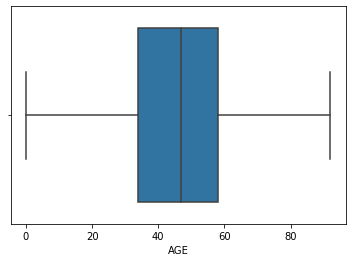

In [389]:
sns.boxplot(combine["AGE"])

In [390]:
combine.loc[combine["AGE"]<20,"AGE"]=20

In [391]:
def mis(data):
    g1=data.isna().sum()
    return g1


In [392]:
summ=descirbe(combine)
summ

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
ACCOUNT_STATUS,19999.0,0.500675,0.500012,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
DIRECT_INDIRECT_CHANNEL,19999.0,0.785689,0.502194,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0
FEEDBACK,19999.0,0.588929,0.658424,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0
GENDER,19999.0,0.638082,0.694169,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0
AGE,19999.0,46.314766,14.598164,20.0,20.0,26.0,34.0,47.0,58.0,65.0,70.0,77.0,92.0
INCOME,19999.0,4.249862,3.460523,0.0,0.0,0.0,0.0,4.0,6.0,9.0,10.0,13.0,13.0
MARITAL_STATUS,19999.0,1.058753,1.104636,0.0,0.0,0.0,0.0,1.0,1.0,3.0,3.0,3.0,3.0
PRESENCE_OF_CHILDREN,19999.0,0.525176,0.711410,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0
COMPUTER_OWNER,19999.0,0.820641,0.808052,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0
SERVICE_PLAN_basic_plan,19999.0,0.191010,0.393106,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [393]:
combine_dum=combine

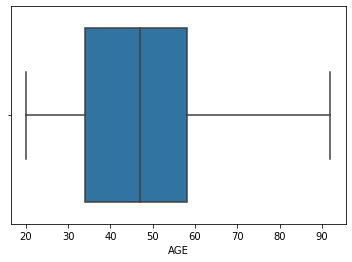

In [394]:
sns.boxplot(combine["AGE"])

In [395]:
v_count(combine,"ACCOUNT_STATUS")

{1: 10013, 0: 9986}

In [396]:
combine.shape

(19999, 39)

In [397]:
combine.columns

Index(['ACCOUNT_STATUS', 'DIRECT_INDIRECT_CHANNEL', 'FEEDBACK', 'GENDER',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER', 'SERVICE_PLAN_basic_plan', 'SERVICE_PLAN_Elite',
       'SERVICE_PLAN_Home', 'SERVICE_PLAN_power_plan',
       'SERVICE_PLAN_proffessional_plan', 'SERVICE_PLAN_SO',
       'SERVICE_PLAN_no-plan', 'MODEL_DW4000', 'MODEL_DW4020', 'MODEL_DW6000',
       'MODEL_DW7000', 'MODEL_HN7000S', 'MODEL_HN9000', 'MODEL_NONE',
       'MODEL_UNK', 'SALES_CHANNEL_Call Center', 'SALES_CHANNEL_Retail/others',
       'SALES_CHANNEL_UNKNOWN-channel', 'SALES_CHANNEL_Vars',
       'SALES_CHANNEL_Web orders', 'COMPANY_SOURCE_NAME_HNS Customers',
       'COMPANY_SOURCE_NAME_UNKNOWN', 'SITE_TYPE_DESC_Broadband Remote',
       'SITE_TYPE_DESC_Spaceway', 'SITE_TYPE_DESC_unknown-site-desc',
       'WARRANTY_NAME_Broadband Remote', 'WARRANTY_NAME_EXPRESS REPAIR',
       'WARRANTY_NAME_SRVC ASSUR', 'WARRANTY_NAME_Spaceway',
       'WARRANTY_NAME_noservic

In [398]:
drop=["SERVICE_PLAN_no-plan",'MODEL_NONE','SALES_CHANNEL_UNKNOWN-channel',
     'COMPANY_SOURCE_NAME_UNKNOWN','SITE_TYPE_DESC_unknown-site-desc','WARRANTY_NAME_noservice']

In [399]:
combine=combine.drop(columns=drop)

In [400]:
combine.columns

Index(['ACCOUNT_STATUS', 'DIRECT_INDIRECT_CHANNEL', 'FEEDBACK', 'GENDER',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER', 'SERVICE_PLAN_basic_plan', 'SERVICE_PLAN_Elite',
       'SERVICE_PLAN_Home', 'SERVICE_PLAN_power_plan',
       'SERVICE_PLAN_proffessional_plan', 'SERVICE_PLAN_SO', 'MODEL_DW4000',
       'MODEL_DW4020', 'MODEL_DW6000', 'MODEL_DW7000', 'MODEL_HN7000S',
       'MODEL_HN9000', 'MODEL_UNK', 'SALES_CHANNEL_Call Center',
       'SALES_CHANNEL_Retail/others', 'SALES_CHANNEL_Vars',
       'SALES_CHANNEL_Web orders', 'COMPANY_SOURCE_NAME_HNS Customers',
       'SITE_TYPE_DESC_Broadband Remote', 'SITE_TYPE_DESC_Spaceway',
       'WARRANTY_NAME_Broadband Remote', 'WARRANTY_NAME_EXPRESS REPAIR',
       'WARRANTY_NAME_SRVC ASSUR', 'WARRANTY_NAME_Spaceway'],
      dtype='object')

In [401]:
combine.shape

(19999, 33)

In [402]:
#feature engineering

In [403]:
from sklearn.model_selection import train_test_split

In [404]:
train,test=train_test_split(combine,test_size=0.3, random_state=0)

In [405]:
train.shape

(13999, 33)

In [406]:
test.shape

(6000, 33)

In [407]:
combine.columns

Index(['ACCOUNT_STATUS', 'DIRECT_INDIRECT_CHANNEL', 'FEEDBACK', 'GENDER',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER', 'SERVICE_PLAN_basic_plan', 'SERVICE_PLAN_Elite',
       'SERVICE_PLAN_Home', 'SERVICE_PLAN_power_plan',
       'SERVICE_PLAN_proffessional_plan', 'SERVICE_PLAN_SO', 'MODEL_DW4000',
       'MODEL_DW4020', 'MODEL_DW6000', 'MODEL_DW7000', 'MODEL_HN7000S',
       'MODEL_HN9000', 'MODEL_UNK', 'SALES_CHANNEL_Call Center',
       'SALES_CHANNEL_Retail/others', 'SALES_CHANNEL_Vars',
       'SALES_CHANNEL_Web orders', 'COMPANY_SOURCE_NAME_HNS Customers',
       'SITE_TYPE_DESC_Broadband Remote', 'SITE_TYPE_DESC_Spaceway',
       'WARRANTY_NAME_Broadband Remote', 'WARRANTY_NAME_EXPRESS REPAIR',
       'WARRANTY_NAME_SRVC ASSUR', 'WARRANTY_NAME_Spaceway'],
      dtype='object')

In [408]:
feature=list(combine.drop(columns=["ACCOUNT_STATUS"],axis=1))#independent variables

In [409]:
feature

['DIRECT_INDIRECT_CHANNEL',
 'FEEDBACK',
 'GENDER',
 'AGE',
 'INCOME',
 'MARITAL_STATUS',
 'PRESENCE_OF_CHILDREN',
 'COMPUTER_OWNER',
 'SERVICE_PLAN_basic_plan',
 'SERVICE_PLAN_Elite',
 'SERVICE_PLAN_Home',
 'SERVICE_PLAN_power_plan',
 'SERVICE_PLAN_proffessional_plan',
 'SERVICE_PLAN_SO',
 'MODEL_DW4000',
 'MODEL_DW4020',
 'MODEL_DW6000',
 'MODEL_DW7000',
 'MODEL_HN7000S',
 'MODEL_HN9000',
 'MODEL_UNK',
 'SALES_CHANNEL_Call Center',
 'SALES_CHANNEL_Retail/others',
 'SALES_CHANNEL_Vars',
 'SALES_CHANNEL_Web orders',
 'COMPANY_SOURCE_NAME_HNS Customers',
 'SITE_TYPE_DESC_Broadband Remote',
 'SITE_TYPE_DESC_Spaceway',
 'WARRANTY_NAME_Broadband Remote',
 'WARRANTY_NAME_EXPRESS REPAIR',
 'WARRANTY_NAME_SRVC ASSUR',
 'WARRANTY_NAME_Spaceway']

In [410]:
target=combine[["ACCOUNT_STATUS"]]

In [411]:
target=target.columns

In [412]:
target#target variable for classification

Index(['ACCOUNT_STATUS'], dtype='object')

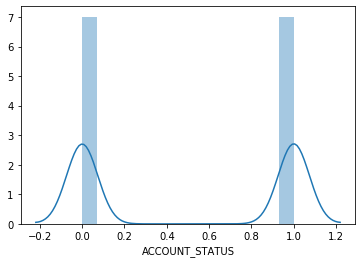

In [413]:
sns.distplot(combine["ACCOUNT_STATUS"])

In [414]:
combine[feature]

,DIRECT_INDIRECT_CHANNEL,FEEDBACK,GENDER,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,SERVICE_PLAN_basic_plan,SERVICE_PLAN_Elite,...,SALES_CHANNEL_Retail/others,SALES_CHANNEL_Vars,SALES_CHANNEL_Web orders,COMPANY_SOURCE_NAME_HNS Customers,SITE_TYPE_DESC_Broadband Remote,SITE_TYPE_DESC_Spaceway,WARRANTY_NAME_Broadband Remote,WARRANTY_NAME_EXPRESS REPAIR,WARRANTY_NAME_SRVC ASSUR,WARRANTY_NAME_Spaceway
0,1,2,1,69,0,1,0,0,0,0,...,0,1,0,1,1,0,0,0,0,0
1,1,1,1,43,4,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
2,1,0,1,58,4,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,2,2,22,6,1,1,1,0,0,...,1,0,0,1,0,1,0,0,0,0
4,1,1,0,36,7,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,1,1,1,49,3,3,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
19995,0,0,1,38,2,1,1,2,0,0,...,1,0,0,1,0,1,0,1,0,0
19996,1,0,1,67,8,0,0,1,0,0,...,1,0,0,1,1,0,0,0,0,0
19997,2,0,0,63,0,3,2,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [415]:
combine[target]

,ACCOUNT_STATUS
0,0
1,0
2,0
3,0
4,0
...,...
19994,1
19995,1
19996,1
19997,1


In [416]:
from sklearn.preprocessing import StandardScaler

In [417]:
sc=StandardScaler()

In [418]:
new_feature_clus=combine.columns

In [419]:
combine[feature]=sc.fit_transform(combine[feature])

In [420]:
combine[new_feature_clus]=sc.fit_transform(combine[new_feature_clus])

In [421]:
combine[new_feature_clus].head(2)

,ACCOUNT_STATUS,DIRECT_INDIRECT_CHANNEL,FEEDBACK,GENDER,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,SERVICE_PLAN_basic_plan,...,SALES_CHANNEL_Retail/others,SALES_CHANNEL_Vars,SALES_CHANNEL_Web orders,COMPANY_SOURCE_NAME_HNS Customers,SITE_TYPE_DESC_Broadband Remote,SITE_TYPE_DESC_Spaceway,WARRANTY_NAME_Broadband Remote,WARRANTY_NAME_EXPRESS REPAIR,WARRANTY_NAME_SRVC ASSUR,WARRANTY_NAME_Spaceway
0,-1.001351,0.42676,2.143155,0.521382,1.554017,-1.228129,-0.053189,-0.738237,-1.015605,-0.48591,...,-0.642695,2.489792,-0.404322,0.030837,0.852748,-0.846292,-0.044203,-0.446234,-0.133464,-0.028296
1,-1.001351,0.42676,0.624340,0.521382,-0.227073,-0.072205,-0.053189,-0.738237,-1.015605,-0.48591,...,1.555947,-0.401640,-0.404322,0.030837,-1.172680,1.181625,-0.044203,-0.446234,-0.133464,-0.028296


In [422]:
train[feature]=sc.fit_transform(train[feature])

C:\Users\Aksha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Aksha\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [423]:
test[feature]=sc.transform(test[feature])

C:\Users\Aksha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Aksha\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [424]:
train[feature]

,DIRECT_INDIRECT_CHANNEL,FEEDBACK,GENDER,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,SERVICE_PLAN_basic_plan,SERVICE_PLAN_Elite,...,SALES_CHANNEL_Retail/others,SALES_CHANNEL_Vars,SALES_CHANNEL_Web orders,COMPANY_SOURCE_NAME_HNS Customers,SITE_TYPE_DESC_Broadband Remote,SITE_TYPE_DESC_Spaceway,WARRANTY_NAME_Broadband Remote,WARRANTY_NAME_EXPRESS REPAIR,WARRANTY_NAME_SRVC ASSUR,WARRANTY_NAME_Spaceway
9397,0.429118,0.614856,0.530743,-1.610466,-1.229203,-0.056320,0.673236,1.464839,2.064172,-0.424330,...,-0.642350,-0.403849,2.495427,0.026737,-1.166835,1.175584,-0.046342,-0.444431,-0.134295,-0.03164
8996,0.429118,0.614856,-0.915602,0.855540,-0.364252,-0.962549,-0.738482,-1.009524,-0.484456,-0.424330,...,-0.642350,-0.403849,-0.400733,0.026737,0.857019,-0.850641,-0.046342,-0.444431,-0.134295,-0.03164
18239,0.429118,0.614856,-0.915602,-1.062465,-0.364252,1.756139,0.673236,1.464839,-0.484456,2.356658,...,-0.642350,-0.403849,2.495427,0.026737,0.857019,-0.850641,-0.046342,2.250066,-0.134295,-0.03164
15524,0.429118,-0.895209,0.530743,-1.610466,-1.229203,-0.962549,2.084953,1.464839,-0.484456,-0.424330,...,-0.642350,-0.403849,-0.400733,0.026737,-1.166835,1.175584,-0.046342,-0.444431,-0.134295,-0.03164
10297,-1.555427,-0.895209,0.530743,1.403542,-0.075936,-0.962549,-0.738482,-1.009524,-0.484456,2.356658,...,-0.642350,-0.403849,-0.400733,0.026737,-1.166835,1.175584,-0.046342,-0.444431,-0.134295,-0.03164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,0.429118,-0.895209,0.530743,1.335042,0.500698,-0.962549,-0.738482,1.464839,-0.484456,-0.424330,...,1.556784,-0.403849,-0.400733,0.026737,-1.166835,1.175584,-0.046342,2.250066,-0.134295,-0.03164
19648,0.429118,0.614856,-0.915602,-0.788464,1.942281,-0.056320,-0.738482,-1.009524,-0.484456,2.356658,...,-0.642350,-0.403849,2.495427,0.026737,0.857019,-0.850641,-0.046342,-0.444431,-0.134295,-0.03164
9845,0.429118,0.614856,0.530743,-0.240463,-0.364252,0.849910,-0.738482,0.227658,2.064172,-0.424330,...,-0.642350,-0.403849,-0.400733,0.026737,0.857019,-0.850641,-0.046342,-0.444431,-0.134295,-0.03164
10799,0.429118,0.614856,-0.915602,0.992541,1.077331,1.756139,-0.738482,-1.009524,-0.484456,-0.424330,...,-0.642350,2.476173,-0.400733,0.026737,0.857019,-0.850641,-0.046342,-0.444431,-0.134295,-0.03164


In [425]:
test[feature]

,DIRECT_INDIRECT_CHANNEL,FEEDBACK,GENDER,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,SERVICE_PLAN_basic_plan,SERVICE_PLAN_Elite,...,SALES_CHANNEL_Retail/others,SALES_CHANNEL_Vars,SALES_CHANNEL_Web orders,COMPANY_SOURCE_NAME_HNS Customers,SITE_TYPE_DESC_Broadband Remote,SITE_TYPE_DESC_Spaceway,WARRANTY_NAME_Broadband Remote,WARRANTY_NAME_EXPRESS REPAIR,WARRANTY_NAME_SRVC ASSUR,WARRANTY_NAME_Spaceway
11003,0.429118,-0.895209,0.530743,0.855540,0.212381,-0.962549,-0.738482,1.464839,-0.484456,-0.424330,...,-0.642350,2.476173,-0.400733,0.026737,-1.166835,1.175584,-0.046342,-0.444431,-0.134295,-0.03164
4981,0.429118,0.614856,0.530743,1.061041,1.077331,-0.056320,-0.738482,1.464839,2.064172,-0.424330,...,-0.642350,-0.403849,2.495427,0.026737,0.857019,-0.850641,-0.046342,-0.444431,-0.134295,-0.03164
16642,2.413662,-0.895209,0.530743,0.924040,-0.075936,1.756139,-0.738482,0.227658,-0.484456,-0.424330,...,-0.642350,-0.403849,-0.400733,0.026737,-1.166835,1.175584,-0.046342,-0.444431,-0.134295,-0.03164
8595,0.429118,-0.895209,-0.915602,-1.678966,-1.229203,-0.056320,-0.738482,-1.009524,-0.484456,-0.424330,...,-0.642350,-0.403849,-0.400733,0.026737,0.857019,-0.850641,-0.046342,-0.444431,-0.134295,-0.03164
19161,-1.555427,-0.895209,0.530743,0.513039,-1.229203,-0.056320,0.673236,-1.009524,-0.484456,-0.424330,...,-0.642350,2.476173,-0.400733,0.026737,-1.166835,1.175584,-0.046342,-0.444431,-0.134295,-0.03164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7607,0.429118,0.614856,1.977089,1.129541,0.500698,-0.962549,-0.738482,0.227658,2.064172,-0.424330,...,-0.642350,-0.403849,2.495427,0.026737,-1.166835,1.175584,-0.046342,-0.444431,-0.134295,-0.03164
19240,0.429118,-0.895209,-0.915602,0.444539,1.653965,0.849910,0.673236,0.227658,-0.484456,-0.424330,...,1.556784,-0.403849,-0.400733,0.026737,0.857019,-0.850641,-0.046342,-0.444431,-0.134295,-0.03164
3452,-1.555427,0.614856,-0.915602,0.444539,0.500698,-0.962549,-0.738482,-1.009524,-0.484456,2.356658,...,-0.642350,-0.403849,2.495427,0.026737,0.857019,-0.850641,-0.046342,-0.444431,-0.134295,-0.03164
7366,0.429118,0.614856,-0.915602,-1.404966,0.212381,-0.962549,2.084953,-1.009524,2.064172,-0.424330,...,-0.642350,2.476173,-0.400733,0.026737,0.857019,-0.850641,-0.046342,2.250066,-0.134295,-0.03164


# segmentation of clustering of data

In [426]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)

In [427]:
model = kmeans.fit(combine[feature])

In [428]:
model.labels_

array([0, 1, 0, ..., 0, 0, 0])

In [429]:
combine[feature]

,DIRECT_INDIRECT_CHANNEL,FEEDBACK,GENDER,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,SERVICE_PLAN_basic_plan,SERVICE_PLAN_Elite,...,SALES_CHANNEL_Retail/others,SALES_CHANNEL_Vars,SALES_CHANNEL_Web orders,COMPANY_SOURCE_NAME_HNS Customers,SITE_TYPE_DESC_Broadband Remote,SITE_TYPE_DESC_Spaceway,WARRANTY_NAME_Broadband Remote,WARRANTY_NAME_EXPRESS REPAIR,WARRANTY_NAME_SRVC ASSUR,WARRANTY_NAME_Spaceway
0,0.426760,2.143155,0.521382,1.554017,-1.228129,-0.053189,-0.738237,-1.015605,-0.485910,-0.424289,...,-0.642695,2.489792,-0.404322,0.030837,0.852748,-0.846292,-0.044203,-0.446234,-0.133464,-0.028296
1,0.426760,0.624340,0.521382,-0.227073,-0.072205,-0.053189,-0.738237,-1.015605,-0.485910,-0.424289,...,1.555947,-0.401640,-0.404322,0.030837,-1.172680,1.181625,-0.044203,-0.446234,-0.133464,-0.028296
2,0.426760,-0.894475,0.521382,0.800479,-0.072205,-0.053189,-0.738237,-1.015605,-0.485910,-0.424289,...,-0.642695,-0.401640,-0.404322,0.030837,0.852748,-0.846292,-0.044203,-0.446234,-0.133464,-0.028296
3,-1.564554,2.143155,1.961990,-1.665646,0.505756,-0.053189,0.667457,0.221970,-0.485910,-0.424289,...,1.555947,-0.401640,-0.404322,0.030837,-1.172680,1.181625,-0.044203,-0.446234,-0.133464,-0.028296
4,0.426760,0.624340,-0.919226,-0.706597,0.794737,-0.958487,-0.738237,0.221970,-0.485910,-0.424289,...,-0.642695,-0.401640,-0.404322,0.030837,0.852748,-0.846292,-0.044203,-0.446234,-0.133464,-0.028296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,0.426760,0.624340,0.521382,0.183948,-0.361186,1.757408,0.667457,-1.015605,2.057994,-0.424289,...,-0.642695,-0.401640,-0.404322,0.030837,-1.172680,1.181625,-0.044203,2.240978,-0.133464,-0.028296
19995,-1.564554,-0.894475,0.521382,-0.569590,-0.650167,-0.053189,0.667457,1.459546,-0.485910,-0.424289,...,1.555947,-0.401640,-0.404322,0.030837,-1.172680,1.181625,-0.044203,2.240978,-0.133464,-0.028296
19996,0.426760,-0.894475,0.521382,1.417010,1.083718,-0.958487,-0.738237,0.221970,-0.485910,-0.424289,...,1.555947,-0.401640,-0.404322,0.030837,0.852748,-0.846292,-0.044203,-0.446234,-0.133464,-0.028296
19997,2.418073,-0.894475,-0.919226,1.142997,-1.228129,1.757408,2.073151,0.221970,-0.485910,-0.424289,...,-0.642695,-0.401640,-0.404322,0.030837,0.852748,-0.846292,-0.044203,-0.446234,-0.133464,-0.028296


# we have to decide how many cluster in the data
elbow curve at 2 cluster or 3 cluster

Cluster 1 Inertia 659967.0
Cluster 2 Inertia 611614.1026174308
Cluster 3 Inertia 588305.5807142648
Cluster 4 Inertia 567850.070449065
Cluster 5 Inertia 548224.4136557592
Cluster 6 Inertia 531877.7262766379
Cluster 7 Inertia 512132.3444268747
Cluster 8 Inertia 504289.4196746586
Cluster 9 Inertia 482601.6462551269


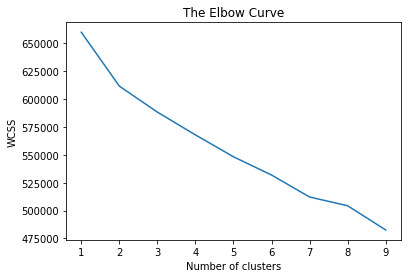

In [430]:
# Creating a funtion with KMeans to plot "The Elbow Curve"
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(combine)
    wcss.append(kmeans.inertia_)
    print("Cluster", i, "Inertia", kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
plt.show()

In [431]:
model.cluster_centers_#centroids of cluster

array([[ 3.75246035e-05,  2.00286874e-01,  8.39601428e-03,
        -6.61154955e-02,  1.67802346e-01, -1.30991065e-01,
        -5.64131304e-02, -1.34975515e-01,  4.87024022e-02,
        -3.63969077e-02,  3.76743696e-03,  3.87947984e-02,
        -1.05083854e-03, -7.88249277e-02, -3.58418531e-02,
         1.08992021e-01, -4.99491064e-02, -5.14546262e-02,
         8.91847275e-02, -8.73130397e-02,  6.86919935e-02,
        -1.73192944e-02, -6.66014835e-03,  1.23474755e-02,
         6.93986523e-03,  5.65603760e-03,  8.48906629e-01,
        -8.46117353e-01, -5.12521406e-03, -1.36072919e-01,
        -2.89423722e-02, -1.91500349e-02],
       [-5.18364998e-05, -2.76676354e-01, -1.15982569e-02,
         9.13319675e-02, -2.31802216e-01,  1.80951101e-01,
         7.79291172e-02,  1.86455222e-01, -6.72775147e-02,
         5.02787004e-02, -5.20433868e-03, -5.35911475e-02,
         1.45162871e-03,  1.08888781e-01,  4.95119478e-02,
        -1.50561615e-01,  6.89997123e-02,  7.10794378e-02,
        -1.23

In [432]:
combine.shape

(19999, 33)

In [433]:
combine_df.shape

(19999, 15)

In [434]:
model.labels_

array([0, 1, 0, ..., 0, 0, 0])

# add cluster group in the data and perforn segmentation of data

In [435]:
combine_df["cluster 3"]=model.labels_

In [436]:
combine_df.head(2)

,ACCOUNT_STATUS,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,COMPANY_SOURCE_NAME,FEEDBACK,SITE_TYPE_DESC,WARRANTY_NAME,GENDER,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,cluster 3
0,0,no-plan,HN9000,Vars,1,HNS Customers,2,Broadband Remote,noservice,1,69,0,1,0,0,0
1,0,proffessional_plan,HN7000S,Retail/others,1,HNS Customers,1,Spaceway,noservice,1,43,4,1,0,0,1


In [437]:
v_count(combine_df,"ACCOUNT_STATUS")

{1: 10013, 0: 9986}

# 0 for active 1 for exit

In [438]:
fun1(combine_df,"cluster 3","ACCOUNT_STATUS")

count      ratio
cluster 3 ACCOUNT_STATUS                  
0         0                7753  66.830446
          1                3848  33.169554
1         0                2233  26.589664
          1                6165  73.410336

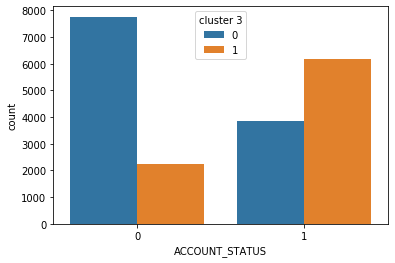

In [439]:
sns.countplot(combine_df["ACCOUNT_STATUS"],hue=combine_df["cluster 3"])

# grouping of status churned and stayed customer

stayed customers are in group 0 has perform more than the group 1 customers


churned customers are in group 1 has perform more than the group 0 customers

In [440]:
fun1(combine_df,"cluster 3","SERVICE_PLAN")

count      ratio
cluster 3 SERVICE_PLAN                        
0         basic_plan           2438  21.015430
          Elite                1618  13.947074
          Home                 1386  11.947246
          power_plan           1217  10.490475
          proffessional_plan   2887  24.885786
          SO                    471   4.059995
          no-plan              1584  13.653995
1         basic_plan           1382  16.456299
          Elite                1433  17.063587
          Home                  979  11.657538
          power_plan            655   7.799476
          proffessional_plan   2099  24.994046
          SO                    713   8.490117
          no-plan              1137  13.538938

In [441]:
plan_group=fun1(combine_df,"cluster 3","SERVICE_PLAN").reset_index()

In [442]:
plan_group
len(combine_df)

19999

In [443]:
def plot(data,c1,c2):
    plt.figure(figsize=(14,6))
    g1=sns.countplot(data[c1],hue=data[c2])
    return g1

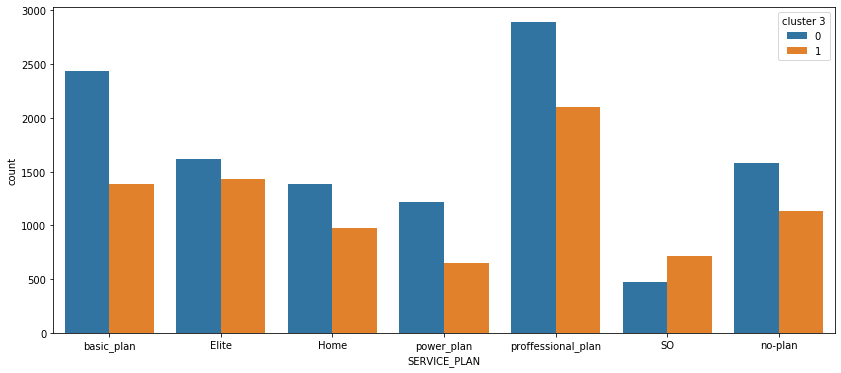

In [444]:
plot(combine_df,"SERVICE_PLAN","cluster 3")

# in group 0 has customers most buying basic plan 2438 customers and professional plus plan approx 2800 customers are buying it

in group 1 has customers most buying elite plan 1500 customers  and  professional  plan 2100 customers

each plan working every group

basic plan perform in group 0 better perform as compare to other groups


over all conclusion group 0 is perform better to other groups except professional plus because 


note:- working on these plans in group1 provide discounts of customers,incentives etc.

In [445]:
plan_group.columns

Index(['cluster 3', 'SERVICE_PLAN', 'count', 'ratio'], dtype='object')

# cluster 0 report plan

In [446]:
plan_0=plan_group[plan_group["cluster 3"]==0]

# Maximum 2 plan in cluster 0  proffesional and basic  plan sell most so is 2887 i.e 24% and 2438 i.e 21% customers 

In [447]:
large=plan_0.nlargest(2,columns=["count"])
large

,cluster 3,SERVICE_PLAN,count,ratio
4,0,proffessional_plan,2887,24.885786
0,0,basic_plan,2438,21.015430


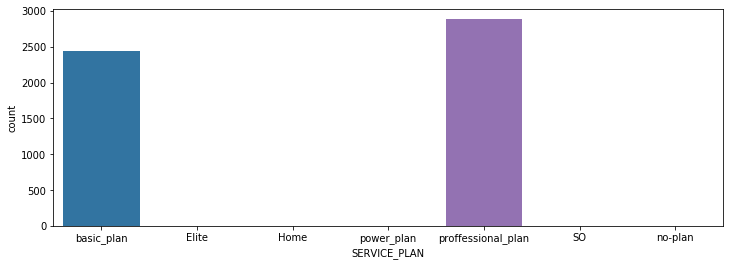

In [448]:
plt.figure(figsize=(12,4))
sns.barplot(large["SERVICE_PLAN"],large["count"])

# in cluster 0 which two plan sell least 
# so,powerplan are sell least i.e 471,4.05% and 1217 ,10.49% customers buy it

In [449]:
small=plan_0.nsmallest(2,columns=["count"])
small

,cluster 3,SERVICE_PLAN,count,ratio
5,0,SO,471,4.059995
3,0,power_plan,1217,10.490475


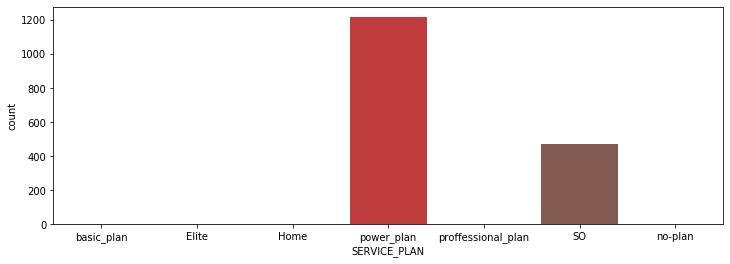

In [450]:
plt.figure(figsize=(12,4))

sns.barplot(small["SERVICE_PLAN"],small["count"])

In [451]:
combine_df.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'COMPANY_SOURCE_NAME', 'FEEDBACK',
       'SITE_TYPE_DESC', 'WARRANTY_NAME', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'cluster 3'],
      dtype='object')

# plan sell most and least in  group 1 or cluster 1

 eliteplan sell most 1433 customers buy it i.e 17%
  professional_plan sell  customer buy it 2099 customers i.e 24% 

In [452]:
plan_1=plan_group[plan_group["cluster 3"]==1]
plan_1

,cluster 3,SERVICE_PLAN,count,ratio
7,1,basic_plan,1382,16.456299
8,1,Elite,1433,17.063587
9,1,Home,979,11.657538
10,1,power_plan,655,7.799476
11,1,proffessional_plan,2099,24.994046
12,1,SO,713,8.490117
13,1,no-plan,1137,13.538938


In [453]:
large=plan_1.nlargest(2,columns=["count"])
large

,cluster 3,SERVICE_PLAN,count,ratio
11,1,proffessional_plan,2099,24.994046
8,1,Elite,1433,17.063587


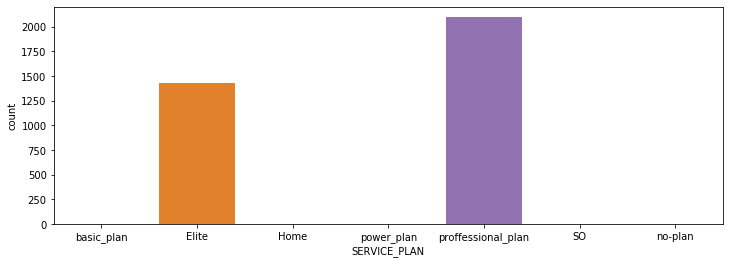

In [454]:
plt.figure(figsize=(12,4))

sns.barplot(large["SERVICE_PLAN"],large["count"])

In [455]:
small=plan_1.nsmallest(2,columns=["count"])
small

,cluster 3,SERVICE_PLAN,count,ratio
10,1,power_plan,655,7.799476
12,1,SO,713,8.490117


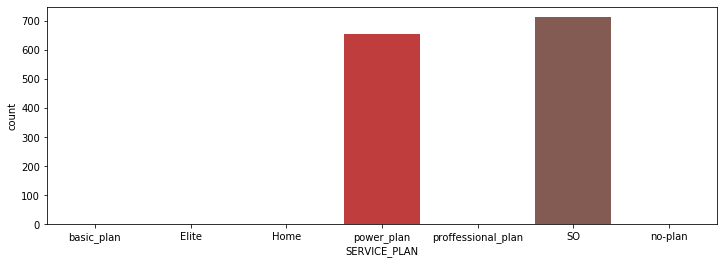

In [456]:
plt.figure(figsize=(12,4))

sns.barplot(small["SERVICE_PLAN"],small["count"])

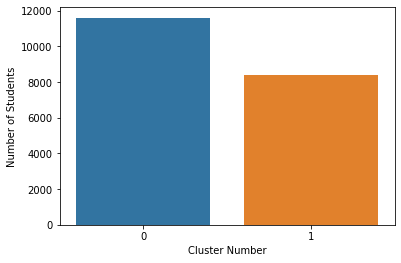

In [457]:
plt.figure(figsize=(6,4))
axis = sns.barplot(x=np.arange(0,2,1),y=combine_df.groupby(['cluster 3']).count()['SERVICE_PLAN'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of Students")

In [458]:
combine_df.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'COMPANY_SOURCE_NAME', 'FEEDBACK',
       'SITE_TYPE_DESC', 'WARRANTY_NAME', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'cluster 3'],
      dtype='object')

In [459]:
gender_clus=fun1(combine_df,"cluster 3","GENDER")

In [753]:
#gen_cl3=gender_clus.to_csv("C:\machine learning\segmentation\gendercl3.csv")

In [461]:
gen=fun(combine_df,"GENDER")
gen

,count,percentage
GENDER,,
0,9747,48.737437
1,7743,38.716936
2,2509,12.545627


In [462]:
#gen_cl4=gen.to_csv(r"C:\machine learning\segmentation\gender.csv")

In [463]:
combine_df.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'COMPANY_SOURCE_NAME', 'FEEDBACK',
       'SITE_TYPE_DESC', 'WARRANTY_NAME', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'cluster 3'],
      dtype='object')

In [464]:
marr=fun1(combine_df,"cluster 3","MARITAL_STATUS")

In [754]:
#gen_cl3=marr.to_csv("C:\machine learning\segmentation\married.csv")

In [466]:
gen=fun(combine_df,"MARITAL_STATUS")

In [467]:
gen

,count,percentage
MARITAL_STATUS,,
0,7707,38.536927
1,7351,36.756838
2,1000,5.000250
3,3941,19.705985


In [468]:
combine_df.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'COMPANY_SOURCE_NAME', 'FEEDBACK',
       'SITE_TYPE_DESC', 'WARRANTY_NAME', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'cluster 3'],
      dtype='object')

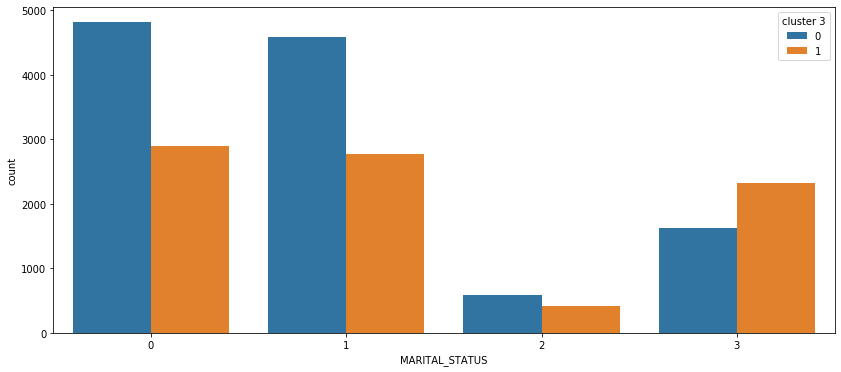

In [469]:
plot(combine_df,"MARITAL_STATUS","cluster 3")

# martial report

single -- single person belongs to most group_0 as compared to other groups
married--married person belongs to most group_0 as compared to other groups



In [470]:
#gen_cl3=gen.to_csv("C:\machine learning\segmentation\married1.csv")

In [471]:
combine_df.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'COMPANY_SOURCE_NAME', 'FEEDBACK',
       'SITE_TYPE_DESC', 'WARRANTY_NAME', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'cluster 3'],
      dtype='object')

In [757]:
chil=fun1(combine_df,"cluster 3","PRESENCE_OF_CHILDREN")
chil

count      ratio
cluster 3 PRESENCE_OF_CHILDREN                  
0         0                      7435  64.089303
          1                      2705  23.316955
          2                      1461  12.593742
1         0                      4628  55.108359
          1                      2664  31.721839
          2                      1106  13.169802

In [473]:
ch=fun(combine_df,"PRESENCE_OF_CHILDREN")
ch

,count,percentage
PRESENCE_OF_CHILDREN,,
0,12063,60.318016
1,5369,26.846342
2,2567,12.835642


In [759]:
#gen_cl3=chil.to_csv("C:\machine learning\segmentation\chidre.csv")

In [756]:
#gen_cl3=ch.to_csv("C:\machine learning\segmentation\child.csv")

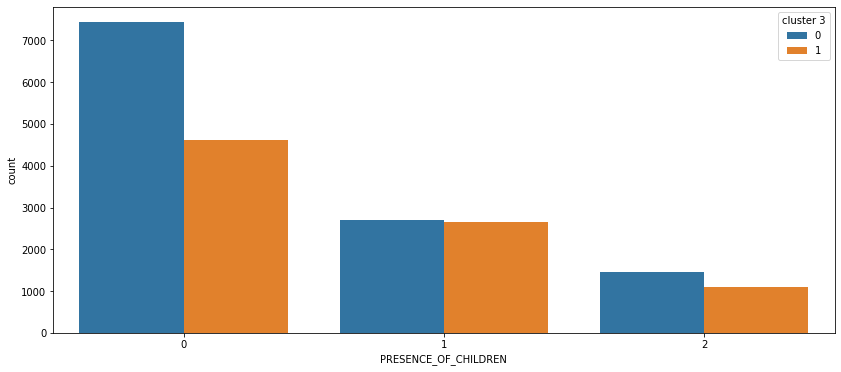

In [476]:

plot(combine_df,"PRESENCE_OF_CHILDREN","cluster 3")

# presence of children
no chidren-- group 0 perform better as compare to other groups

only one chidren--gp0 and 1 belongs to approx equal no of the customers 

more than 1 children are few customers in both the groups

In [760]:
chil=fun1(combine_df,"cluster 3","COMPUTER_OWNER")

In [761]:
ch=fun(combine_df,"COMPUTER_OWNER")
ch

,count,percentage
COMPUTER_OWNER,,
0,8644,43.222161
1,6298,31.491575
2,5057,25.286264


In [762]:
#gen_cl3=chil.to_csv("C:\machine learning\segmentation\com_yn.csv")

In [763]:
#gen_cl3=ch.to_csv("C:\machine learning\segmentation\comp.csv")

In [481]:
combine_df.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'COMPANY_SOURCE_NAME', 'FEEDBACK',
       'SITE_TYPE_DESC', 'WARRANTY_NAME', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'cluster 3'],
      dtype='object')

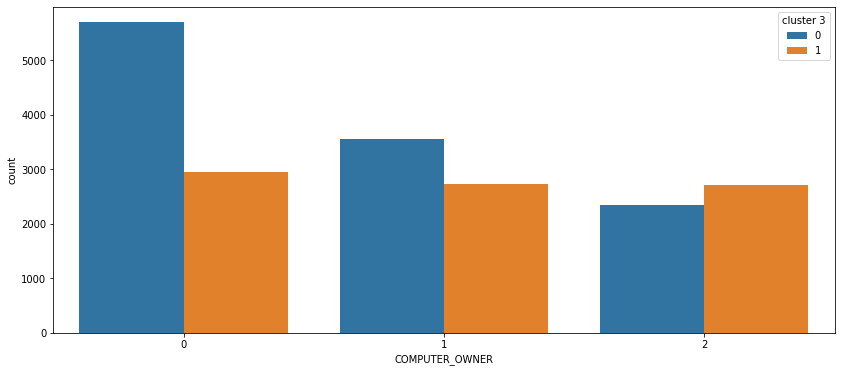

In [482]:
plot(combine_df,"COMPUTER_OWNER","cluster 3")

In [764]:
chil=fun1(combine_df,"cluster 3","SITE_TYPE_DESC")
chil

count      ratio
cluster 3 SITE_TYPE_DESC                     
0         Broadband Remote   11579  99.810361
          Spaceway               1   0.008620
          unknown-site-desc     21   0.181019
1         Spaceway            8345  99.368897
          unknown-site-desc     53   0.631103

In [765]:
ch=fun(combine_df,"SITE_TYPE_DESC")
ch

,count,percentage
SITE_TYPE_DESC,,
Broadband Remote,11579,57.897895
Spaceway,8346,41.732087
unknown-site-desc,74,0.370019


In [766]:
#gen_cl3=chil.to_csv("C:\machine learning\segmentation\site_type.csv")

In [767]:
#gen_cl3=ch.to_csv("C:\machine learning\segmentation\site_re.csv")

In [768]:
chil=fun1(combine_df,"cluster 3","FEEDBACK")
chil

count      ratio
cluster 3 FEEDBACK                  
0         0          4725  40.729247
          1          5390  46.461512
          2          1486  12.809241
1         0          5410  64.420100
          1          2560  30.483448
          2           428   5.096452

In [769]:
ch=fun(combine_df,"FEEDBACK")
ch

,count,percentage
FEEDBACK,,
0,10135,50.677534
1,7950,39.751988
2,1914,9.570479


In [770]:
#gen_cl3=chil.to_csv(r"C:\machine learning\segmentation\feed.csv")

In [771]:
#gen_cl3=ch.to_csv(r"C:\machine learning\segmentation\feedback.csv")

In [491]:
combine_df.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'COMPANY_SOURCE_NAME', 'FEEDBACK',
       'SITE_TYPE_DESC', 'WARRANTY_NAME', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'cluster 3'],
      dtype='object')

In [772]:
chil=fun1(combine_df,"cluster 3","DIRECT_INDIRECT_CHANNEL")
chil

count      ratio
cluster 3 DIRECT_INDIRECT_CHANNEL                  
0         0                         2846  24.532368
          1                         8395  72.364451
          2                          360   3.103181
1         0                         2278  27.125506
          1                         5642  67.182663
          2                          478   5.691831

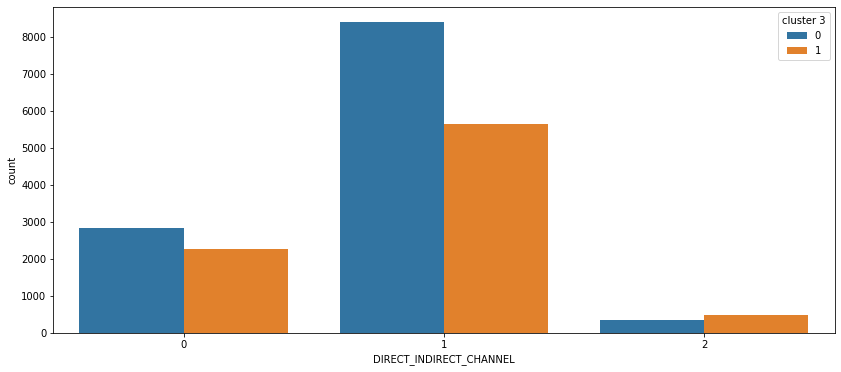

In [493]:
plot(combine_df,"DIRECT_INDIRECT_CHANNEL","cluster 3")

# 0 means indirect channel,1 means diect channel,2 unknown channel

In [773]:
ch=fun(combine_df,"DIRECT_INDIRECT_CHANNEL")
ch

,count,percentage
DIRECT_INDIRECT_CHANNEL,,
0,5124,25.621281
1,14037,70.188509
2,838,4.190210


In [774]:
gen_cl3=chil.to_csv(r"C:\machine learning\segmentation\direct_indirect1.csv")

In [775]:
#gen_cl3=ch.to_csv(r"C:\machine learning\segmentation\direct_channel.csv")

In [497]:
combine_df.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'COMPANY_SOURCE_NAME', 'FEEDBACK',
       'SITE_TYPE_DESC', 'WARRANTY_NAME', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'cluster 3'],
      dtype='object')

In [776]:
chil=fun1(combine_df,"cluster 3","SALES_CHANNEL")
chil

count      ratio
cluster 3 SALES_CHANNEL                    
0         Call Center       1701  14.662529
          Retail/others     3356  28.928541
          UNKNOWN-channel   3225  27.799328
          Vars              1661  14.317731
          Web orders        1658  14.291871
1         Call Center       1356  16.146702
          Retail/others     2490  29.649917
          UNKNOWN-channel   2283  27.185044
          Vars              1117  13.300786
          Web orders        1152  13.717552

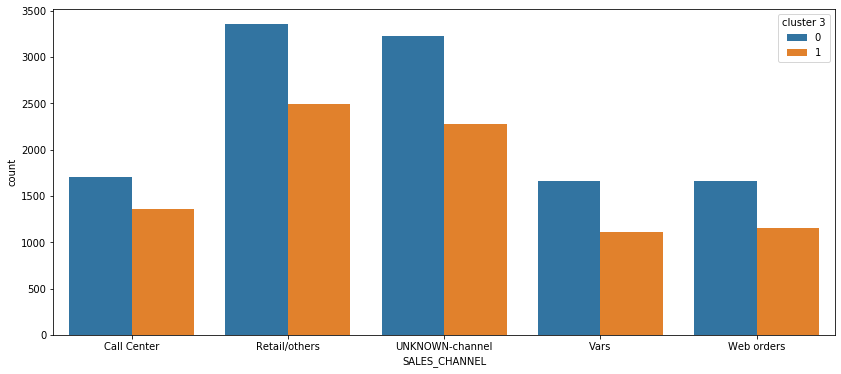

In [499]:
plot(combine_df,"SALES_CHANNEL","cluster 3")

In [777]:
ch=fun(combine_df,"SALES_CHANNEL")
ch

,count,percentage
SALES_CHANNEL,,
Call Center,3057,15.285764
Retail/others,5846,29.231462
UNKNOWN-channel,5508,27.541377
Vars,2778,13.890695
Web orders,2810,14.050703


In [778]:
#gen_cl3=chil.to_csv(r"C:\machine learning\segmentation\sales_ch.csv")

In [779]:
#gen_cl3=ch.to_csv(r"C:\machine learning\segmentation\sales_channel.csv")

In [503]:
combine_df.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'COMPANY_SOURCE_NAME', 'FEEDBACK',
       'SITE_TYPE_DESC', 'WARRANTY_NAME', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'cluster 3'],
      dtype='object')

In [504]:
chil=fun1(combine_df,"cluster 3","MODEL")
chil

count      ratio
cluster 3 MODEL                    
0         DW4000    1181  10.180157
          DW4020     605   5.215068
          DW6000     929   8.007930
          DW7000     847   7.301095
          HN7000S   4072  35.100422
          HN9000    2371  20.437893
          NONE       829   7.145936
          UNK        767   6.611499
1         DW4000    1082  12.884020
          DW4020      50   0.595380
          DW6000     965  11.490831
          DW7000     904  10.764468
          HN7000S   2123  25.279829
          HN9000    2464  29.340319
          NONE       557   6.632532
          UNK        253   3.012622

In [505]:
ch=fun(combine_df,"MODEL")
ch

,count,percentage
MODEL,,
DW4000,2263,11.315566
DW4020,655,3.275164
DW6000,1894,9.470474
DW7000,1751,8.755438
HN7000S,6195,30.976549
HN9000,4835,24.176209
NONE,1386,6.930347
UNK,1020,5.100255


In [506]:
#gen_cl3=chil.to_csv(r"C:\machine learning\segmentation\model1.csv")

In [507]:
#gen_cl3=ch.to_csv(r"C:\machine learning\segmentation\model.csv")

In [780]:
ch=fun(combine_df,"SERVICE_PLAN")
ch

,count,percentage
SERVICE_PLAN,,
basic_plan,3820,19.100955
Elite,3051,15.255763
Home,2365,11.825591
power_plan,1872,9.360468
proffessional_plan,4986,24.931247
SO,1184,5.920296
no-plan,2721,13.605680


In [781]:
chil=fun1(combine_df,"cluster 3","SERVICE_PLAN")
chil

count      ratio
cluster 3 SERVICE_PLAN                        
0         basic_plan           2438  21.015430
          Elite                1618  13.947074
          Home                 1386  11.947246
          power_plan           1217  10.490475
          proffessional_plan   2887  24.885786
          SO                    471   4.059995
          no-plan              1584  13.653995
1         basic_plan           1382  16.456299
          Elite                1433  17.063587
          Home                  979  11.657538
          power_plan            655   7.799476
          proffessional_plan   2099  24.994046
          SO                    713   8.490117
          no-plan              1137  13.538938

In [782]:
gen_cl3=chil.to_csv(r"C:\machine learning\segmentation\service_p.csv")

In [783]:
gen_cl3=ch.to_csv(r"C:\machine learning\segmentation\s_plan1.csv")

In [512]:
combine_df.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'COMPANY_SOURCE_NAME', 'FEEDBACK',
       'SITE_TYPE_DESC', 'WARRANTY_NAME', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'cluster 3'],
      dtype='object')

# status of churning customer by months

in one month churn customers are 4.17% and statement of 5 months of churn cutomers are 20.86

group wisechurn customers in group 0 for 1 month churn percentage are 2.67 and gp1 6.03 and gp3 8.33%

group wisechurn customers in group 0 for 5 month churn percentage are 13.35 and gp1 30.16 and gp3 41.66%

In [513]:
chil=fun1(combine_df,"cluster 3","ACCOUNT_STATUS")*1/12
chil

count     ratio
cluster 3 ACCOUNT_STATUS                      
0         0               646.083333  5.569204
          1               320.666667  2.764130
1         0               186.083333  2.215805
          1               513.750000  6.117528

In [514]:
chil=fun1(combine_df,"cluster 3","ACCOUNT_STATUS")*5/12
chil

count      ratio
cluster 3 ACCOUNT_STATUS                        
0         0               3230.416667  27.846019
          1               1603.333333  13.820648
1         0                930.416667  11.079027
          1               2568.750000  30.587640

In [515]:
combine_df.ACCOUNT_STATUS.value_counts()/len(combine_df.ACCOUNT_STATUS)*100*5/12

1    20.861460
0    20.805207
Name: ACCOUNT_STATUS, dtype: float64

# actual data churned and stayed customers

In [516]:
print("training feature ",train[feature].shape)
print("testing feature ",test[feature].shape)
print("target feature",train[target].shape)
print("target test ",test[target].shape)

training feature  (13999, 32)
testing feature  (6000, 32)
target feature (13999, 1)
target test  (6000, 1)


In [517]:
combine_df.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'COMPANY_SOURCE_NAME', 'FEEDBACK',
       'SITE_TYPE_DESC', 'WARRANTY_NAME', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'cluster 3'],
      dtype='object')

In [518]:
train[feature].columns

Index(['DIRECT_INDIRECT_CHANNEL', 'FEEDBACK', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'SERVICE_PLAN_basic_plan', 'SERVICE_PLAN_Elite', 'SERVICE_PLAN_Home',
       'SERVICE_PLAN_power_plan', 'SERVICE_PLAN_proffessional_plan',
       'SERVICE_PLAN_SO', 'MODEL_DW4000', 'MODEL_DW4020', 'MODEL_DW6000',
       'MODEL_DW7000', 'MODEL_HN7000S', 'MODEL_HN9000', 'MODEL_UNK',
       'SALES_CHANNEL_Call Center', 'SALES_CHANNEL_Retail/others',
       'SALES_CHANNEL_Vars', 'SALES_CHANNEL_Web orders',
       'COMPANY_SOURCE_NAME_HNS Customers', 'SITE_TYPE_DESC_Broadband Remote',
       'SITE_TYPE_DESC_Spaceway', 'WARRANTY_NAME_Broadband Remote',
       'WARRANTY_NAME_EXPRESS REPAIR', 'WARRANTY_NAME_SRVC ASSUR',
       'WARRANTY_NAME_Spaceway'],
      dtype='object')

In [519]:
#predict account status of customers while churning or stsyed


In [520]:
from sklearn.linear_model import LogisticRegression

In [521]:
m1=LogisticRegression()

In [522]:
m2=LogisticRegression(penalty="l1")

In [523]:
#m2.fit(train[feature],train[target])

In [524]:
m1.fit(train[feature],train[target])#train the model while comparing the accuracy

C:\Users\Aksha\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [525]:
train[feature].shape

(13999, 32)

In [526]:
accuracy_tra=m1.score(train[feature],train[target])*100
accuracy_tes=m1.score(test[feature],test[target])*100

In [527]:
print("training accuracy {} and testing accuracy {} ".format(accuracy_tra,accuracy_tes))

training accuracy 87.42053003785985 and testing accuracy 87.13333333333333 


# whiletraining and testing almost good close to testing accuracy i.e 87.13%

In [528]:
#training predictions
train_pred=m1.predict(train[feature])
test_pred=m1.predict(test[feature])

In [529]:
feature_train=train[feature]

In [530]:
feature_train["pred_prob_1"]=m1.predict_proba(train[feature])[:,1]
feature_train["actual_accountstatus"]=train[target]
feature_train["predicted_accountstatus"]=train_pred

In [531]:
feature_train.iloc[:,-3:]

,pred_prob_1,actual_accountstatus,predicted_accountstatus
9397,0.188549,0,0
8996,0.000829,0,0
18239,0.905875,1,1
15524,0.999908,1,1
10297,0.845807,1,1
...,...,...,...
13123,0.994748,1,1
19648,0.157106,1,0
9845,0.141427,0,0
10799,0.999632,1,1


In [532]:
feature_test=test[feature]
target_test=test[target]
print(feature_test.shape,target_test.shape)

(6000, 32) (6000, 1)


In [533]:
test_prob=m1.predict_proba(test[feature])

In [534]:
feature_train.shape
m1.predict(feature_test)
target_test.shape
feature_test.shape

(6000, 32)

In [535]:
y_pred=m1.predict(feature_test)
feature_test["p_1"]=m1.predict_proba(feature_test)[:,1]
feature_test["actual_deposit"]=target_test
feature_test["predicted"]=y_pred

In [536]:
print("train feature",feature_train.shape)
print("train feature",feature_test.shape)
print("train feature",train[target].shape)
print("train feature",test[target].shape)

train feature (13999, 35)
train feature (6000, 35)
train feature (13999, 1)
train feature (6000, 1)


In [537]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# accuracy 
how modeel perform while training and testing how it's accurate or performance of model
# recall
fraudlant detection carry total fraudlant how many my model caary the fraudlant i.e machine predicted fraud
# precision 
fraudlant detection carry total fraudlant how many my model caary the fraudlant i.e actual predicted fraud

In [538]:
train_met= metrics.confusion_matrix(train[target], train_pred) # confusion_matrix(Actual, predicted)
print(train_met)

[[6134  868]
 [ 893 6104]]


In [539]:
print(classification_report(train[target], train_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      7002
           1       0.88      0.87      0.87      6997

    accuracy                           0.87     13999
   macro avg       0.87      0.87      0.87     13999
weighted avg       0.87      0.87      0.87     13999



In [540]:
accuracy_score(train[target], train_pred)*100#training accuracy score

87.42053003785985

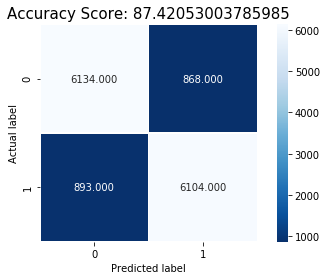

In [541]:
plt.figure(figsize=(7,4))
sns.heatmap(train_met, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_tra)
plt.title(all_sample_title, size = 15);

In [542]:
test_met= metrics.confusion_matrix(target_test, y_pred) # confusion_matrix(Actual, predicted)
print(test_met)

[[2630  354]
 [ 418 2598]]


In [543]:
print(classification_report(target_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2984
           1       0.88      0.86      0.87      3016

    accuracy                           0.87      6000
   macro avg       0.87      0.87      0.87      6000
weighted avg       0.87      0.87      0.87      6000



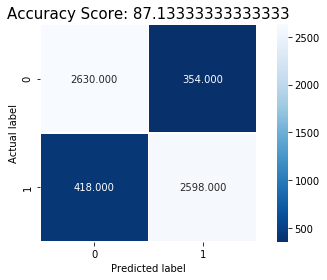

In [544]:
plt.figure(figsize=(7,4))
sns.heatmap(test_met, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_tes)
plt.title(all_sample_title, size = 15);

In [545]:
te_pro=m1.predict_proba(test[feature])[:,1]

No handles with labels found to put in legend.


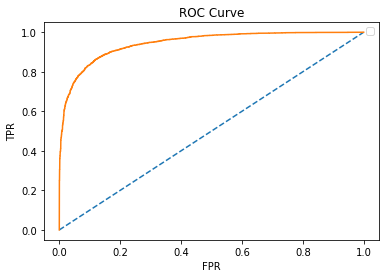

In [546]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(target_test,te_pro)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

In [547]:
from sklearn.metrics import roc_auc_score

AUC = roc_auc_score(target_test,te_pro)
AUC*100

94.40548531158218

In [548]:
feature_test.columns

Index(['DIRECT_INDIRECT_CHANNEL', 'FEEDBACK', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'SERVICE_PLAN_basic_plan', 'SERVICE_PLAN_Elite', 'SERVICE_PLAN_Home',
       'SERVICE_PLAN_power_plan', 'SERVICE_PLAN_proffessional_plan',
       'SERVICE_PLAN_SO', 'MODEL_DW4000', 'MODEL_DW4020', 'MODEL_DW6000',
       'MODEL_DW7000', 'MODEL_HN7000S', 'MODEL_HN9000', 'MODEL_UNK',
       'SALES_CHANNEL_Call Center', 'SALES_CHANNEL_Retail/others',
       'SALES_CHANNEL_Vars', 'SALES_CHANNEL_Web orders',
       'COMPANY_SOURCE_NAME_HNS Customers', 'SITE_TYPE_DESC_Broadband Remote',
       'SITE_TYPE_DESC_Spaceway', 'WARRANTY_NAME_Broadband Remote',
       'WARRANTY_NAME_EXPRESS REPAIR', 'WARRANTY_NAME_SRVC ASSUR',
       'WARRANTY_NAME_Spaceway', 'p_1', 'actual_deposit', 'predicted'],
      dtype='object')

In [549]:
feature_test.rename(columns={"p_1":"pred_prob_1","actual_deposit":"actual_accountstatus",
                             "predicted":"predicted_accountstatus"},inplace=True)

In [550]:
telecom_l2=pd.concat([feature_train,feature_test],ignore_index=True)

In [551]:
new_logdata=telecom_l2.to_csv(r"C:\machine learning\segmentation\telecomdta_l2pen.csv")

In [552]:
telecom_l2.columns

Index(['DIRECT_INDIRECT_CHANNEL', 'FEEDBACK', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'SERVICE_PLAN_basic_plan', 'SERVICE_PLAN_Elite', 'SERVICE_PLAN_Home',
       'SERVICE_PLAN_power_plan', 'SERVICE_PLAN_proffessional_plan',
       'SERVICE_PLAN_SO', 'MODEL_DW4000', 'MODEL_DW4020', 'MODEL_DW6000',
       'MODEL_DW7000', 'MODEL_HN7000S', 'MODEL_HN9000', 'MODEL_UNK',
       'SALES_CHANNEL_Call Center', 'SALES_CHANNEL_Retail/others',
       'SALES_CHANNEL_Vars', 'SALES_CHANNEL_Web orders',
       'COMPANY_SOURCE_NAME_HNS Customers', 'SITE_TYPE_DESC_Broadband Remote',
       'SITE_TYPE_DESC_Spaceway', 'WARRANTY_NAME_Broadband Remote',
       'WARRANTY_NAME_EXPRESS REPAIR', 'WARRANTY_NAME_SRVC ASSUR',
       'WARRANTY_NAME_Spaceway', 'pred_prob_1', 'actual_accountstatus',
       'predicted_accountstatus'],
      dtype='object')

In [553]:
telecom_l2.iloc[:,-3:]#fraud probability and actual status and predicted status

,pred_prob_1,actual_accountstatus,predicted_accountstatus
0,0.188549,0,0
1,0.000829,0,0
2,0.905875,1,1
3,0.999908,1,1
4,0.845807,1,1
...,...,...,...
19994,0.010374,0,0
19995,0.817855,1,1
19996,0.001969,0,0
19997,0.071799,0,0


In [554]:
#for better accuracy aply random forest at this time in logistic accuracy is 87% can any change in the accuracy

In [555]:
import time
import random
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
import warnings
warnings.filterwarnings("ignore")

In [556]:
print("training feature ",train[feature].shape)
print("testing feature ",test[feature].shape)
print("target feature",train[target].shape)
print("target test ",test[target].shape)

training feature  (13999, 32)
testing feature  (6000, 32)
target feature (13999, 1)
target test  (6000, 1)


In [557]:
train_feature=train[feature]
train_target=train[target]
test_feature=test[feature]
test_target=test[target]

In [558]:
print("training feature ",train_feature.shape)
print("testing feature ",test_feature.shape)
print("target feature",train_target.shape)
print("target test ",test_target.shape)

training feature  (13999, 32)
testing feature  (6000, 32)
target feature (13999, 1)
target test  (6000, 1)


In [559]:
ensemble=RandomForestClassifier()

In [560]:
ensemble.fit(train_feature,train_target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [561]:
print("training accuracy ",ensemble.score(train_feature,train_target))
print("testing accuracy ",ensemble.score(test_feature,test_target))

training accuracy  0.9999285663261661
testing accuracy  0.911


# when randomly random forest is selected there training and testing improve the accuracy is 100 and 91
but this is not good so much is difference in both

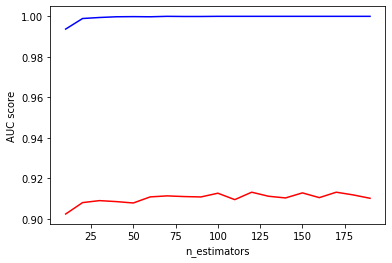

In [562]:

n_estimators = np.arange(10,200,10)#no of trees selected in random forest
train_results = []#make to empty list
test_results = []
for estimator in n_estimators:#create loop
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)#model
    rf.fit(train_feature,train_target)#train the data
    train_pred = rf.predict(train_feature)#predict the model
    false_positive_rate, true_positive_rate, thresholds = roc_curve(train_target, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)#area under curve
    train_results.append(roc_auc)#append auc
    y_pred = rf.predict(test_feature)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test_target, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(n_estimators, train_results,"b" , label="Train AUC")
line2 = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

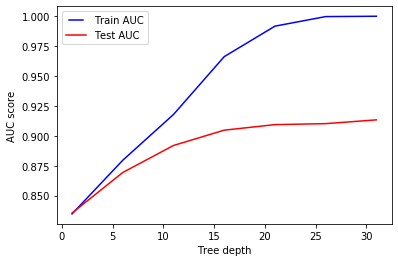

In [563]:
max_depths = np.arange(1,32,5)#where to cut the variable
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(train_feature,train_target)#train the data
    train_pred = rf.predict(train_feature)#predict the model
    false_positive_rate, true_positive_rate, thresholds = roc_curve(train_target, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)#area under curve
    train_results.append(roc_auc)#append auc
    y_pred = rf.predict(test_feature)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test_target, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label="Train AUC")
line2, = plt.plot(max_depths, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

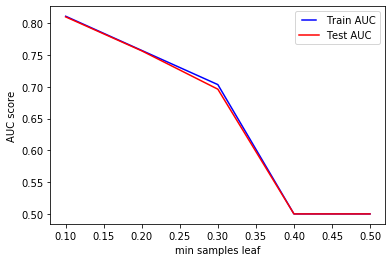

In [564]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    rf.fit(train_feature,train_target)#train the data
    train_pred = rf.predict(train_feature)#predict the model
    false_positive_rate, true_positive_rate, thresholds = roc_curve(train_target, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)#area under curve
    train_results.append(roc_auc)#append auc
    y_pred = rf.predict(test_feature)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test_target, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples leaf")
plt.show()

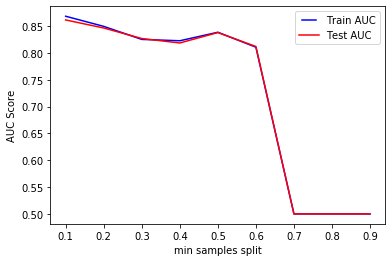

In [565]:
min_samples_splits = np.arange(0.1,1.0,0.1)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(min_samples_split=min_samples_split)
    rf.fit(train_feature,train_target)#train the data
    train_pred = rf.predict(train_feature)#predict the model
    false_positive_rate, true_positive_rate, thresholds = roc_curve(train_target, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)#area under curve
    train_results.append(roc_auc)#append auc
    y_pred = rf.predict(test_feature)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test_target, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("min samples split")
plt.show()


In [566]:
# nestimators=65 while accurate model where roc is approx 92
# max depth is 5 where traing and testing close to same i.e 88 perccent accurate
# min sample leaf is  .10 and sample split 0.2

In [567]:
ensemble1=RandomForestClassifier(random_state=1,n_estimators=65,min_samples_split=0.2,min_samples_leaf=0.1,
                                 max_depth=5)

In [568]:
ensemble1.fit(train_feature,train_target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1, min_samples_split=0.2,
                       min_weight_fraction_leaf=0.0, n_estimators=65,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [569]:
print("training accuracy ",ensemble1.score(train_feature,train_target))
print("testing accuracy ",ensemble1.score(test_feature,test_target))

training accuracy  0.7824130295021073
testing accuracy  0.7831666666666667


In [570]:
#feature
feature_en1=pd.DataFrame({"feature":list(train_feature.columns),"impo":ensemble1.feature_importances_*100}).sort_values("impo",ascending=False)
feature_en1

,feature,impo
27,SITE_TYPE_DESC_Spaceway,21.867601
1,FEEDBACK,21.358402
26,SITE_TYPE_DESC_Broadband Remote,15.780178
5,MARITAL_STATUS,13.823219
7,COMPUTER_OWNER,8.730540
18,MODEL_HN7000S,7.516456
29,WARRANTY_NAME_EXPRESS REPAIR,3.959354
3,AGE,2.338961
8,SERVICE_PLAN_basic_plan,1.791505
4,INCOME,1.341524


In [571]:
fit_rf = RandomForestClassifier(random_state=42)
start = time.time()
param_dist = {'max_depth':[5,6,8,10],
              'min_samples_split':[2,4,6,10],
              'n_estimators':[20,30,40,50,60,70,80,90,100],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 5,
                     param_grid=param_dist, 
                     n_jobs = -1, verbose=1)

cv_rf.fit(train_feature,train_target)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 43.7min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 56.6min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 74.5min
[Parallel(n_jobs=-1)]: Done 8640 out of 8640 | elapsed: 80.3min finished


Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 80}
Time taken in grid search:  4818.25


In [572]:
ensemble4=RandomForestClassifier(random_state=1,n_estimators=80,min_samples_split=10,
                                 max_depth=10,criterion="gini",max_features="auto",bootstrap=True)

In [573]:
ensemble4.fit(train_feature,train_target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [574]:
print("training accuracy ",ensemble4.score(train_feature,train_target))
print("testing accuracy ",ensemble4.score(test_feature,test_target))

training accuracy  0.9064933209514965
testing accuracy  0.8908333333333334


In [575]:
feature_en4=pd.DataFrame({"feature":list(train_feature.columns),"impo":ensemble4.feature_importances_*100}).sort_values("impo",ascending=False)
feature_en4

,feature,impo
1,FEEDBACK,16.842512
5,MARITAL_STATUS,16.281518
27,SITE_TYPE_DESC_Spaceway,9.786551
7,COMPUTER_OWNER,8.139311
26,SITE_TYPE_DESC_Broadband Remote,7.893336
29,WARRANTY_NAME_EXPRESS REPAIR,6.326607
4,INCOME,5.722669
13,SERVICE_PLAN_SO,4.963950
18,MODEL_HN7000S,4.038756
3,AGE,3.858014


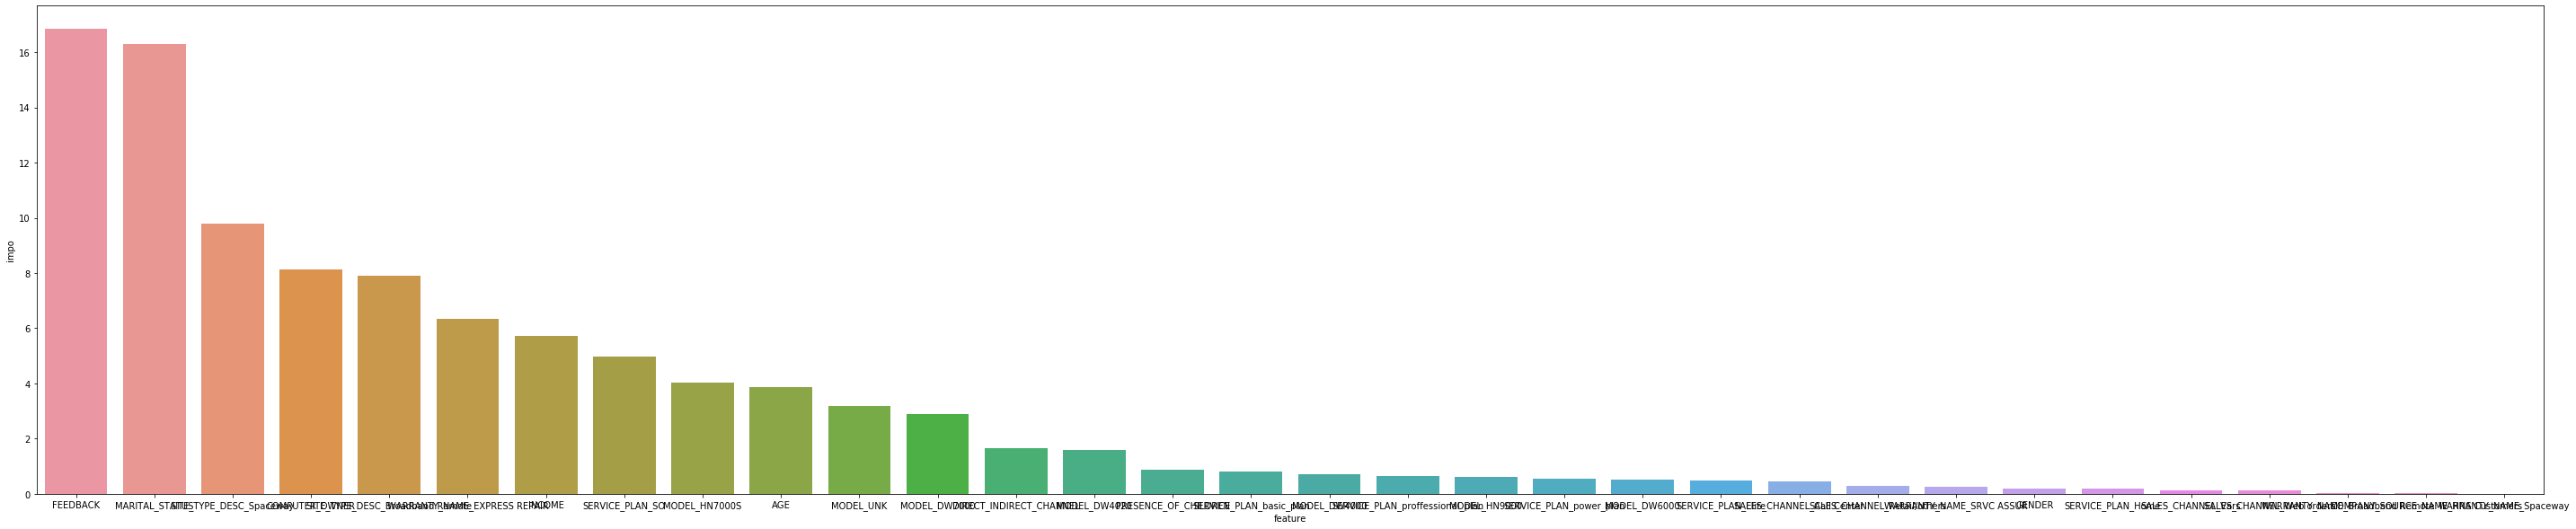

In [644]:
plt.figure(figsize=(50,10))
sns.barplot(feature_en4["feature"],feature_en4["impo"])

In [577]:
#sel_var=feature_en4.to_csv(r"C:\machine learning\segmentation\variable_sel.csv")

In [578]:
feature_new=[
 "FEEDBACK"
,"MARITAL_STATUS"
,"SITE_TYPE_DESC_Spaceway"
,"COMPUTER_OWNER"
,"SITE_TYPE_DESC_Broadband Remote"
,"WARRANTY_NAME_EXPRESS REPAIR"
,"INCOME"
,"SERVICE_PLAN_SO"
,"MODEL_HN7000S"
,"AGE"
,"MODEL_UNK"
,"MODEL_DW7000"
,"DIRECT_INDIRECT_CHANNEL"
,"MODEL_DW4020"
,"PRESENCE_OF_CHILDREN"
,"SERVICE_PLAN_basic_plan"
,"MODEL_DW4000"
,"SERVICE_PLAN_proffessional_plan"
,"MODEL_HN9000"
,"SERVICE_PLAN_power_plan"
,"MODEL_DW6000"
,"SERVICE_PLAN_Elite"
,"SALES_CHANNEL_Call Center"
,"SALES_CHANNEL_Retail/others"]


In [579]:
new_feature_train=train[feature_new]
new_feat_test=test[feature_new]
new_feature_train.shape

new_feat_test.shape

(6000, 24)

In [580]:
print("new training feature ",new_feature_train.shape)
print("new testing feature ",new_feat_test.shape)
print("target train ",train[target].shape)
print("target train ",test[target].shape)

new training feature  (13999, 24)
new testing feature  (6000, 24)
target train  (13999, 1)
target train  (6000, 1)


In [581]:
ensemble5=RandomForestClassifier(random_state=1,n_estimators=80,min_samples_split=10,
                                 max_depth=10,criterion="gini",max_features="auto",bootstrap=True)

In [582]:
ensemble5.fit(new_feature_train,train_target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [583]:
print("training accuracy ",ensemble5.score(new_feature_train,train_target))
print("testing accuracy ",ensemble5.score(new_feat_test,test_target))


training accuracy  0.9080648617758411
testing accuracy  0.8923333333333333


In [584]:
#finally got 24 variables when accuracy has same we have worki g on these 24 variables

In [585]:
train_pred=ensemble5.predict(new_feature_train)
new_feature_train["pred_prob_1"]=ensemble5.predict_proba(new_feature_train)[:,1]
new_feature_train["actual_accountstatus"]=train_target
new_feature_train["predicted_accountstatus"]=train_pred

In [586]:
y_pred=ensemble5.predict(new_feat_test)
new_feat_test["p_1"]=ensemble5.predict_proba(new_feat_test)[:,1]
new_feat_test["actual_deposit"]=test_target
new_feat_test["predicted"]=y_pred

In [587]:
print("train feature",new_feature_train.shape)
print("train target",train_target.shape)
print("test feature",new_feat_test.shape)
print("test target",test_target.shape)

train feature (13999, 27)
train target (13999, 1)
test feature (6000, 27)
test target (6000, 1)


In [588]:
train_met= metrics.confusion_matrix(train_target, train_pred) # confusion_matrix(Actual, predicted)
print(train_met)

[[6452  550]
 [ 737 6260]]


In [589]:
test_met= metrics.confusion_matrix(test_target, y_pred) # confusion_matrix(Actual, predicted)
print(test_met)

[[2716  268]
 [ 378 2638]]


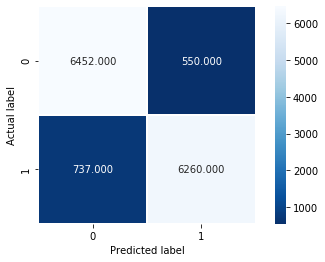

In [590]:
plt.figure(figsize=(7,4))
sns.heatmap(train_met, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');


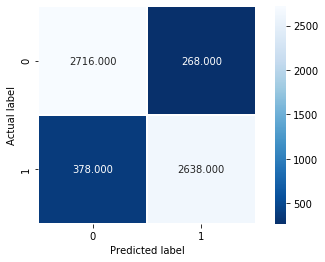

In [591]:
plt.figure(figsize=(7,4))
sns.heatmap(test_met, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [592]:
print(classification_report(test_target, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2984
           1       0.91      0.87      0.89      3016

    accuracy                           0.89      6000
   macro avg       0.89      0.89      0.89      6000
weighted avg       0.89      0.89      0.89      6000



In [593]:
new_feat_test.rename(columns={"p_1":"pred_prob_1","actual_deposit":"actual_accountstatus",
                             "predicted":"predicted_accountstatus"},inplace=True)

In [594]:
new_feat_test.columns

Index(['FEEDBACK', 'MARITAL_STATUS', 'SITE_TYPE_DESC_Spaceway',
       'COMPUTER_OWNER', 'SITE_TYPE_DESC_Broadband Remote',
       'WARRANTY_NAME_EXPRESS REPAIR', 'INCOME', 'SERVICE_PLAN_SO',
       'MODEL_HN7000S', 'AGE', 'MODEL_UNK', 'MODEL_DW7000',
       'DIRECT_INDIRECT_CHANNEL', 'MODEL_DW4020', 'PRESENCE_OF_CHILDREN',
       'SERVICE_PLAN_basic_plan', 'MODEL_DW4000',
       'SERVICE_PLAN_proffessional_plan', 'MODEL_HN9000',
       'SERVICE_PLAN_power_plan', 'MODEL_DW6000', 'SERVICE_PLAN_Elite',
       'SALES_CHANNEL_Call Center', 'SALES_CHANNEL_Retail/others',
       'pred_prob_1', 'actual_accountstatus', 'predicted_accountstatus'],
      dtype='object')

In [595]:
new_telecomdf=pd.concat([new_feature_train,new_feat_test],ignore_index=True)

# create new data for analysis

In [596]:
new_telecomdf.columns

Index(['FEEDBACK', 'MARITAL_STATUS', 'SITE_TYPE_DESC_Spaceway',
       'COMPUTER_OWNER', 'SITE_TYPE_DESC_Broadband Remote',
       'WARRANTY_NAME_EXPRESS REPAIR', 'INCOME', 'SERVICE_PLAN_SO',
       'MODEL_HN7000S', 'AGE', 'MODEL_UNK', 'MODEL_DW7000',
       'DIRECT_INDIRECT_CHANNEL', 'MODEL_DW4020', 'PRESENCE_OF_CHILDREN',
       'SERVICE_PLAN_basic_plan', 'MODEL_DW4000',
       'SERVICE_PLAN_proffessional_plan', 'MODEL_HN9000',
       'SERVICE_PLAN_power_plan', 'MODEL_DW6000', 'SERVICE_PLAN_Elite',
       'SALES_CHANNEL_Call Center', 'SALES_CHANNEL_Retail/others',
       'pred_prob_1', 'actual_accountstatus', 'predicted_accountstatus'],
      dtype='object')

In [597]:
combine_df.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'COMPANY_SOURCE_NAME', 'FEEDBACK',
       'SITE_TYPE_DESC', 'WARRANTY_NAME', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'cluster 3'],
      dtype='object')

In [598]:
combine_df["predicted_accountstatus"]=new_telecomdf["predicted_accountstatus"]
combine_df["pred_prob_1"]=new_telecomdf["pred_prob_1"]

In [599]:
combine_df.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'COMPANY_SOURCE_NAME', 'FEEDBACK',
       'SITE_TYPE_DESC', 'WARRANTY_NAME', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER', 'cluster 3',
       'predicted_accountstatus', 'pred_prob_1'],
      dtype='object')

In [600]:
new_var=['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL','DIRECT_INDIRECT_CHANNEL'
        ,'FEEDBACK',
       'SITE_TYPE_DESC','AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER', 'cluster 3',
       'predicted_accountstatus', 'pred_prob_1']

In [601]:
telecom_combine=combine_df[new_var]#final data perform the analysis at this

In [602]:
telecom_combine.head()

,ACCOUNT_STATUS,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,FEEDBACK,SITE_TYPE_DESC,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,cluster 3,predicted_accountstatus,pred_prob_1
0,0,no-plan,HN9000,Vars,1,2,Broadband Remote,69,0,1,0,0,0,0,0.406964
1,0,proffessional_plan,HN7000S,Retail/others,1,1,Spaceway,43,4,1,0,0,1,0,0.056115
2,0,power_plan,HN9000,Call Center,1,0,Broadband Remote,58,4,1,0,0,0,1,0.717895
3,0,power_plan,DW6000,Retail/others,0,2,Spaceway,22,6,1,1,1,1,1,0.938078
4,0,Home,HN7000S,Call Center,1,1,Broadband Remote,36,7,0,0,1,0,1,0.796977


In [603]:
telecom_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ACCOUNT_STATUS           19999 non-null  int32   
 1   SERVICE_PLAN             19999 non-null  category
 2   MODEL                    19999 non-null  category
 3   SALES_CHANNEL            19999 non-null  category
 4   DIRECT_INDIRECT_CHANNEL  19999 non-null  int64   
 5   FEEDBACK                 19999 non-null  int64   
 6   SITE_TYPE_DESC           19999 non-null  object  
 7   AGE                      19999 non-null  int64   
 8   INCOME                   19999 non-null  int64   
 9   MARITAL_STATUS           19999 non-null  int64   
 10  PRESENCE_OF_CHILDREN     19999 non-null  int64   
 11  COMPUTER_OWNER           19999 non-null  int64   
 12  cluster 3                19999 non-null  int32   
 13  predicted_accountstatus  19999 non-null  int32   
 14  pred_p

# univariate analysis

In [604]:
act_acc=fun1(telecom_combine,"ACCOUNT_STATUS","SERVICE_PLAN")
act_acc

count      ratio
ACCOUNT_STATUS SERVICE_PLAN                        
0              basic_plan           2525  25.285400
               Elite                1254  12.557581
               Home                 1240  12.417384
               power_plan           1248  12.497496
               proffessional_plan   2481  24.844783
               SO                      0   0.000000
               no-plan              1238  12.397356
1              basic_plan           1295  12.933187
               Elite                1797  17.946669
               Home                 1125  11.235394
               power_plan            624   6.231899
               proffessional_plan   2505  25.017477
               SO                   1184  11.824628
               no-plan              1483  14.810746

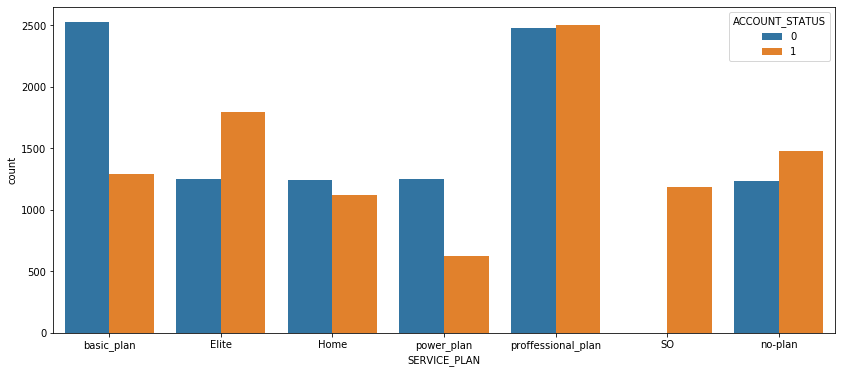

In [605]:
plot(telecom_combine,"SERVICE_PLAN","ACCOUNT_STATUS")

In [606]:
pred_acc=fun1(telecom_combine,"predicted_accountstatus","SERVICE_PLAN")
pred_acc

count      ratio
predicted_accountstatus SERVICE_PLAN                        
0                       basic_plan           1920  18.671594
                        Elite                1546  15.034523
                        Home                 1231  11.971215
                        power_plan            985   9.578917
                        proffessional_plan   2576  25.051055
                        SO                    627   6.097442
                        no-plan              1398  13.595254
1                       basic_plan           1900  19.555373
                        Elite                1505  15.489914
                        Home                 1134  11.671470
                        power_plan            887   9.129271
                        proffessional_plan   2410  24.804446
                        SO                    557   5.732812
                        no-plan              1323  13.616715

In [607]:
#acc=pred_acc.to_csv("C:\machine learning\segmentation\pred_acc.csv")
#acc=act_acc.to_csv(r"C:\machine learning\segmentation\act_acc.csv")

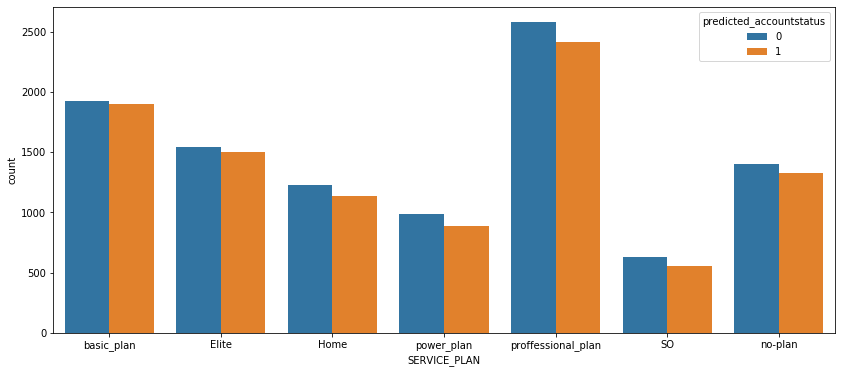

In [608]:
plot(telecom_combine,"SERVICE_PLAN","predicted_accountstatus")

# What are the key factors that predict customer churn? 

In [609]:
telecom_combine.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'FEEDBACK', 'SITE_TYPE_DESC', 'AGE',
       'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'cluster 3', 'predicted_accountstatus', 'pred_prob_1'],
      dtype='object')

In [610]:
fun1(telecom_combine,"cluster 3","ACCOUNT_STATUS")*1/12

count     ratio
cluster 3 ACCOUNT_STATUS                      
0         0               646.083333  5.569204
          1               320.666667  2.764130
1         0               186.083333  2.215805
          1               513.750000  6.117528

In [611]:
acc_5mon=fun1(telecom_combine,"cluster 3","ACCOUNT_STATUS")*5/12
acc_5mon

count      ratio
cluster 3 ACCOUNT_STATUS                        
0         0               3230.416667  27.846019
          1               1603.333333  13.820648
1         0                930.416667  11.079027
          1               2568.750000  30.587640

# If a group of customers have a 20% chance of churning this month, then we would expect them to remain customers for 5 months (1 month ÷ 20%).

# If the churn were reduced to 1%, then we would expect the customers to remain for 100 months. 

#actual customers are churn in 1 month 513.750000 customers i.e	6.11% in group1 and group0 churn are 320.666667	2.76% customers and churning customers in a group after 5 months in group1 customers are churned 30.58% and group 0 customer are churned 13.82% in actual status

we have to conclude that after predicted status churn customer status after 1 month and 5 months status

#predicted customers are churn in 1 month 338 customers i.e	4.02% in group1 and group0 churn are 471	4.06% customers and churning customers in a group after 5 months in group1 customers are 20.12% and group 0 customer are churned 20.32% in predicted status

we have to conclude that churning customers are in group1 percentage is decreased i.e 30.58 to 20.12 in 5 months and group 0 percentage is increase by 8% this is not good in future group 0 customers can leave more just work on these customers and provide trhe incentives and discounts of group 0 customers



In [612]:
fun1(telecom_combine,"cluster 3","predicted_accountstatus")*1/12

count     ratio
cluster 3 predicted_accountstatus                      
0         0                        495.166667  4.268310
          1                        471.583333  4.065023
1         0                        361.750000  4.307573
          1                        338.083333  4.025760

In [613]:
pred_5mon=fun1(telecom_combine,"cluster 3","predicted_accountstatus")*5/12
pred_5mon

count      ratio
cluster 3 predicted_accountstatus                        
0         0                        2475.833333  21.341551
          1                        2357.916667  20.325116
1         0                        1808.750000  21.537866
          1                        1690.416667  20.128801

In [733]:
#pred_5mon.to_csv(r"C:\machine learning\segmentation\pred_gpofcust.csv")

In [735]:
#act=acc_5mon.to_csv(r"C:\machine learning\segmentation\actua_groupstatus.csv")
#pred=pred_5mon.to_csv(r"C:\machine learning\segmentation\pred_groupstatus.csv")

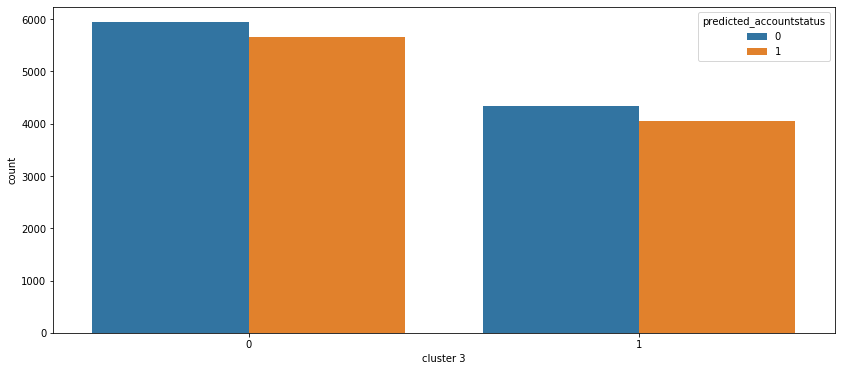

In [722]:
plot(telecom_combine,"cluster 3","predicted_accountstatus")

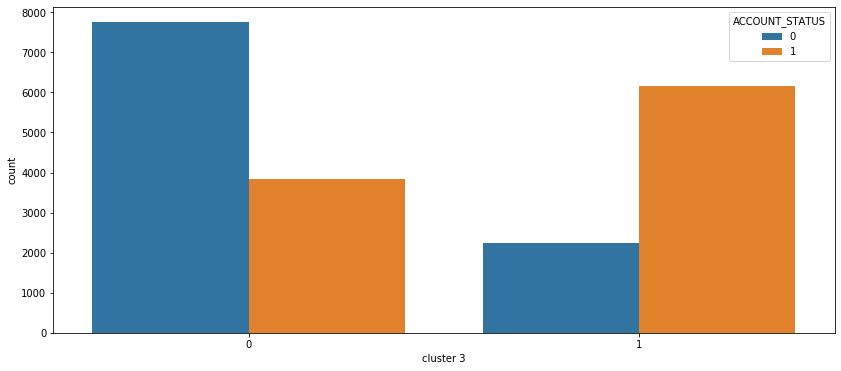

In [723]:
plot(telecom_combine,"cluster 3","ACCOUNT_STATUS")

In [724]:
telecom_combine.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'FEEDBACK', 'SITE_TYPE_DESC', 'AGE',
       'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'cluster 3', 'predicted_accountstatus', 'pred_prob_1'],
      dtype='object')

In [725]:
ser_pred=fun1(telecom_combine,"predicted_accountstatus","SERVICE_PLAN")
ser_pred

count      ratio
predicted_accountstatus SERVICE_PLAN                        
0                       basic_plan           1920  18.671594
                        Elite                1546  15.034523
                        Home                 1231  11.971215
                        power_plan            985   9.578917
                        proffessional_plan   2576  25.051055
                        SO                    627   6.097442
                        no-plan              1398  13.595254
1                       basic_plan           1900  19.555373
                        Elite                1505  15.489914
                        Home                 1134  11.671470
                        power_plan            887   9.129271
                        proffessional_plan   2410  24.804446
                        SO                    557   5.732812
                        no-plan              1323  13.616715

In [726]:
ser_pred=fun1(telecom_combine,"ACCOUNT_STATUS","SERVICE_PLAN")
ser_pred

count      ratio
ACCOUNT_STATUS SERVICE_PLAN                        
0              basic_plan           2525  25.285400
               Elite                1254  12.557581
               Home                 1240  12.417384
               power_plan           1248  12.497496
               proffessional_plan   2481  24.844783
               SO                      0   0.000000
               no-plan              1238  12.397356
1              basic_plan           1295  12.933187
               Elite                1797  17.946669
               Home                 1125  11.235394
               power_plan            624   6.231899
               proffessional_plan   2505  25.017477
               SO                   1184  11.824628
               no-plan              1483  14.810746

In [727]:

#act=ser_pred.to_csv(r"C:\machine learning\segmentation\pred.csv")

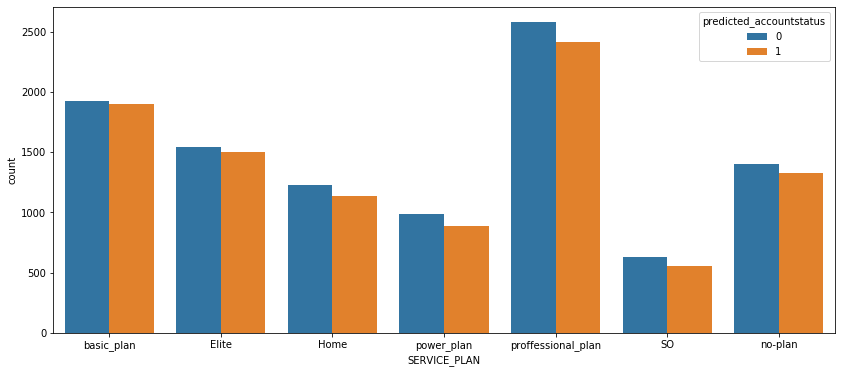

In [728]:
plot(telecom_combine,"SERVICE_PLAN","predicted_accountstatus")

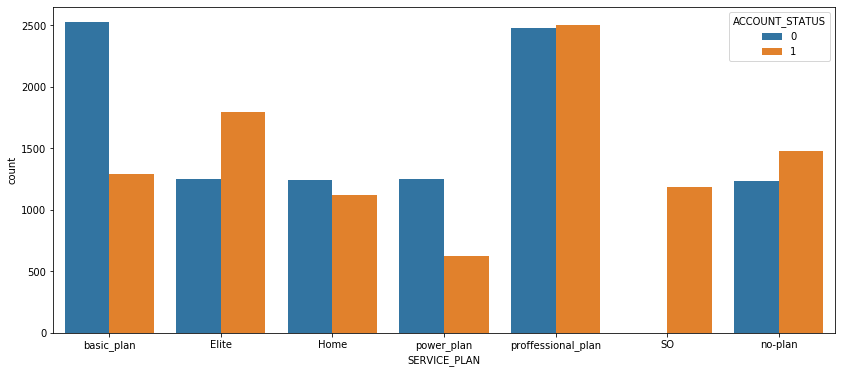

In [729]:
plot(telecom_combine,"SERVICE_PLAN","ACCOUNT_STATUS")

# as we before we saw
in future we have work on power, home and basic plan customer have more to churn then we have to work on it 

In [730]:
telecom_combine.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'FEEDBACK', 'SITE_TYPE_DESC', 'AGE',
       'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'cluster 3', 'predicted_accountstatus', 'pred_prob_1'],
      dtype='object')

# customers has more churn where probability  more than 45 %
 working on less than 45 percent probability
    actual and predicteed customers more to stay

In [731]:
telecom_combine[["pred_prob_1"]]

,pred_prob_1
0,0.406964
1,0.056115
2,0.717895
3,0.938078
4,0.796977
...,...
19994,0.162061
19995,0.639176
19996,0.062626
19997,0.113486


In [732]:
active_customerspred=telecom_combine[telecom_combine["predicted_accountstatus"]==0]

In [ ]:
active_customerspred

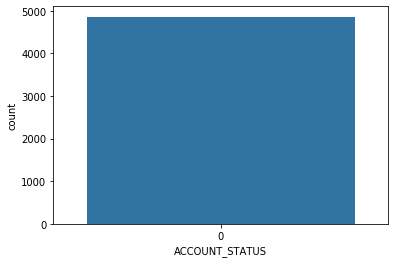

In [719]:
#sns.countplot(act_less45pr["predicted_accountstatus"],color="r")
sns.countplot(act_less45["ACCOUNT_STATUS"])

In [626]:
active_customersact=telecom_combine[telecom_combine["ACCOUNT_STATUS"]==0]

In [627]:
print(" active predicted customers ",active_customerspred.shape)
print("actual active  customers ",active_customersact.shape)

 active predicted customers  (10283, 15)
actual active  customers  (9986, 15)


In [628]:
act_less45pr=active_customerspred[active_customerspred["pred_prob_1"]<=0.45]#provide those customers who get fraud less than 45%
print("probability of fraud less than 45% predicted customers : ",len(act_less45pr))
print("percentage of predicted fraud probability less than 45 %",len(act_less45pr)/len(active_customerspred)*100)

probability of fraud less than 45% predicted customers :  9830
percentage of predicted fraud probability less than 45 % 95.59467081590975


In [713]:
#act_less45pr.to_csv(r"C:\machine learning\segmentation\pred_probcustomers_stayed.csv")

In [629]:
act_less45=active_customersact[active_customersact["pred_prob_1"]<=0.45]#provide those customers who get fraud less than 45%
print("probability of fraud less than 45% actual customers : ",len(act_less45))
print("percentage of actual fraud probability less than 45 %",len(act_less45)/len(active_customersact)*100)

probability of fraud less than 45% actual customers :  4860
percentage of actual fraud probability less than 45 % 48.66813538954536


In [714]:
#act_less45.to_csv(r"C:\machine learning\segmentation\actual_probcustomers_stayed.csv")

In [630]:

actual_per=len(act_less45)/len(active_customersact)*100#actual 
actual_per=len(act_less45)/len(active_customersact)*100#actual 

In [631]:
#act_less45pr#work on this customers can less fraud i.e 95% accurate 

# customers probabilty less than 45% shows a good customer

actual customers are 48 % and predicted customers are 95%

In [632]:
telecom_combine.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'FEEDBACK', 'SITE_TYPE_DESC', 'AGE',
       'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'cluster 3', 'predicted_accountstatus', 'pred_prob_1'],
      dtype='object')

In [693]:
mod=fun1(telecom_combine,"predicted_accountstatus","MODEL")
mod1=fun1(telecom_combine,"ACCOUNT_STATUS","MODEL")


In [694]:
#mod.to_csv(r"C:\machine learning\segmentation\pred_model.csv")
#mod1.to_csv(r"C:\machine learning\segmentation\act_model.csv")

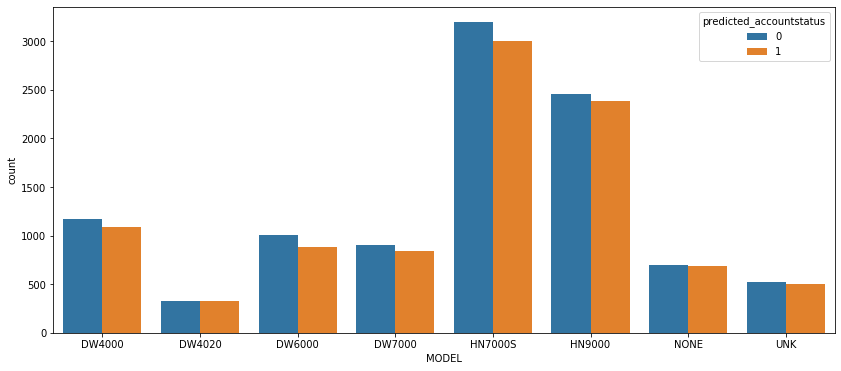

In [634]:
plot(telecom_combine,"MODEL","predicted_accountstatus")

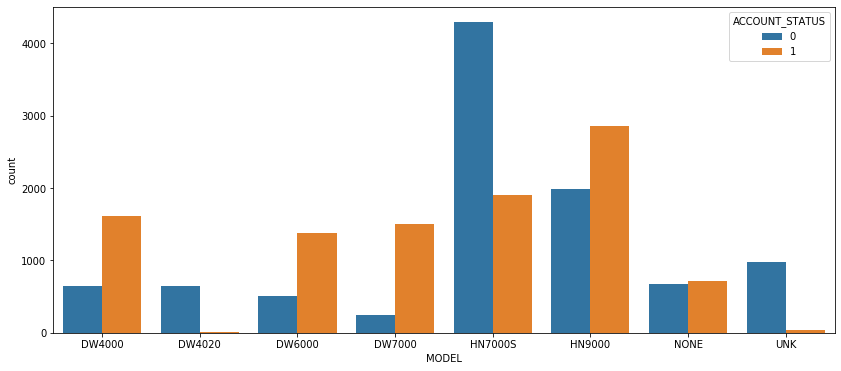

In [635]:
plot(telecom_combine,"MODEL","ACCOUNT_STATUS")

# model wise analysis actual and predicted customer status
1. dw4000 model actual more customer has to churn while predicted the model in future whwere customer has less to churn it and increase the active client more 
2. dw4020 has perform not the accurate result whwn telecom co. has work on it because in actual churning customers has less result in future the customers has more to churn
3. dw 6000,hns7000s,hns9000,unk has also more customer to predict churn more in future
   we have to work on this because customers are more likely to churn in future using rhrese models
4. dw 7000 has less to churn in future 

In [636]:
telecom_combine.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'FEEDBACK', 'SITE_TYPE_DESC', 'AGE',
       'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'cluster 3', 'predicted_accountstatus', 'pred_prob_1'],
      dtype='object')

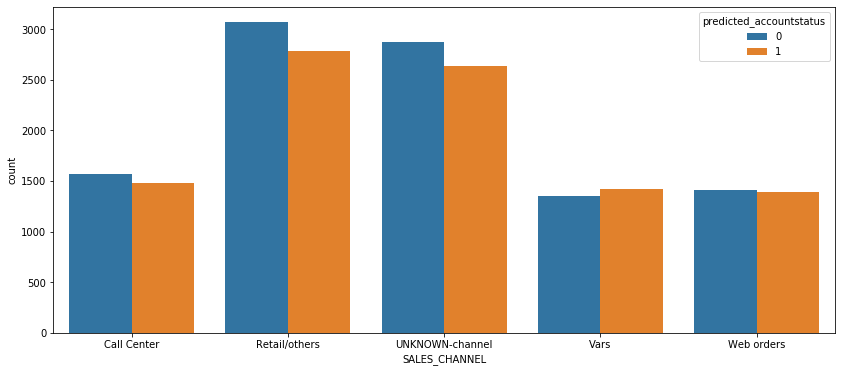

In [637]:
plot(telecom_combine,"SALES_CHANNEL","predicted_accountstatus")

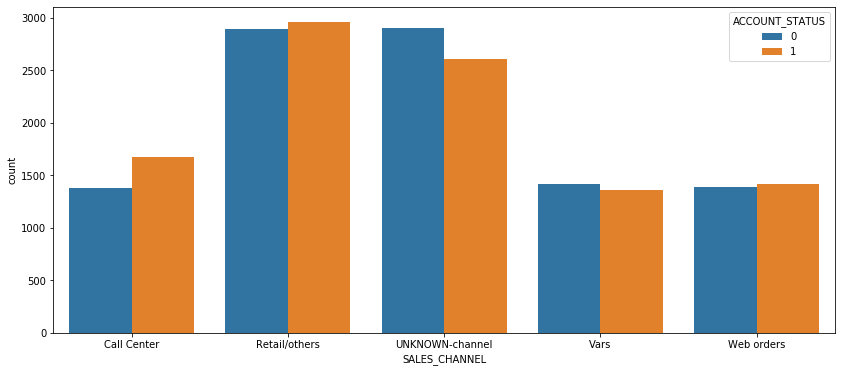

In [638]:
plot(telecom_combine,"SALES_CHANNEL","ACCOUNT_STATUS")

# as we saw the sales channel while actual and predicted customers 
trelecom co. work on unknown sales channel in future customer will more likely to churn

In [639]:
telecom_combine.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'FEEDBACK', 'SITE_TYPE_DESC', 'AGE',
       'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'cluster 3', 'predicted_accountstatus', 'pred_prob_1'],
      dtype='object')

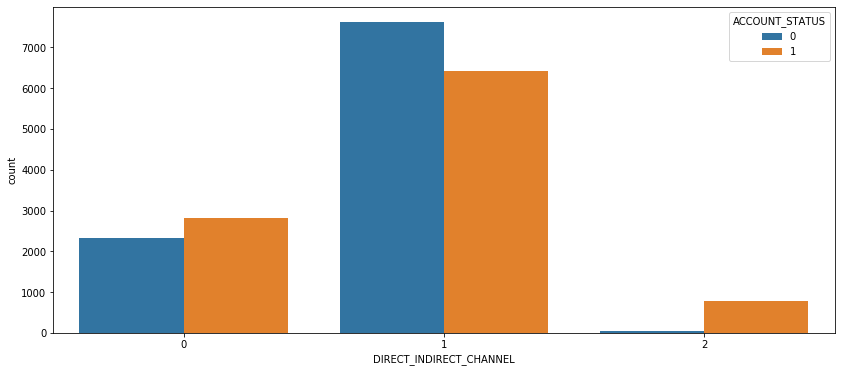

In [640]:
plot(telecom_combine,"DIRECT_INDIRECT_CHANNEL","ACCOUNT_STATUS")

In [641]:
final_telecom=telecom_combine

In [642]:
telecom_combine

,ACCOUNT_STATUS,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,FEEDBACK,SITE_TYPE_DESC,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,cluster 3,predicted_accountstatus,pred_prob_1
0,0,no-plan,HN9000,Vars,1,2,Broadband Remote,69,0,1,0,0,0,0,0.406964
1,0,proffessional_plan,HN7000S,Retail/others,1,1,Spaceway,43,4,1,0,0,1,0,0.056115
2,0,power_plan,HN9000,Call Center,1,0,Broadband Remote,58,4,1,0,0,0,1,0.717895
3,0,power_plan,DW6000,Retail/others,0,2,Spaceway,22,6,1,1,1,1,1,0.938078
4,0,Home,HN7000S,Call Center,1,1,Broadband Remote,36,7,0,0,1,0,1,0.796977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,1,basic_plan,HN9000,Call Center,1,1,Spaceway,49,3,3,1,0,1,0,0.162061
19995,1,proffessional_plan,DW6000,Retail/others,0,0,Spaceway,38,2,1,1,2,1,1,0.639176
19996,1,Home,DW4000,Retail/others,1,0,Broadband Remote,67,8,0,0,1,0,0,0.062626
19997,1,power_plan,DW6000,UNKNOWN-channel,2,0,Broadband Remote,63,0,3,2,1,0,0,0.113486


In [ ]:
fd['default'] = fd['default'].map( {'yes':1, 'no':0} )

In [645]:
telecom_combine.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'FEEDBACK', 'SITE_TYPE_DESC', 'AGE',
       'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'cluster 3', 'predicted_accountstatus', 'pred_prob_1'],
      dtype='object')

In [646]:
telecom_combine["DIRECT_INDIRECT_CHANNEL"].value_counts().to_dict()

{1: 14037, 0: 5124, 2: 838}

In [647]:
telecom_combine["DIRECT_INDIRECT_CHANNEL"]=telecom_combine["DIRECT_INDIRECT_CHANNEL"].map({0:"indirect channel".title(),1:"direct channel".title(),2:"unknown channel".title()})

In [648]:
telecom_combine["DIRECT_INDIRECT_CHANNEL"].value_counts().to_dict()

{'Direct Channel': 14037, 'Indirect Channel': 5124, 'Unknown Channel': 838}

In [649]:
telecom_combine.select_dtypes("int64").columns

Index(['FEEDBACK', 'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')

In [650]:
telecom_combine["FEEDBACK"].value_counts().to_dict()

{0: 10135, 1: 7950, 2: 1914}

In [653]:
telecom_combine["FEEDBACK"]=telecom_combine["FEEDBACK"].map({0:"bad".title(),1:"good".title(),2:"no-feedback".title()})

In [655]:
telecom_combine["MARITAL_STATUS"].value_counts().to_dict()

{0: 7707, 1: 7351, 3: 3941, 2: 1000}

In [656]:
telecom_combine["MARITAL_STATUS"]=telecom_combine["MARITAL_STATUS"].map({0:"single".title(),1:"married".title(),2:"divorcee/widow".title(),3:"not identified".title()})

In [657]:
telecom_combine["MARITAL_STATUS"].value_counts().to_dict()

{'Single': 7707,
 'Married': 7351,
 'Not Identified': 3941,
 'Divorcee/Widow': 1000}

In [658]:

telecom_combine["PRESENCE_OF_CHILDREN"].value_counts().to_dict()

{0: 12063, 1: 5369, 2: 2567}

In [659]:
telecom_combine["PRESENCE_OF_CHILDREN"]=telecom_combine["PRESENCE_OF_CHILDREN"].map({0:"no children".title(),
                                                                                     1:"at least one children"
                                                                                     .title(),2:"not identified".title()})

In [660]:

telecom_combine["PRESENCE_OF_CHILDREN"].value_counts().to_dict()

{'No Children': 12063, 'At Least One Children': 5369, 'Not Identified': 2567}

In [661]:

telecom_combine["COMPUTER_OWNER"].value_counts().to_dict()

{0: 8644, 1: 6298, 2: 5057}

In [662]:
telecom_combine["COMPUTER_OWNER"]=telecom_combine["COMPUTER_OWNER"].map({0:"no ".title(),
                                                                                     1:"yes"
                                                                                     .title(),
                                                                         2:"not identified".title()})

In [663]:

telecom_combine["COMPUTER_OWNER"].value_counts().to_dict()

{'No ': 8644, 'Yes': 6298, 'Not Identified': 5057}

In [664]:
telecom_combine.head(2)

,ACCOUNT_STATUS,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,FEEDBACK,SITE_TYPE_DESC,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,cluster 3,predicted_accountstatus,pred_prob_1
0,0,no-plan,HN9000,Vars,Direct Channel,No-Feedback,Broadband Remote,69,0,Married,No Children,No,0,0,0.406964
1,0,proffessional_plan,HN7000S,Retail/others,Direct Channel,Good,Spaceway,43,4,Married,No Children,No,1,0,0.056115


In [665]:
telecom_combine.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'FEEDBACK', 'SITE_TYPE_DESC', 'AGE',
       'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'cluster 3', 'predicted_accountstatus', 'pred_prob_1'],
      dtype='object')

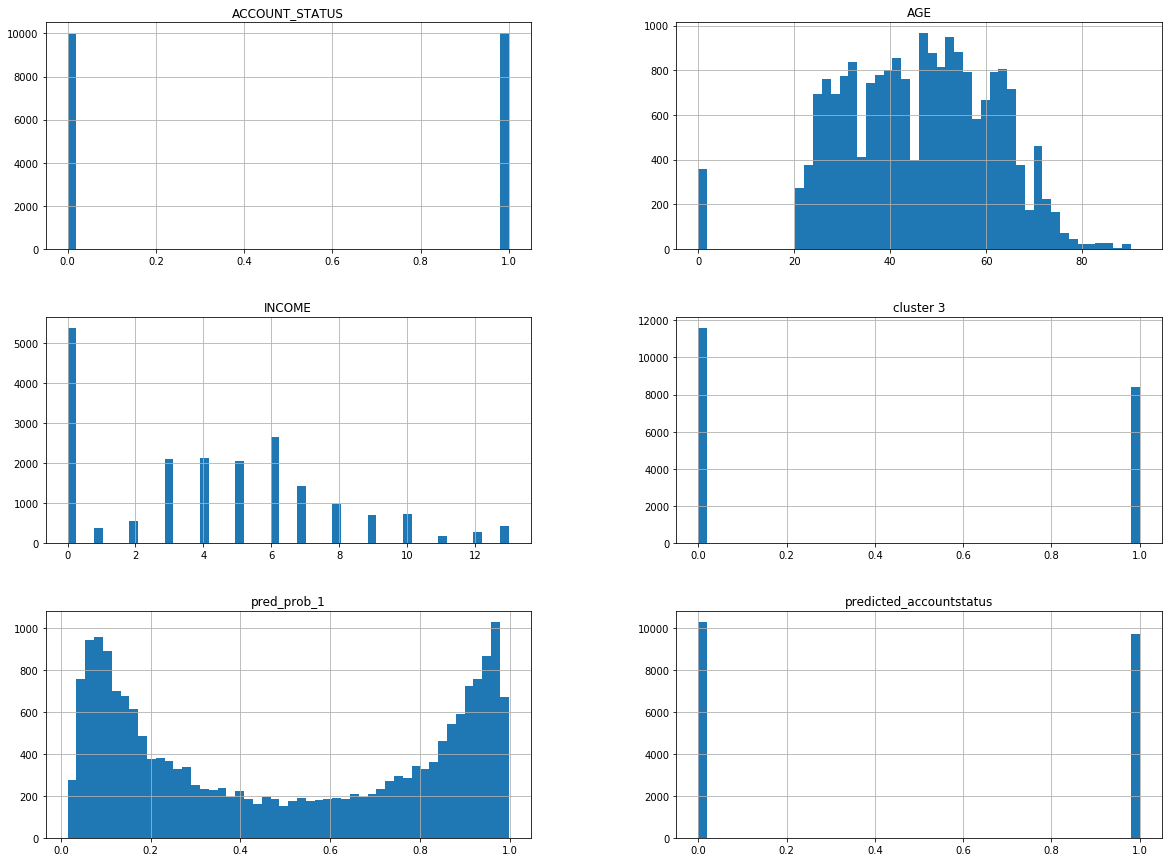

In [667]:
# tells Jupyter to set up Matplotlib so it uses Jupyter’s own backend.
# Plots are then rendered within the notebook itself

%matplotlib inline
import matplotlib.pyplot as plt

telecom_combine.hist(bins=50, figsize=(20,15)  )
plt.show()

In [703]:
telecom_combine.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'FEEDBACK', 'SITE_TYPE_DESC', 'AGE',
       'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'cluster 3', 'predicted_accountstatus', 'pred_prob_1'],
      dtype='object')

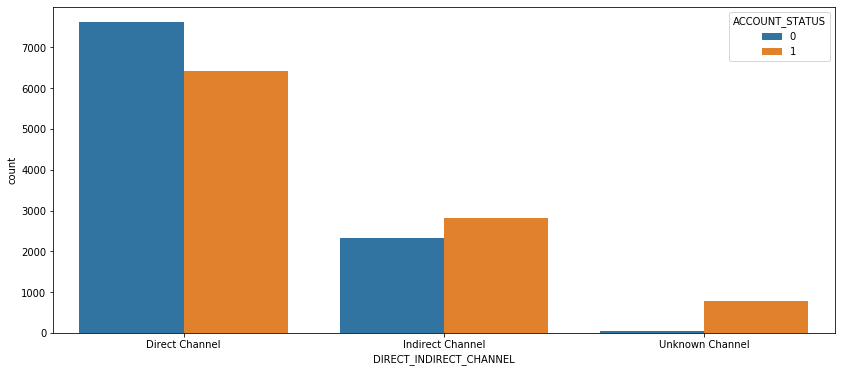

In [669]:
plot(telecom_combine,"DIRECT_INDIRECT_CHANNEL","ACCOUNT_STATUS")

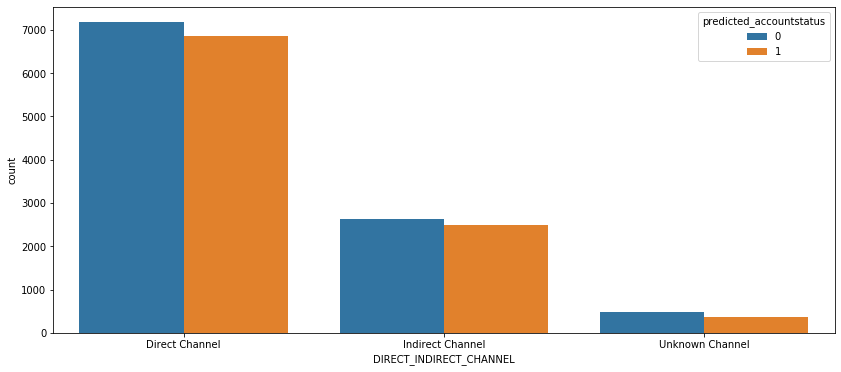

In [670]:
plot(telecom_combine,"DIRECT_INDIRECT_CHANNEL","predicted_accountstatus")

# we see the this countplot airect channel customers has more to churn in the future as compared to other channels



In [672]:
channel=fun1(telecom_combine,"predicted_accountstatus","DIRECT_INDIRECT_CHANNEL")
channel1=fun1(telecom_combine,"ACCOUNT_STATUS","DIRECT_INDIRECT_CHANNEL")


In [674]:
#channel.to_csv(r"C:\machine learning\segmentation\direct_pred.csv")
#channel1.to_csv(r"C:\machine learning\segmentation\direct_actual.csv")

In [675]:
telecom_combine.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'FEEDBACK', 'SITE_TYPE_DESC', 'AGE',
       'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'cluster 3', 'predicted_accountstatus', 'pred_prob_1'],
      dtype='object')

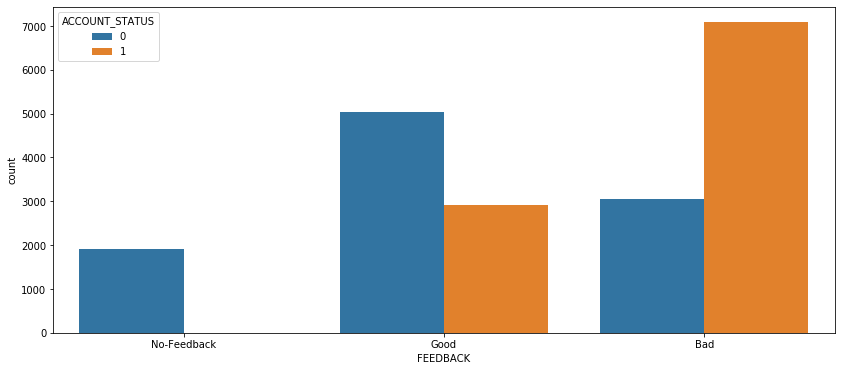

In [677]:
plot(telecom_combine,"FEEDBACK","ACCOUNT_STATUS")

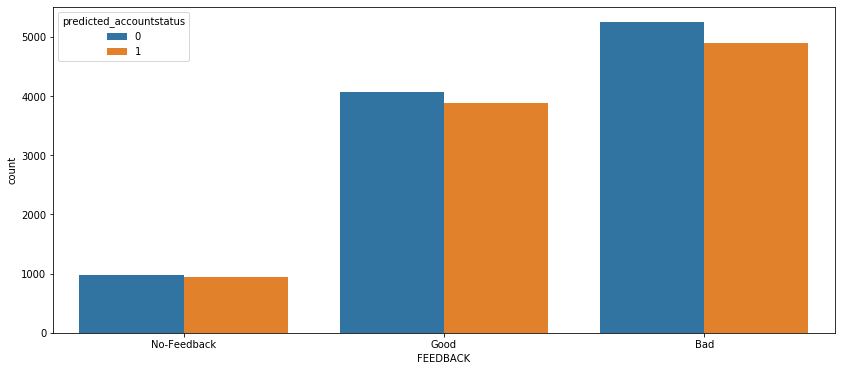

In [676]:
plot(telecom_combine,"FEEDBACK","predicted_accountstatus")

# we have to see feedback customers in future we predict good feedback customers has more to churn we have to work on it
in future bad feedback customers has less to churn

In [678]:
telecom_combine.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'FEEDBACK', 'SITE_TYPE_DESC', 'AGE',
       'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'cluster 3', 'predicted_accountstatus', 'pred_prob_1'],
      dtype='object')

In [679]:
channel=fun1(telecom_combine,"predicted_accountstatus","FEEDBACK")
channel1=fun1(telecom_combine,"ACCOUNT_STATUS","FEEDBACK")
#channel.to_csv(r"C:\machine learning\segmentation\feed_pred.csv")
#channel1.to_csv(r"C:\machine learning\segmentation\feed_actual.csv")

In [680]:
channel=fun1(telecom_combine,"predicted_accountstatus","SITE_TYPE_DESC")
channel1=fun1(telecom_combine,"ACCOUNT_STATUS","SITE_TYPE_DESC")
#channel.to_csv(r"C:\machine learning\segmentation\site_pred.csv")
#channel1.to_csv(r"C:\machine learning\segmentation\site_actual.csv")

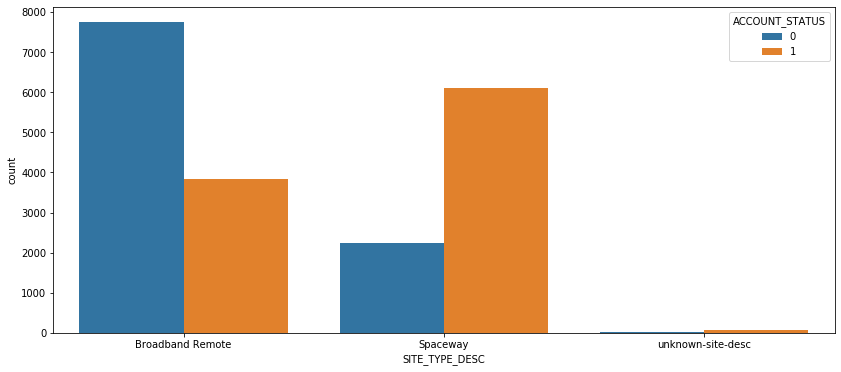

In [682]:
plot(telecom_combine,"SITE_TYPE_DESC","ACCOUNT_STATUS")

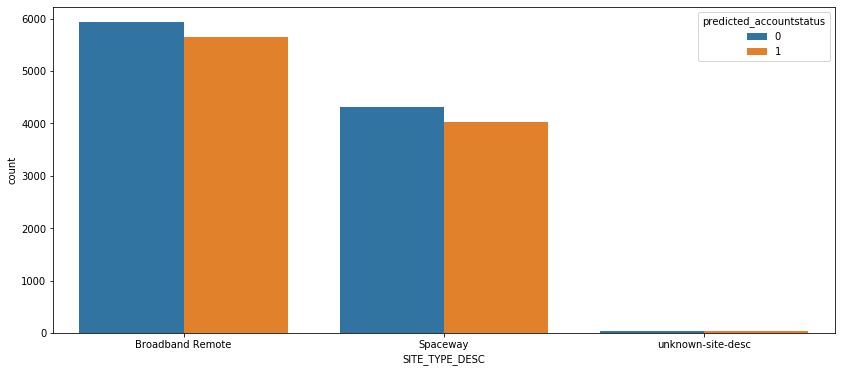

In [681]:
plot(telecom_combine,"SITE_TYPE_DESC","predicted_accountstatus")

In [ ]:
#site desc variable are churn in future

In [683]:
telecom_combine.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'FEEDBACK', 'SITE_TYPE_DESC', 'AGE',
       'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'cluster 3', 'predicted_accountstatus', 'pred_prob_1'],
      dtype='object')

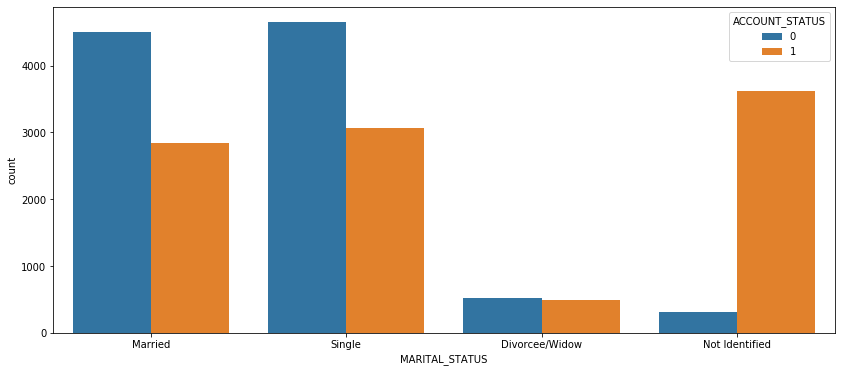

In [685]:
plot(telecom_combine,"MARITAL_STATUS","ACCOUNT_STATUS")

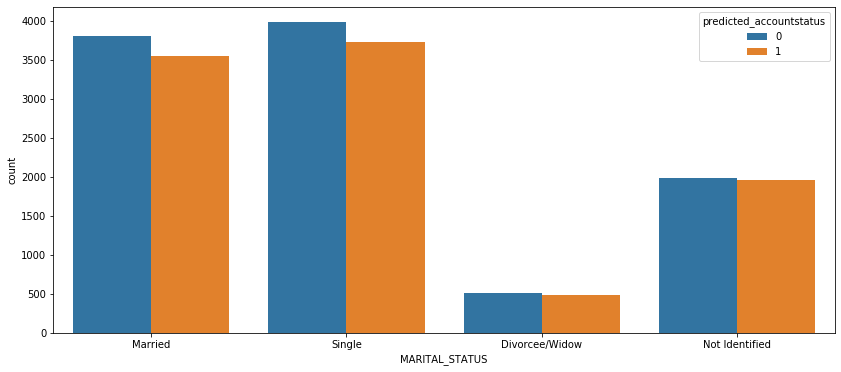

In [686]:
plot(telecom_combine,"MARITAL_STATUS","predicted_accountstatus")

In [684]:
channel=fun1(telecom_combine,"predicted_accountstatus","MARITAL_STATUS")
channel1=fun1(telecom_combine,"ACCOUNT_STATUS","MARITAL_STATUS")
#channel.to_csv(r"C:\machine learning\segmentation\mar_pred.csv")
#channel1.to_csv(r"C:\machine learning\segmentation\mar_actual.csv")

# married status in our company churning factor because married and single  customers churn in future
we have to work on this marital status

In [687]:
telecom_combine.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'FEEDBACK', 'SITE_TYPE_DESC', 'AGE',
       'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'cluster 3', 'predicted_accountstatus', 'pred_prob_1'],
      dtype='object')

# conclusion report
# churning factors

warranty name, company source name,direct channel ,good feedback,gender both,site type desc,

martial staus single and married both are churning the variables most in the telecom industry

In [688]:
combine_df.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'COMPANY_SOURCE_NAME', 'FEEDBACK',
       'SITE_TYPE_DESC', 'WARRANTY_NAME', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER', 'cluster 3',
       'predicted_accountstatus', 'pred_prob_1'],
      dtype='object')

In [689]:
#we have to work on this data
telecom_combine.head(2)

,ACCOUNT_STATUS,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,FEEDBACK,SITE_TYPE_DESC,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,cluster 3,predicted_accountstatus,pred_prob_1
0,0,no-plan,HN9000,Vars,Direct Channel,No-Feedback,Broadband Remote,69,0,Married,No Children,No,0,0,0.406964
1,0,proffessional_plan,HN7000S,Retail/others,Direct Channel,Good,Spaceway,43,4,Married,No Children,No,1,0,0.056115


In [690]:
telecom_combine.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'FEEDBACK', 'SITE_TYPE_DESC', 'AGE',
       'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'cluster 3', 'predicted_accountstatus', 'pred_prob_1'],
      dtype='object')

In [696]:
sal=fun1(telecom_combine,"ACCOUNT_STATUS","SALES_CHANNEL")
sal1=fun1(telecom_combine,"predicted_accountstatus","SALES_CHANNEL")


In [697]:
#sal.to_csv(r"C:\machine learning\segmentation\act_sales.csv")
#sal1.to_csv(r"C:\machine learning\segmentation\pre_sales.csv")

In [698]:
sal=fun1(telecom_combine,"ACCOUNT_STATUS","PRESENCE_OF_CHILDREN")
sal1=fun1(telecom_combine,"predicted_accountstatus","PRESENCE_OF_CHILDREN")

In [699]:
#sal.to_csv(r"C:\machine learning\segmentation\act_child.csv")
#sal1.to_csv(r"C:\machine learning\segmentation\pre_child.csv")

In [700]:
sal=fun1(telecom_combine,"ACCOUNT_STATUS","COMPUTER_OWNER")
sal1=fun1(telecom_combine,"predicted_accountstatus","COMPUTER_OWNER")

In [701]:
#sal.to_csv(r"C:\machine learning\segmentation\act_com.csv")
#sal1.to_csv(r"C:\machine learning\segmentation\pre_com.csv")

In [785]:
telecom_combine.columns

Index(['ACCOUNT_STATUS', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'FEEDBACK', 'SITE_TYPE_DESC', 'AGE',
       'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'cluster 3', 'predicted_accountstatus', 'pred_prob_1'],
      dtype='object')

In [784]:
#telecom_combine.to_csv(r"C:\machine learning\telecom segmentation\new_finaltelecom.csv")